All of this is just setup

In [1]:
import os, sys, ast
import numpy as np
import pandas as pd
import json
# %matplotlib inline
# %matplotlib notebook
import matplotlib
%matplotlib inline

print(matplotlib.get_backend())

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm  # Use tqdm.notebook for Jupyter notebooks
from sklearn.manifold import TSNE
from multiprocessing import JoinableQueue, Process, Manager, Value

currentdir = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(currentdir)
print(currentdir)
from leafmachine2.ect_methods.utils_ect import preprocessing, parse_availability, torch_distance_matrix, plot_confidence_ellipse, plot_confidence_ellipse_mean, store_ect_data
from leafmachine2.ect_methods.utils_PHATE import load_direct
from leafmachine2.ect_methods.utils_metrics import compute_ect_means, compute_ect_summary_metrics, metric_evaluation
from leafmachine2.ect_methods.leaf_ect import LeafECT
from leafmachine2.ect_methods.experiment_parameter_sweep import run_experiment_parameter_sweep

# ### 2000 images from Cornales
# file_path = "D:/D_Desktop/LM2_parallel_test_2000_Cornales/LM2_MEASUREMENTS.csv"
# outline_path = "D:/D_Desktop/LM2_parallel_test_2000_Cornales/Simple_Labels"

### 2500 images 50 spp
# file_path = "C:/Users/Will/Downloads/GBIF_DetailedSample_50Spp/LM2_2024_09_18__07-52-47/Data/Measurements/LM2_2024_09_18__07-52-47_MEASUREMENTS.csv"
# outline_path = "C:/Users/Will/Downloads/GBIF_DetailedSample_50Spp/LM2_2024_09_18__07-52-47/Keypoints/Simple_Labels"
# cleaned_df = pd.read_csv(file_path)

# file_path = '/media/nas/GBIF_Downloads/Cornales/Loasaceae/LM2/Data/Measurements/LM2_MEASUREMENTS_CLEAN.csv'
# outline_path = '/media/nas/GBIF_Downloads/Cornales/Loasaceae/LM2/Keypoints/Simple_Labels'
# cleaned_df = pd.read_csv(file_path)

### 2500 images 50 spp
file_path = "/media/nas/GBIF_Downloads/GBIF_DetailedSample_50Spp/LM2/Data/Measurements/LM2_MEASUREMENTS_CLEAN.csv"
outline_path = "/media/nas/GBIF_Downloads/GBIF_DetailedSample_50Spp/LM2/Keypoints/Simple_Labels"
cleaned_df = pd.read_csv(file_path)

module://matplotlib_inline.backend_inline
/home/brlab/Dropbox/LeafMachine2
/home/brlab/Dropbox/LeafMachine2


In [2]:
# cleaned_df = preprocessing(file_path, outline_path, show_CF_plot=True, show_first_raw_contour=True, show_df_head=False)

### Below was used to diagnose the positive ddr values, which was just a poor initial guess for an optimization function. 
It can also be used to visualize the ECT plots, like Dan's red figure

[[ 2.07803715e-02  5.21520495e-01]
 [ 1.55172134e-02  5.18362582e-01]
 [ 1.34119503e-02  5.13099432e-01]
 [ 2.88563455e-03  4.99415219e-01]
 [-2.72260077e-04  4.93099421e-01]
 [-2.72260077e-04  4.88888890e-01]
 [-3.43015487e-03  4.85731006e-01]
 [-1.60617344e-02  4.60467845e-01]
 [-1.92196276e-02  4.49941516e-01]
 [-2.55354177e-02  4.42573100e-01]
 [-3.81669961e-02  4.09941524e-01]
 [-4.76406813e-02  3.94152045e-01]
 [-4.86933142e-02  3.83625746e-01]
 [-5.71143664e-02  3.69941533e-01]
 [-5.71143664e-02  3.65731001e-01]
 [-6.44827858e-02  3.57309937e-01]
 [-7.71143660e-02  3.49941522e-01]
 [-8.13248903e-02  3.34152043e-01]
 [-8.86933133e-02  3.23625743e-01]
 [-9.39564705e-02  3.08888882e-01]
 [-1.16061732e-01  2.83625722e-01]
 [-1.20272256e-01  2.73099422e-01]
 [-1.27640679e-01  2.66783625e-01]
 [-1.36061728e-01  2.66783625e-01]
 [-1.43430158e-01  2.69941509e-01]
 [-1.62377521e-01  2.69941509e-01]
 [-1.70798570e-01  2.64678359e-01]
 [-1.72903836e-01  2.57309943e-01]
 [-1.72903836e-01  2

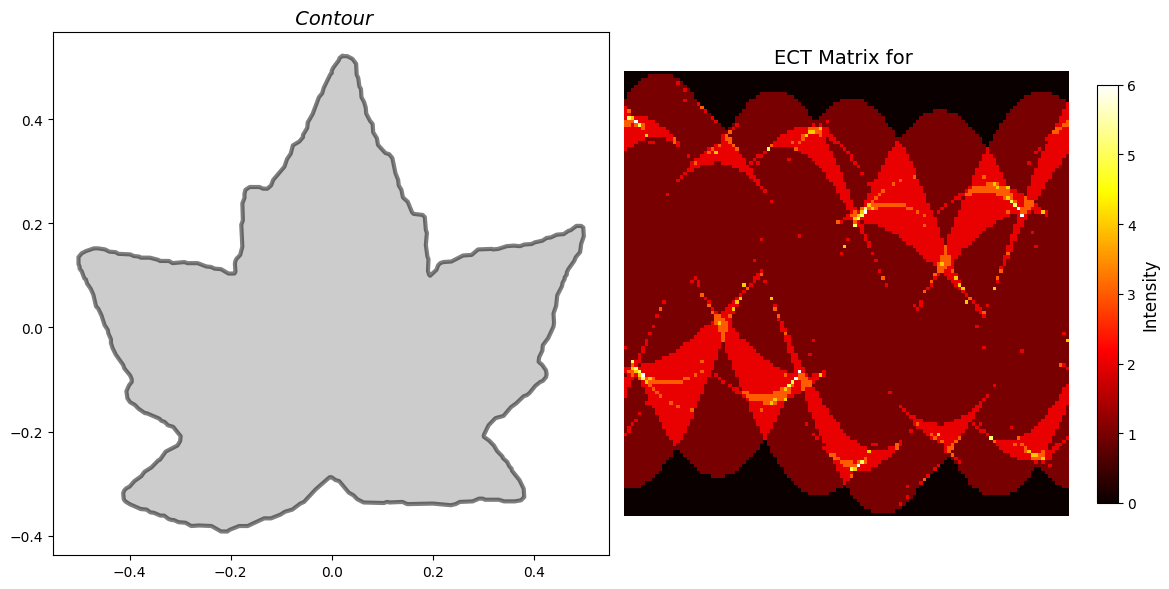

-1.5228634030044046
1.047607421875


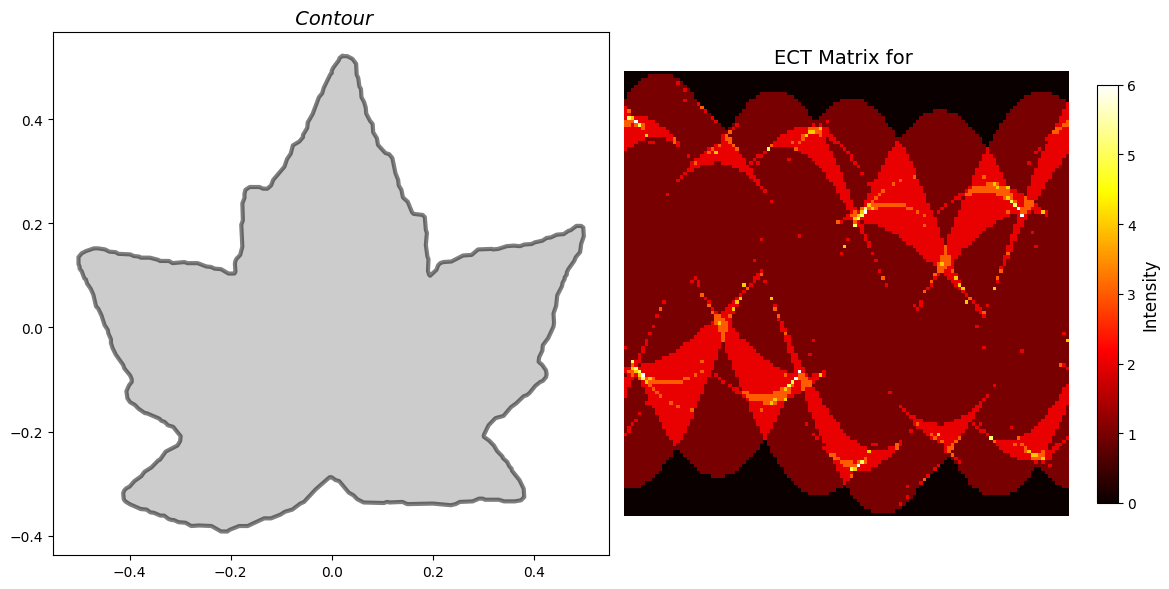

-1.5228634030044046
1.047607421875


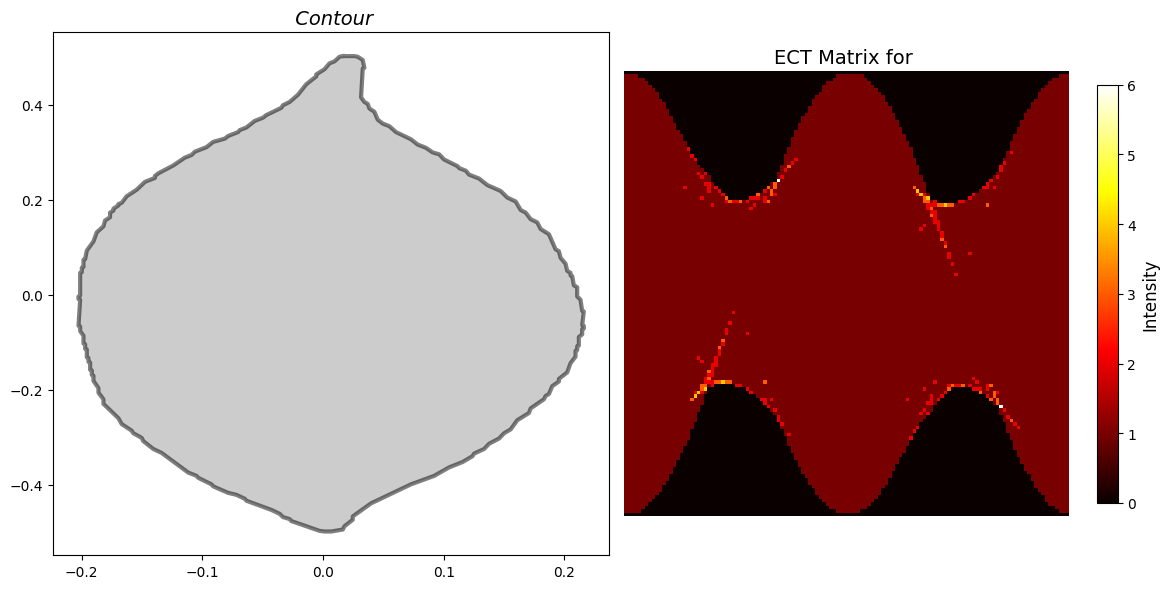

-4.3566560441495445
0.72021484375


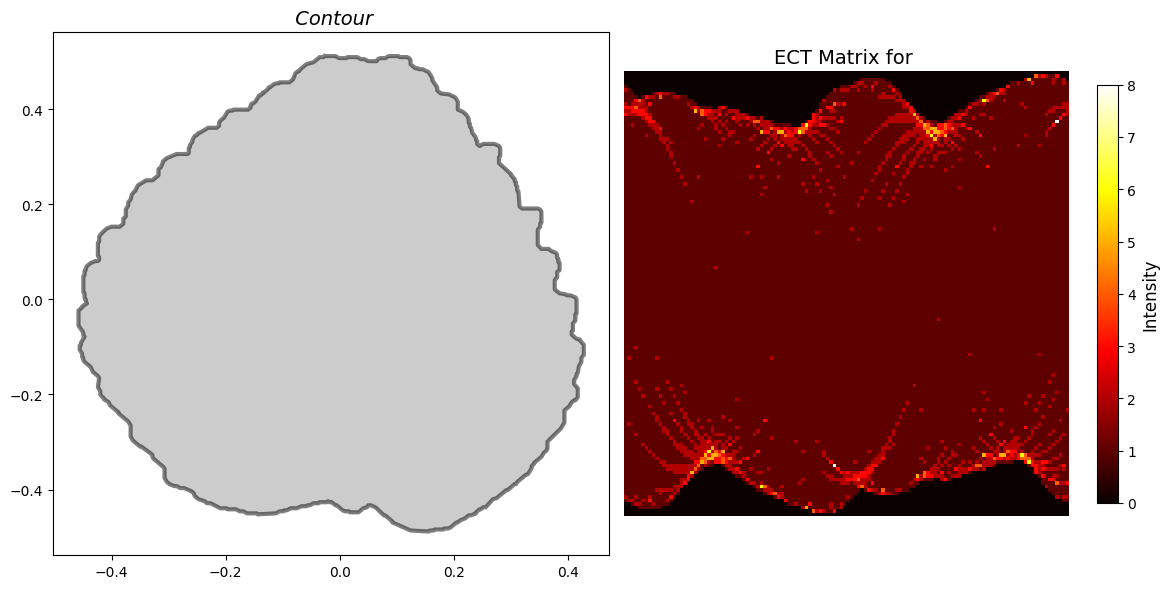

-2.6702664983926123
0.97265625


In [177]:
# Instantiate the class with the DataFrame and outline path
# leaf_ect = LeafECT(cleaned_df, outline_path, num_dirs=128, num_thresh=128, max_pts=500)

# Process just the contour at index 0
# result = leaf_ect.process_one_contour(0)

# Instantiate the class with the DataFrame and outline path
leaf_ect = LeafECT(cleaned_df, outline_path, num_dirs=128, num_thresh=128, max_pts=500)

# Process just the contour at index 0
ECT_matrix, simplified_contour = leaf_ect.compute_ect_for_contour('ANHC_3435785516_Altingiaceae_Liquidambar_styraciflua__L__58-860-1139-2069', is_DP='DP')
# ECT_matrix, simplified_contour = leaf_ect.compute_ect_for_contour('MNHN_437217320_Eupomatiaceae_Eupomatia_laurina__L__462-1396-1491-1739', is_DP='DP')
# ECT_matrix, simplified_contour = leaf_ect.compute_ect_for_contour('ASC_3091267050_Salicaceae_Populus_tremuloides__L__3361-1789-3980-2281', is_DP='DP')
# ECT_matrix, simplified_contour = leaf_ect.compute_ect_for_contour('L_2514977556_Loasaceae_Gronovia_longiflora__L__1271-718-1627-1120', is_DP='DP')


print(simplified_contour)
print(ECT_matrix)

# for file_name in os.listdir(outline_path):
#     # Check if the file ends with '.txt'
#     if file_name.endswith('.txt'):
#         ECT_matrix, simplified_contour = leaf_ect.compute_ect_for_contour('ANHC_3435785516_Altingiaceae_Liquidambar_styraciflua__L__58-860-1139-2069', is_DP='DP')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib
from scipy.optimize import curve_fit, OptimizeWarning
import warnings
import importlib
import utils_metrics
importlib.reload(utils_metrics)
from utils_metrics import calculate_ddr, exponential_decay
from utils_PHATE import load_from_hdf5

def plot_leaf_data(leaf_data=None, ect_matrix=None, title="Leaf"):
    plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

    if leaf_data is not None:
        # Plotting the leaf contour directly without PCA
        plt.subplot(1, 2, 1)  # Subplot 1 for the leaf contour
        plt.plot(leaf_data[:, 0], leaf_data[:, 1], lw=3, color="black", alpha=0.5)  # Assuming leaf_data[:, 0] is x and leaf_data[:, 1] is y
        plt.fill(leaf_data[:, 0], leaf_data[:, 1], lw=0, color="black", alpha=0.2)
        plt.title(f"{title} Contour", fontsize=14, fontstyle="italic")

    if ect_matrix is not None:
        # Subplot 2 for the ECT matrix
        plt.subplot(1, 2, 2)
        colormap = plt.cm.hot
        normalize = matplotlib.colors.Normalize(vmin=0, vmax=np.max(ect_matrix))

        img = plt.imshow(ect_matrix.T, cmap=colormap, norm=normalize)
        plt.title(f"ECT Matrix for {title}", fontsize=14)

        # Add a colorbar as the legend for intensity
        cbar = plt.colorbar(img, orientation='vertical', shrink=0.8, pad=0.05)
        cbar.set_label('Intensity', fontsize=12)

    plt.axis("off")  # Hide axes for clean visualization
    plt.gca().set_aspect("equal", adjustable='box')  # Ensure aspect ratio is equal to avoid distortion
    plt.tight_layout()
    plt.show()

plot_leaf_data(leaf_data=simplified_contour, ect_matrix=ECT_matrix, title='')

ddr_score = calculate_ddr(ECT_matrix)
print(ddr_score)
matrix_means = np.sum(ECT_matrix) / (128 * 128) 
print(matrix_means)


# ECT_matrix, simplified_contour = leaf_ect.compute_ect_for_contour('K_912238222_Eupomatiaceae_Eupomatia_laurina__L__417-1150-612-1896', is_DP='DP')
ECT_matrix, simplified_contour = leaf_ect.compute_ect_for_contour('ANHC_3435785516_Altingiaceae_Liquidambar_styraciflua__L__58-860-1139-2069', is_DP='DP')
plot_leaf_data(leaf_data=simplified_contour, ect_matrix=ECT_matrix, title='')
ddr_score = calculate_ddr(ECT_matrix)
print(ddr_score)
matrix_means = np.sum(ECT_matrix) / (128 * 128) 
print(matrix_means)



# ECT_matrix, simplified_contour = leaf_ect.compute_ect_for_contour('K_912238222_Eupomatiaceae_Eupomatia_laurina__L__452-2395-1162-2911', is_DP='DP')
# ECT_matrix, simplified_contour = leaf_ect.compute_ect_for_contour('BR_1839473006_Ericaceae_Vaccinium_oxycoccos__L__2461-2620-2561-2684', is_DP='DP')
ECT_matrix, simplified_contour = leaf_ect.compute_ect_for_contour('ANHC_3435788770_Rosaceae_Prunus_serotina__L__220-1826-887-2379', is_DP='DP')
plot_leaf_data(leaf_data=simplified_contour, ect_matrix=ECT_matrix, title='')
ddr_score = calculate_ddr(ECT_matrix)
print(ddr_score)
matrix_means = np.sum(ECT_matrix) / (128 * 128) 
print(matrix_means)



# ECT_matrix, simplified_contour = leaf_ect.compute_ect_for_contour('BR_1839645157_Ericaceae_Vaccinium_oxycoccos__L__3059-3311-3132-3385', is_DP='DP')
ECT_matrix, simplified_contour = leaf_ect.compute_ect_for_contour('NY_1928237093_Moraceae_Morus_alba__L__764-373-1194-1050', is_DP='DP')
plot_leaf_data(leaf_data=simplified_contour, ect_matrix=ECT_matrix, title='')
ddr_score = calculate_ddr(ECT_matrix)
print(ddr_score)
matrix_means = np.sum(ECT_matrix) / (128 * 128) 
print(matrix_means)



def plot_multiple_ddr(directory):
    """
    Process HDF5 files in a given directory, calculate DDR, and plot
    the observed decay function along with the fitted curve for up to 5 positive
    and 5 negative DDR scores.

    Parameters:
        directory (str): Path to the directory containing HDF5 files.
    """
    plt.figure(figsize=(12, 8))
    positive_ddr_count = 0  # Counter for positive DDR scores
    negative_ddr_count = 0  # Counter for negative DDR scores

    for filename in os.listdir(directory):
        if filename.endswith('.h5'):
            file_path = os.path.join(directory, filename)
            try:
                # Load data using the provided function
                ect_data, group_labels, shapes, component_names = load_from_hdf5(file_path)

                # Use the first ECT matrix for DDR calculation
                matrix = ect_data[0]
                unique_values = np.unique(matrix[matrix > 0])[::-1]  # Descending order
                densities = [np.sum(matrix == value) / matrix.size for value in unique_values]
                levels = np.arange(len(densities))

                # Fit exponential decay
                # p0 = (1, 0.1)  # Initial guess for curve fitting
                p0 = (max(densities), 0.01)

                maxfev = 5000  # Max function evaluations

                with warnings.catch_warnings():
                    warnings.simplefilter("ignore", OptimizeWarning)
                    try:
                        popt, _ = curve_fit(exponential_decay, levels, densities, p0=p0, maxfev=maxfev)
                        ddr_score = popt[1]  # Extract decay rate 'b'
                    except RuntimeError:
                        ddr_score = np.nan

                # Plot only if fitting succeeds
                if not np.isnan(ddr_score):
                    # Prepare fitted curve
                    fitted_curve = exponential_decay(levels, *popt)

                    if ddr_score > 0 and positive_ddr_count < 5:
                        # Plot positive DDR in red
                        plt.scatter(levels, densities, label=f"Observed (+) {filename}", color='red', alpha=0.6)
                        plt.plot(levels, fitted_curve, label=f"Fitted (b={ddr_score:.2f}, +)", color='red', linestyle='--', alpha=0.8)
                        positive_ddr_count += 1
                    elif ddr_score < 0 and negative_ddr_count < 5:
                        # Plot negative DDR in green
                        plt.scatter(levels, densities, label=f"Observed (-) {filename}", color='green', alpha=0.6)
                        plt.plot(levels, fitted_curve, label=f"Fitted (b={ddr_score:.2f}, -)", color='green', linestyle='--', alpha=0.8)
                        negative_ddr_count += 1

                # Stop after 5 positive and 5 negative DDR scores
                if positive_ddr_count >= 5 and negative_ddr_count >= 5:
                    break

            except Exception as e:
                print(f"Error processing {filename}: {e}")

    # Finalize the plot
    if positive_ddr_count > 0 or negative_ddr_count > 0:
        plt.xlabel("Levels (Intensity)")
        plt.ylabel("Density (Normalized)")
        plt.title("Exponential Decay Fit: Observed vs Fitted Densities")
        plt.legend(loc="best", fontsize="small")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("No valid matrices with DDR scores to plot.")


# directory_path= 'C:/Users/Will/Downloads/GBIF_DetailedSample_50Spp/LM2_2024_09_18__07-52-47/Data/Measurements/ECT'
directory_path= '/media/nas/GBIF_Downloads/GBIF_DetailedSample_50Spp/LM2/Data/Measurements/ECT'
# test_ddr(directory_path)
# plot_multiple_ddr(directory_path)



OVATE

ANHC_3435788770_Rosaceae_Prunus_serotina__L__220-1826-887-2379

Rosaceae Prunus serotina


/home/brlab/Dropbox/LeafMachine2/venv_LM2_38/lib/python3.10/site-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)
/home/brlab/Dropbox/LeafMachine2/leafmachine2/ect_methods/utils_metrics.py:1194: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


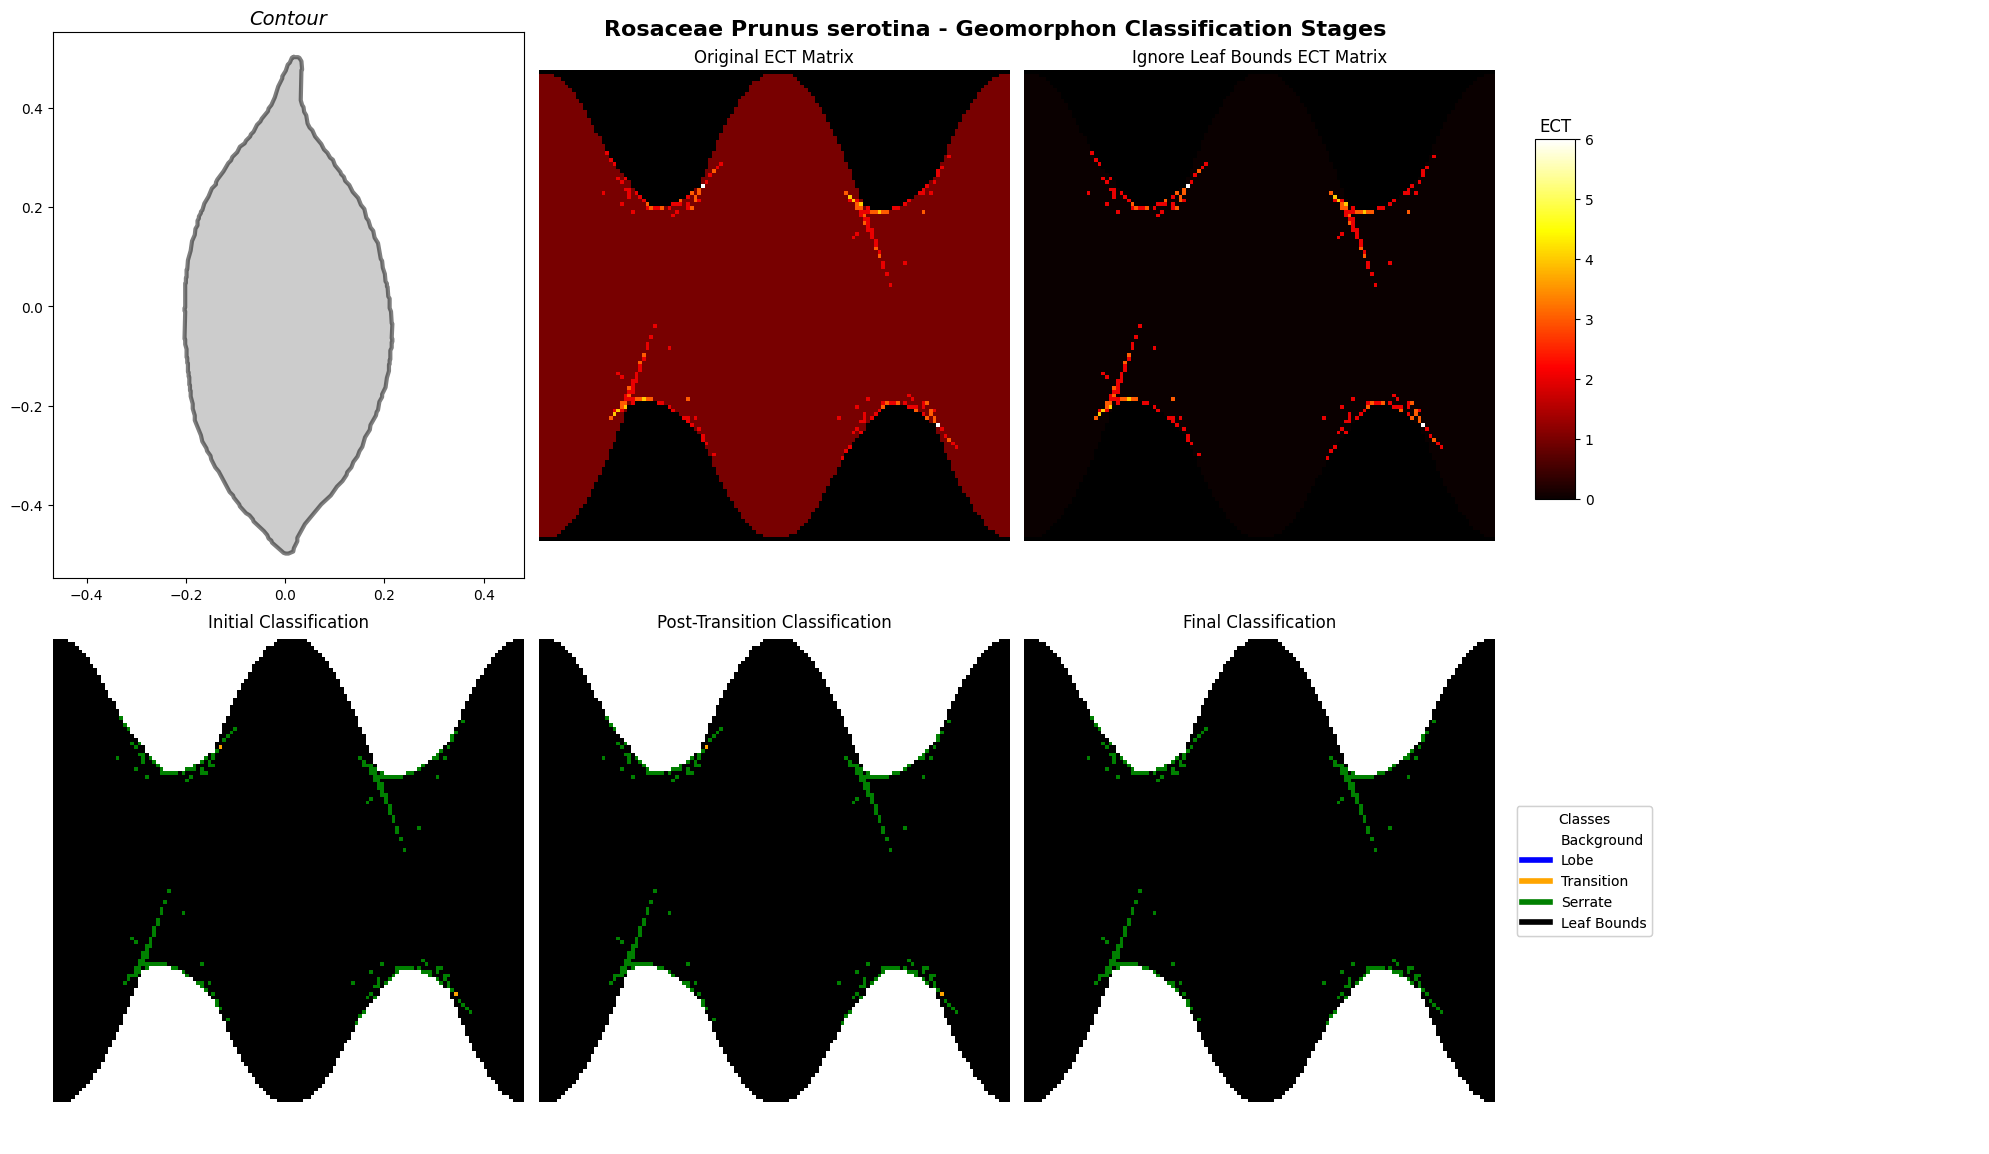

{'background': 16182, 'lobe': 0, 'transition': 0, 'teeth': 202, 'n_cells': 16384, 'n_cells_leaf': 11526, 'n_cells_bg': 4858, 'fraction_teeth': 0.017525594308519868, 'fraction_lobe': 0.0, 'fraction_flat': 0.9824744056914801, 'thresholded_matrix': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'initial_classes': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'post_transition_classes': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'final_classes': array([[0, 0, 0, ..., 0, 0, 0],
     

/home/brlab/Dropbox/LeafMachine2/venv_LM2_38/lib/python3.10/site-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)
/home/brlab/Dropbox/LeafMachine2/leafmachine2/ect_methods/utils_metrics.py:1194: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


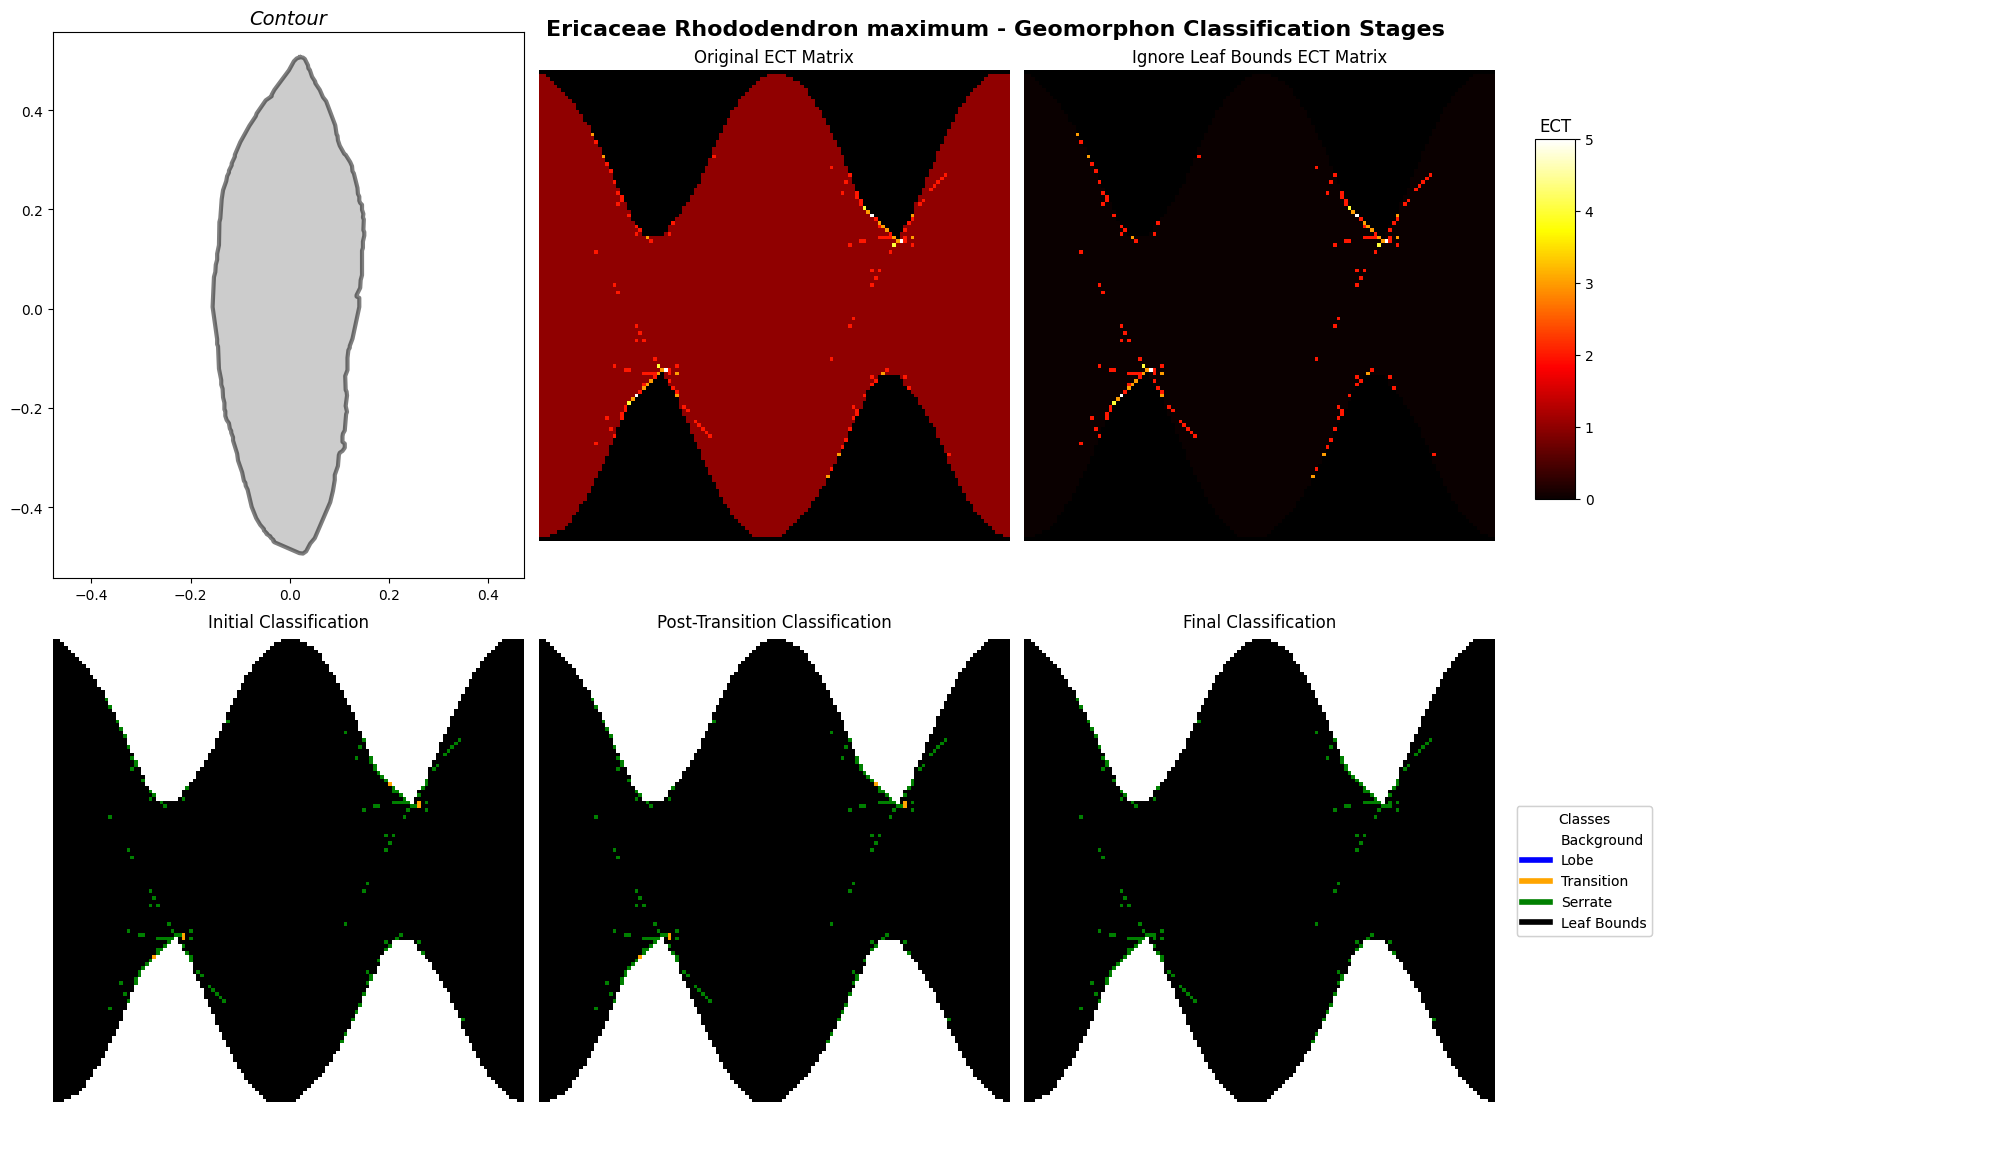

{'background': 16244, 'lobe': 0, 'transition': 0, 'teeth': 140, 'n_cells': 16384, 'n_cells_leaf': 11120, 'n_cells_bg': 5264, 'fraction_teeth': 0.012589928057553957, 'fraction_lobe': 0.0, 'fraction_flat': 0.987410071942446, 'thresholded_matrix': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'initial_classes': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'post_transition_classes': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'final_classes': array([[0, 0, 0, ..., 0, 0, 0],
      

/home/brlab/Dropbox/LeafMachine2/venv_LM2_38/lib/python3.10/site-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)
/home/brlab/Dropbox/LeafMachine2/leafmachine2/ect_methods/utils_metrics.py:1194: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


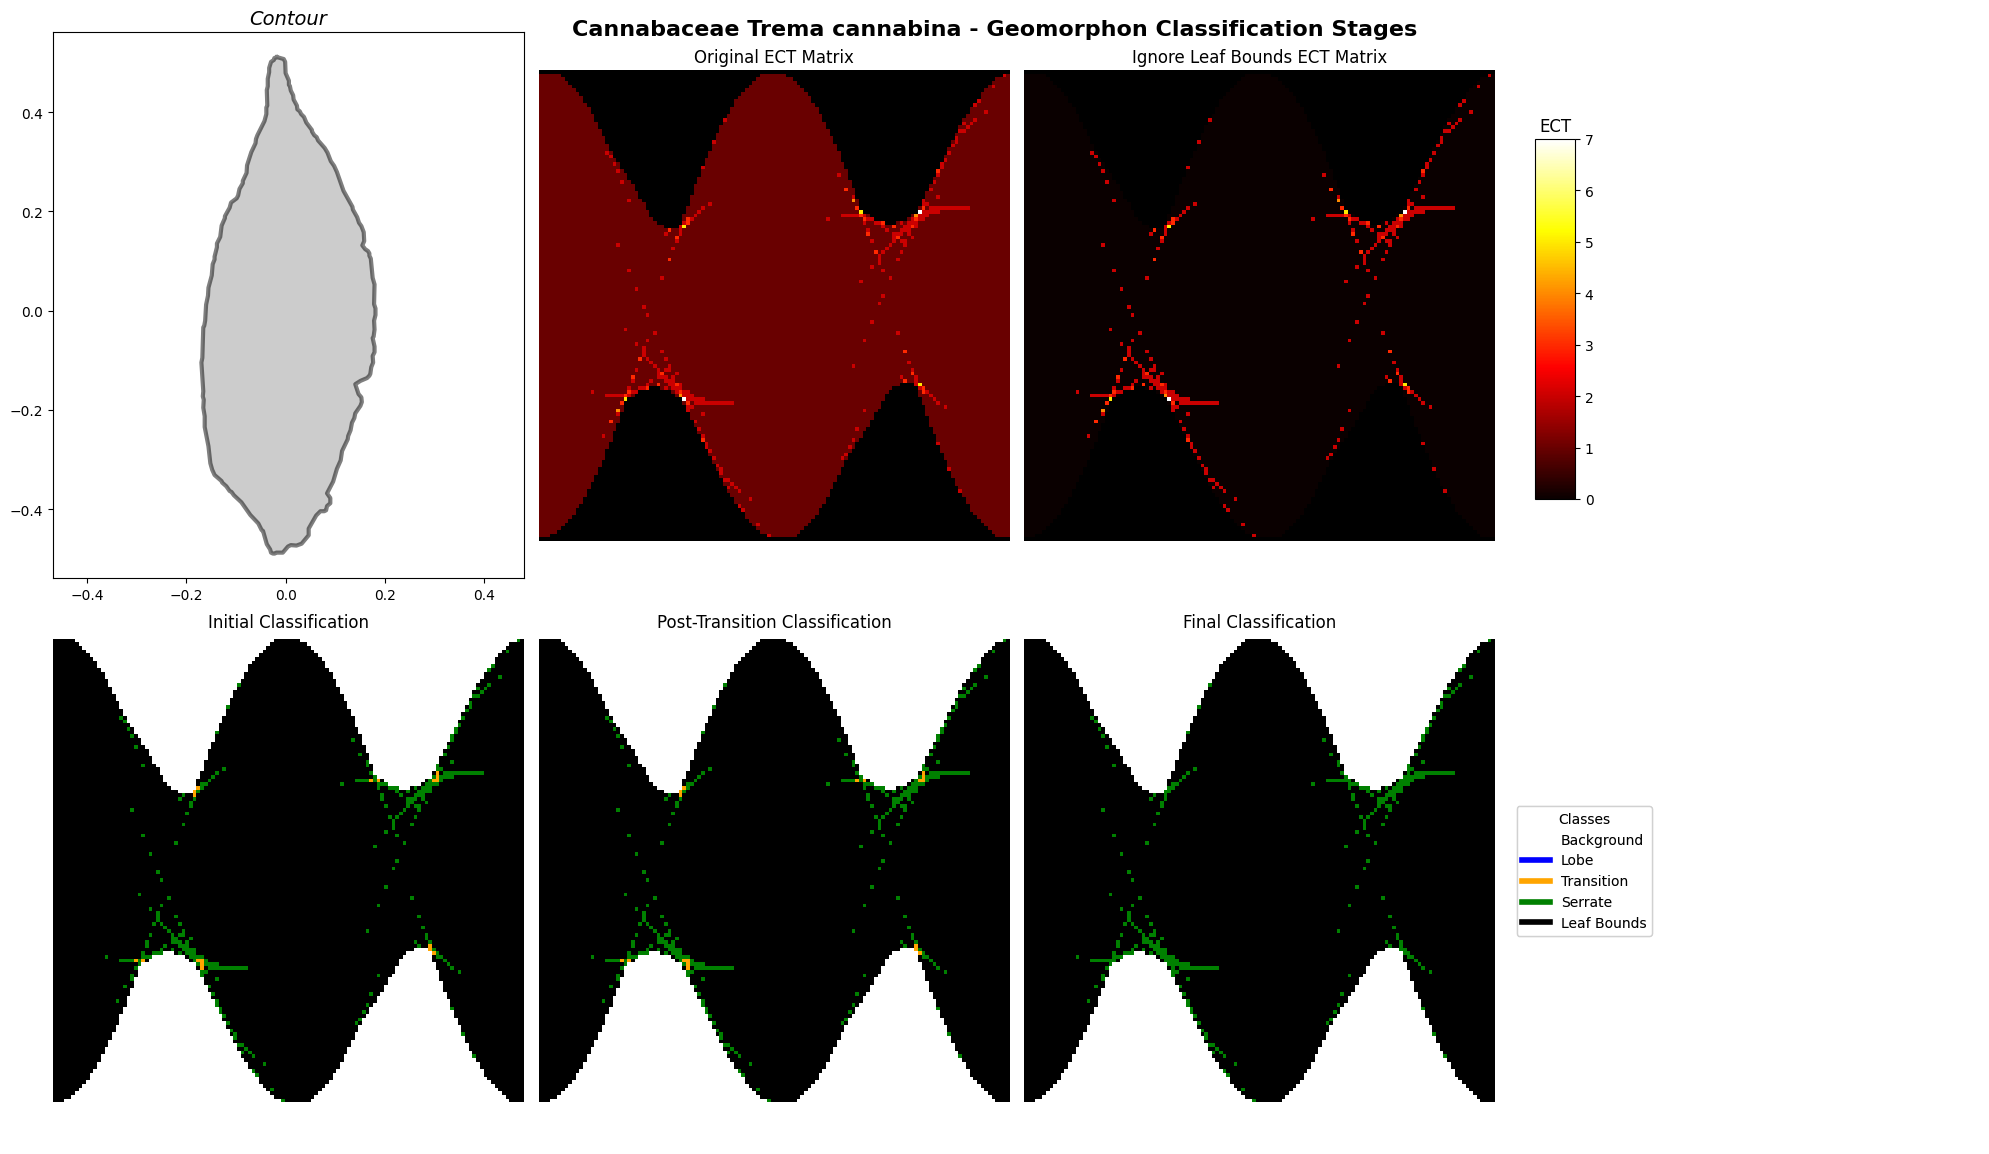

{'background': 16090, 'lobe': 0, 'transition': 0, 'teeth': 294, 'n_cells': 16384, 'n_cells_leaf': 11298, 'n_cells_bg': 5086, 'fraction_teeth': 0.026022304832713755, 'fraction_lobe': 0.0, 'fraction_flat': 0.9739776951672863, 'thresholded_matrix': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'initial_classes': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'post_transition_classes': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'final_classes': array([[0, 0, 0, ..., 0, 0, 0],
     

/home/brlab/Dropbox/LeafMachine2/leafmachine2/ect_methods/utils_metrics.py:1194: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


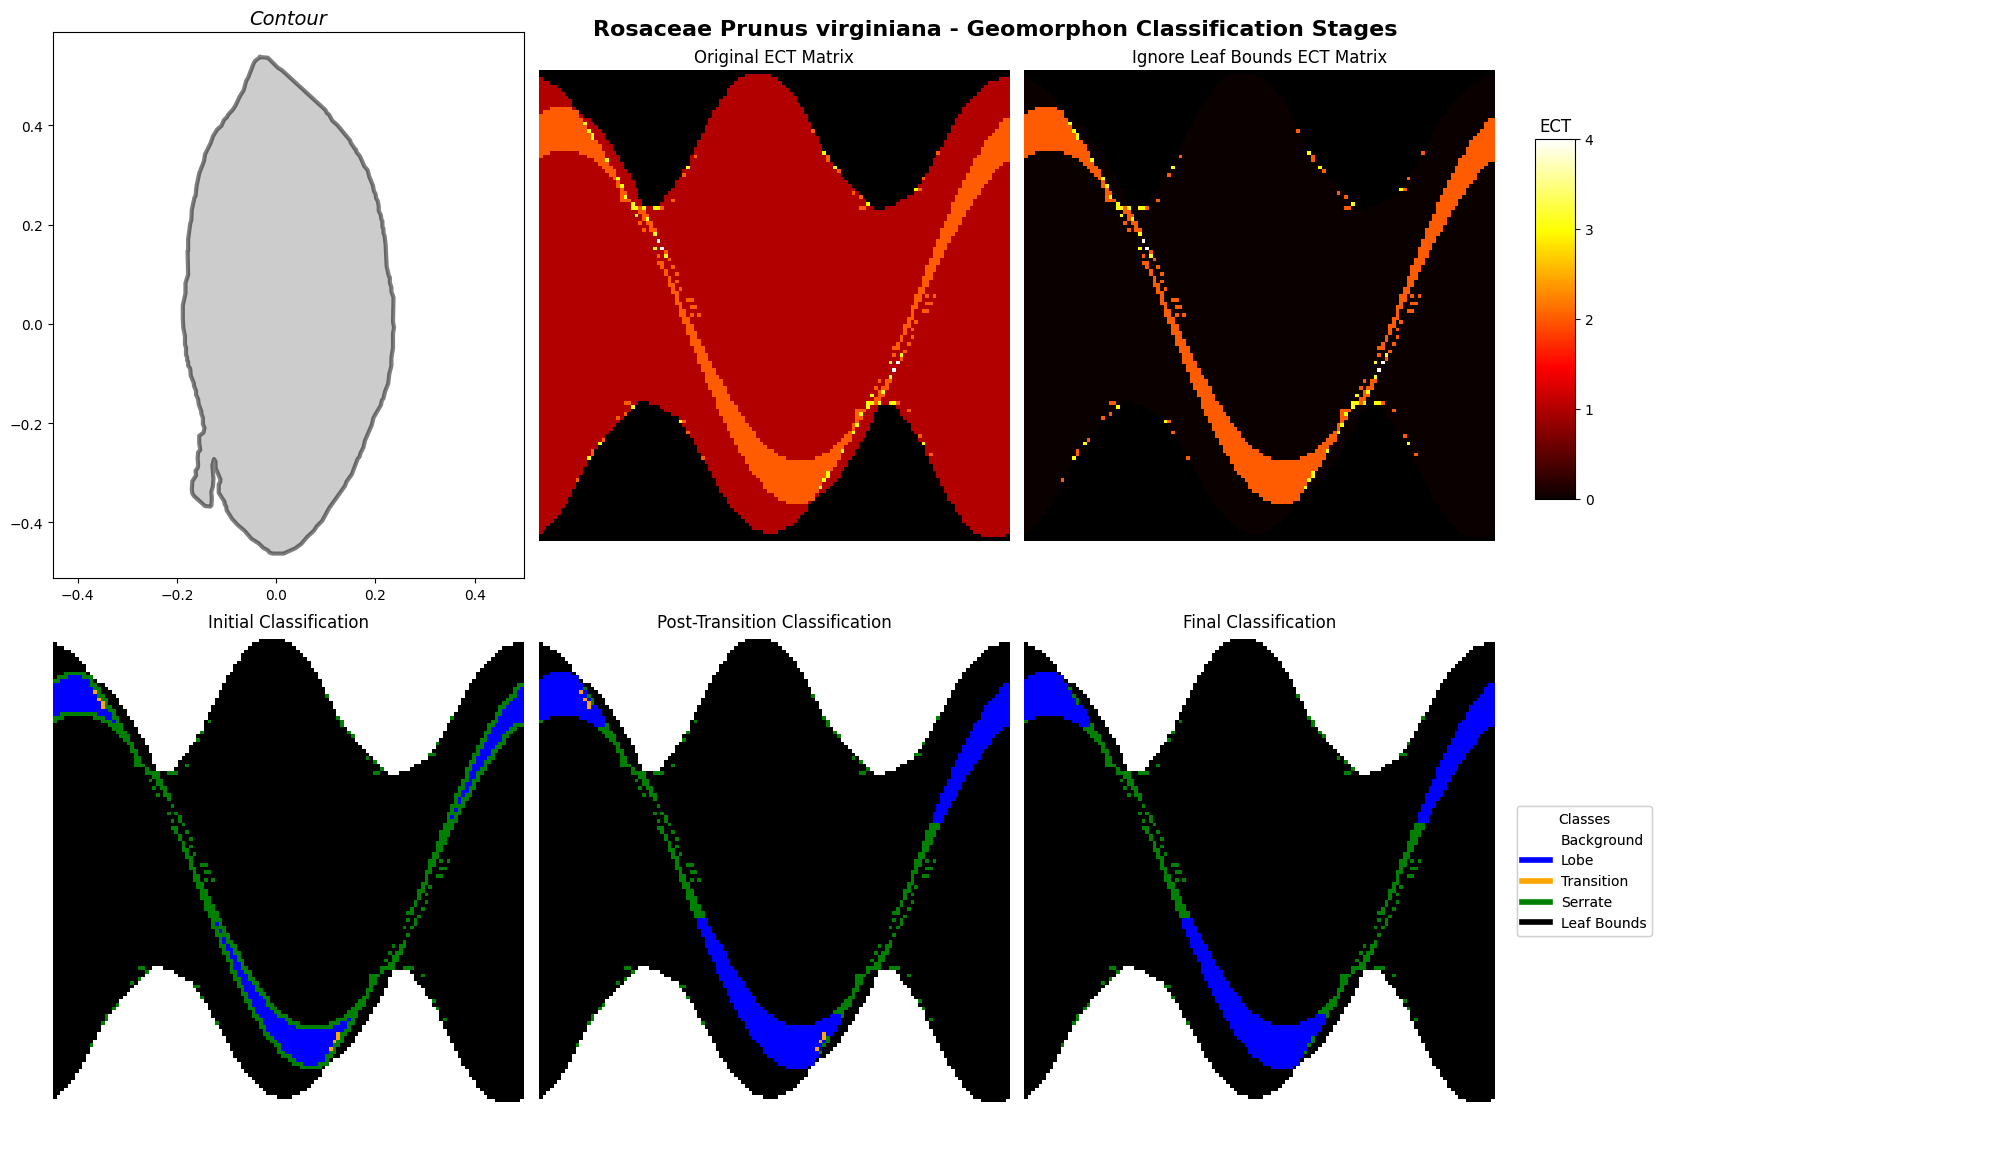

{'background': 15354, 'lobe': 761, 'transition': 0, 'teeth': 269, 'n_cells': 16384, 'n_cells_leaf': 11738, 'n_cells_bg': 4646, 'fraction_teeth': 0.022917021639120804, 'fraction_lobe': 0.06483216902368376, 'fraction_flat': 0.9122508093371954, 'thresholded_matrix': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'initial_classes': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'post_transition_classes': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'final_classes': array([[0, 0, 0, ..

/home/brlab/Dropbox/LeafMachine2/leafmachine2/ect_methods/utils_metrics.py:1194: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


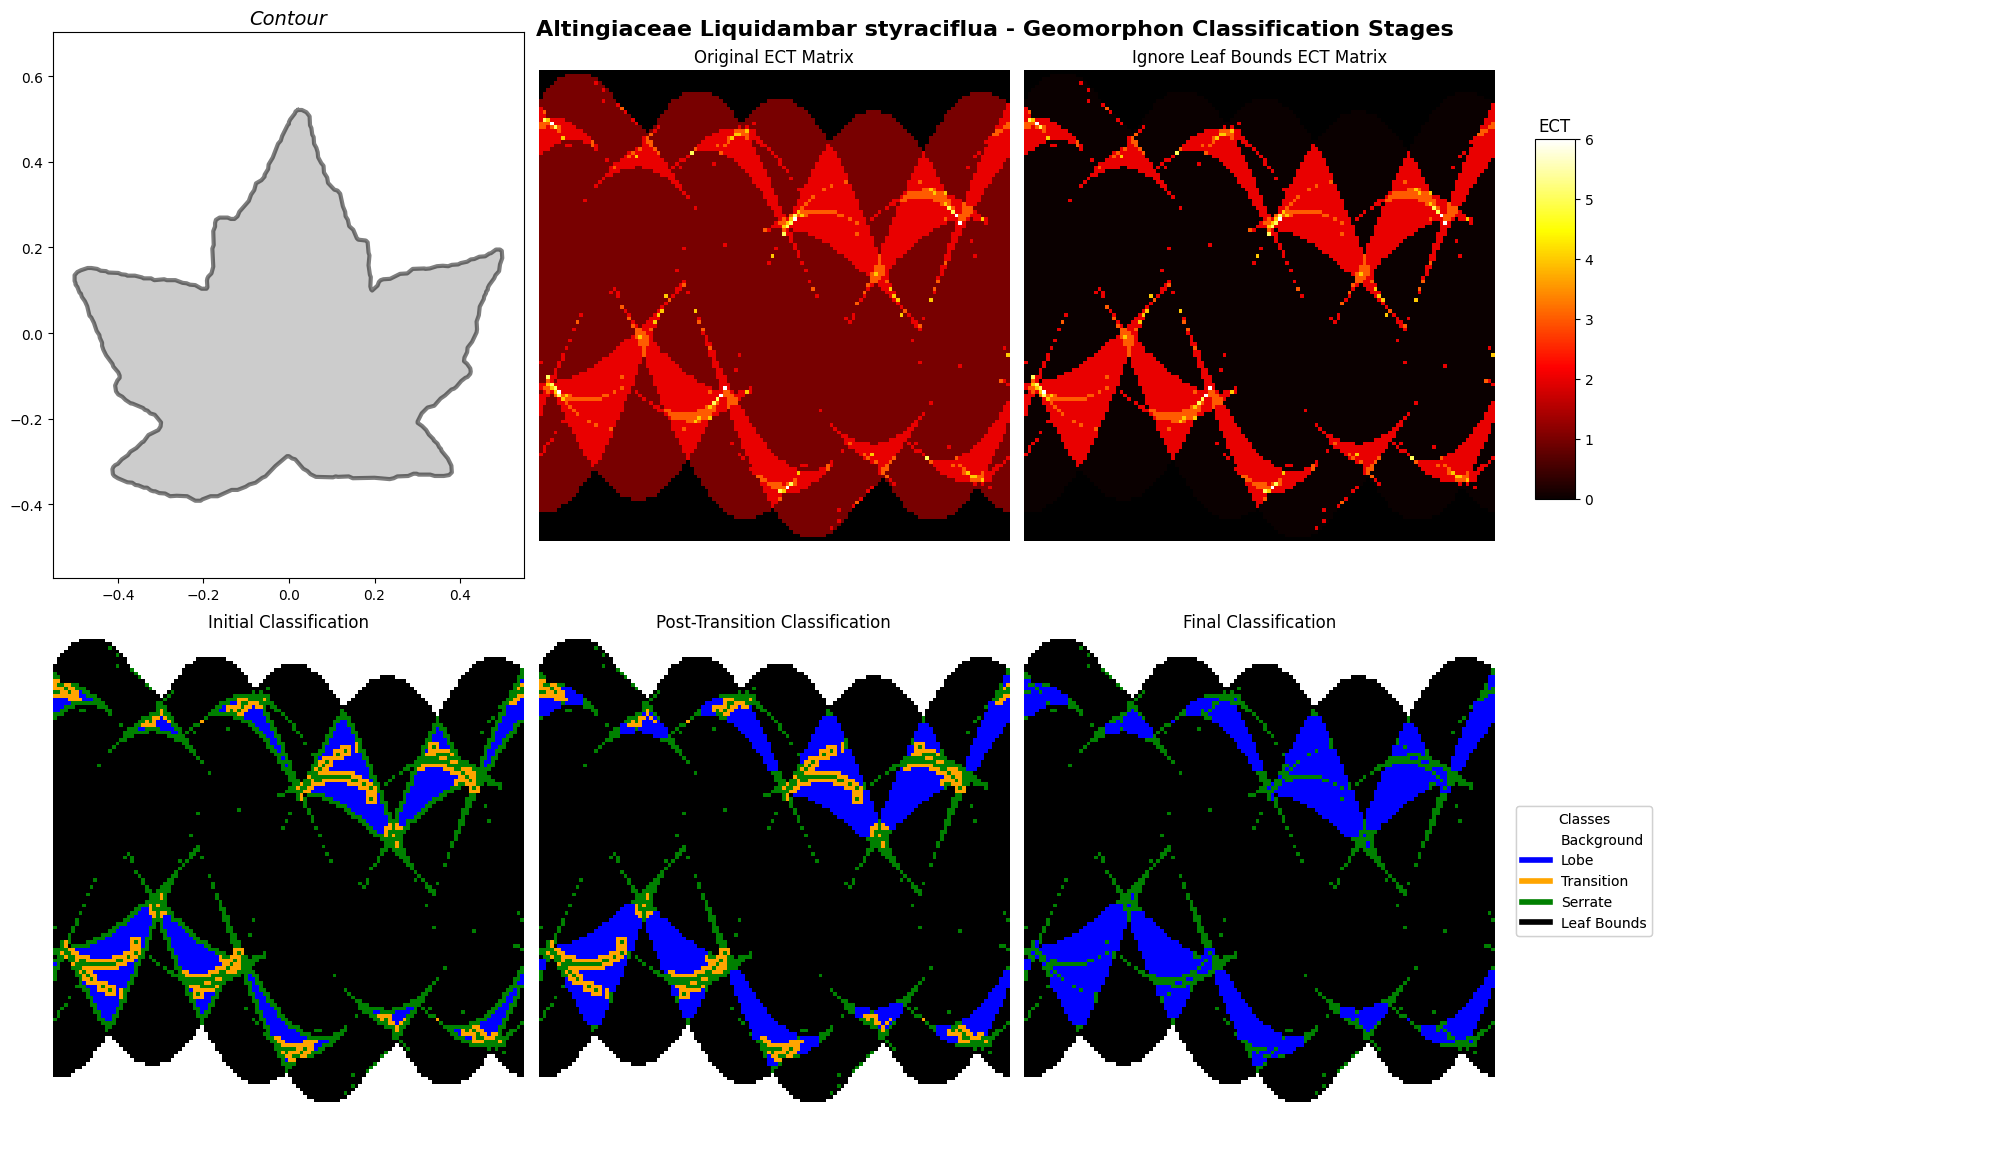

{'background': 13516, 'lobe': 2053, 'transition': 0, 'teeth': 815, 'n_cells': 16384, 'n_cells_leaf': 13820, 'n_cells_bg': 2564, 'fraction_teeth': 0.05897250361794501, 'fraction_lobe': 0.14855282199710565, 'fraction_flat': 0.7924746743849493, 'thresholded_matrix': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'initial_classes': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'post_transition_classes': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'final_classes': array([[0, 0, 0, ..

/home/brlab/Dropbox/LeafMachine2/leafmachine2/ect_methods/utils_metrics.py:1194: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


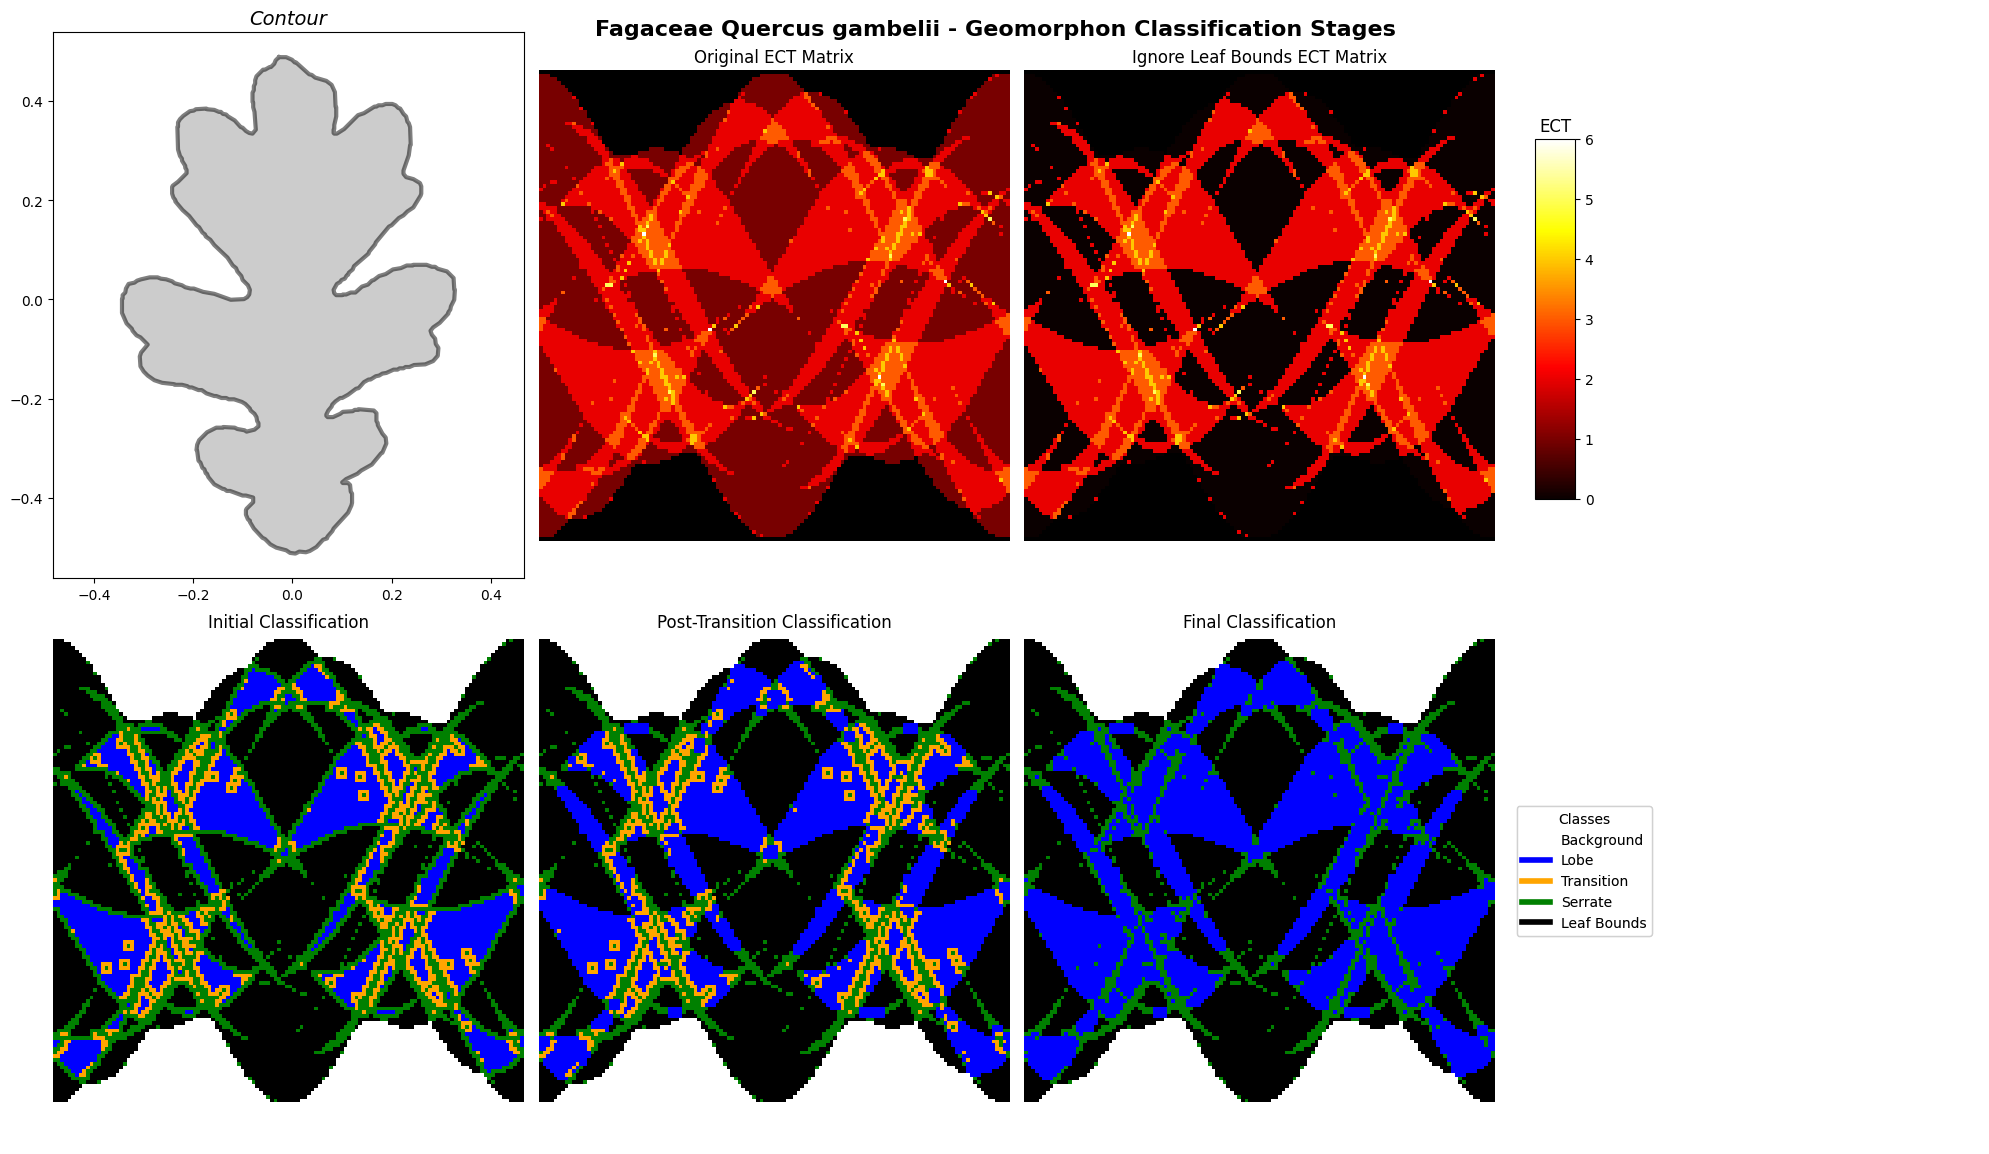

{'background': 9792, 'lobe': 4879, 'transition': 0, 'teeth': 1713, 'n_cells': 16384, 'n_cells_leaf': 13184, 'n_cells_bg': 3200, 'fraction_teeth': 0.12993021844660194, 'fraction_lobe': 0.37006978155339804, 'fraction_flat': 0.5, 'thresholded_matrix': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'initial_classes': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'post_transition_classes': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'final_classes': array([[0, 0, 0, ..., 0, 0, 0],
  

/home/brlab/Dropbox/LeafMachine2/leafmachine2/ect_methods/utils_metrics.py:1194: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


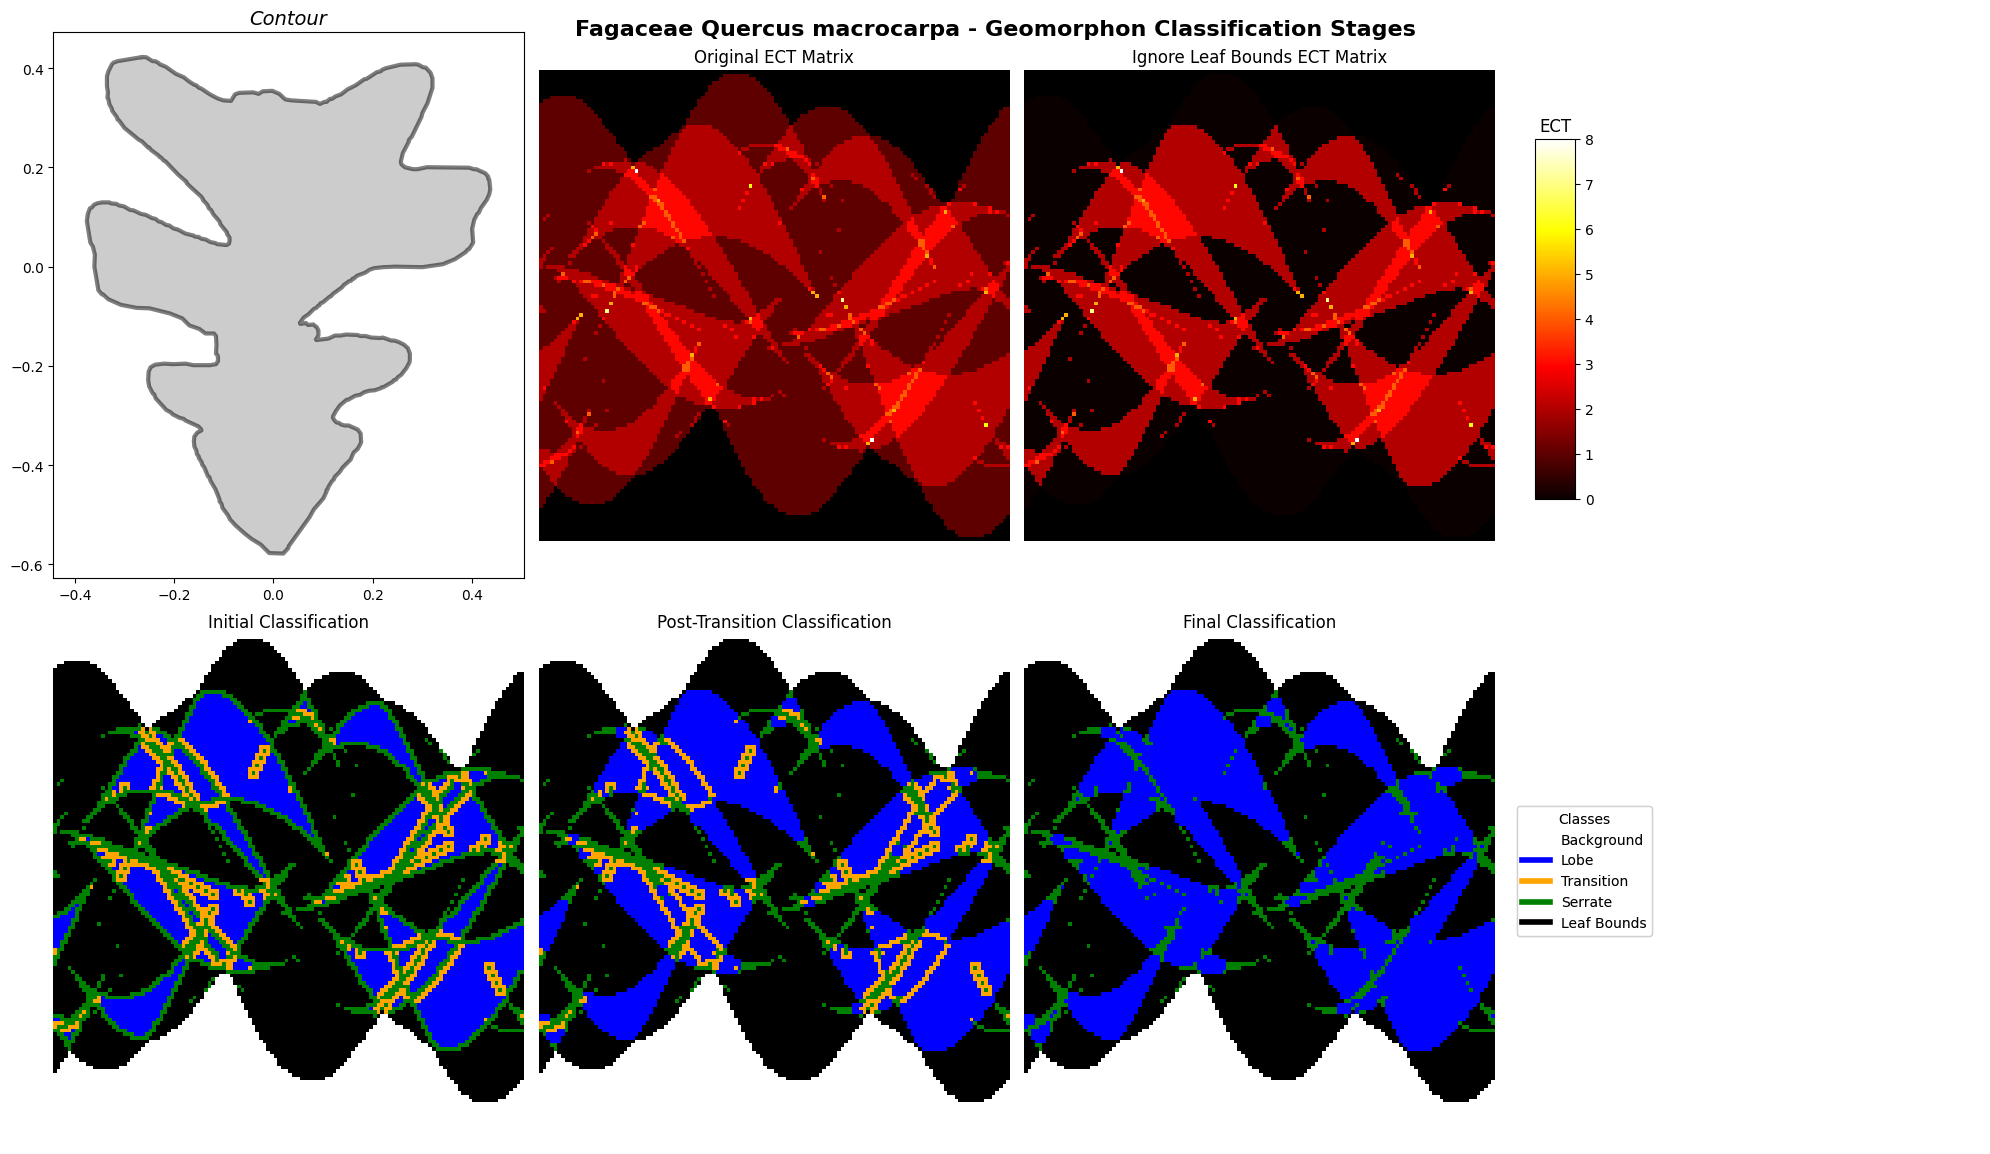

{'background': 10840, 'lobe': 4561, 'transition': 0, 'teeth': 983, 'n_cells': 16384, 'n_cells_leaf': 12556, 'n_cells_bg': 3828, 'fraction_teeth': 0.07828926409684613, 'fraction_lobe': 0.36325262822554955, 'fraction_flat': 0.5584581076776043, 'thresholded_matrix': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'initial_classes': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'post_transition_classes': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'final_classes': array([[0, 0, 0, ..

/home/brlab/Dropbox/LeafMachine2/venv_LM2_38/lib/python3.10/site-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)
/home/brlab/Dropbox/LeafMachine2/leafmachine2/ect_methods/utils_metrics.py:1194: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


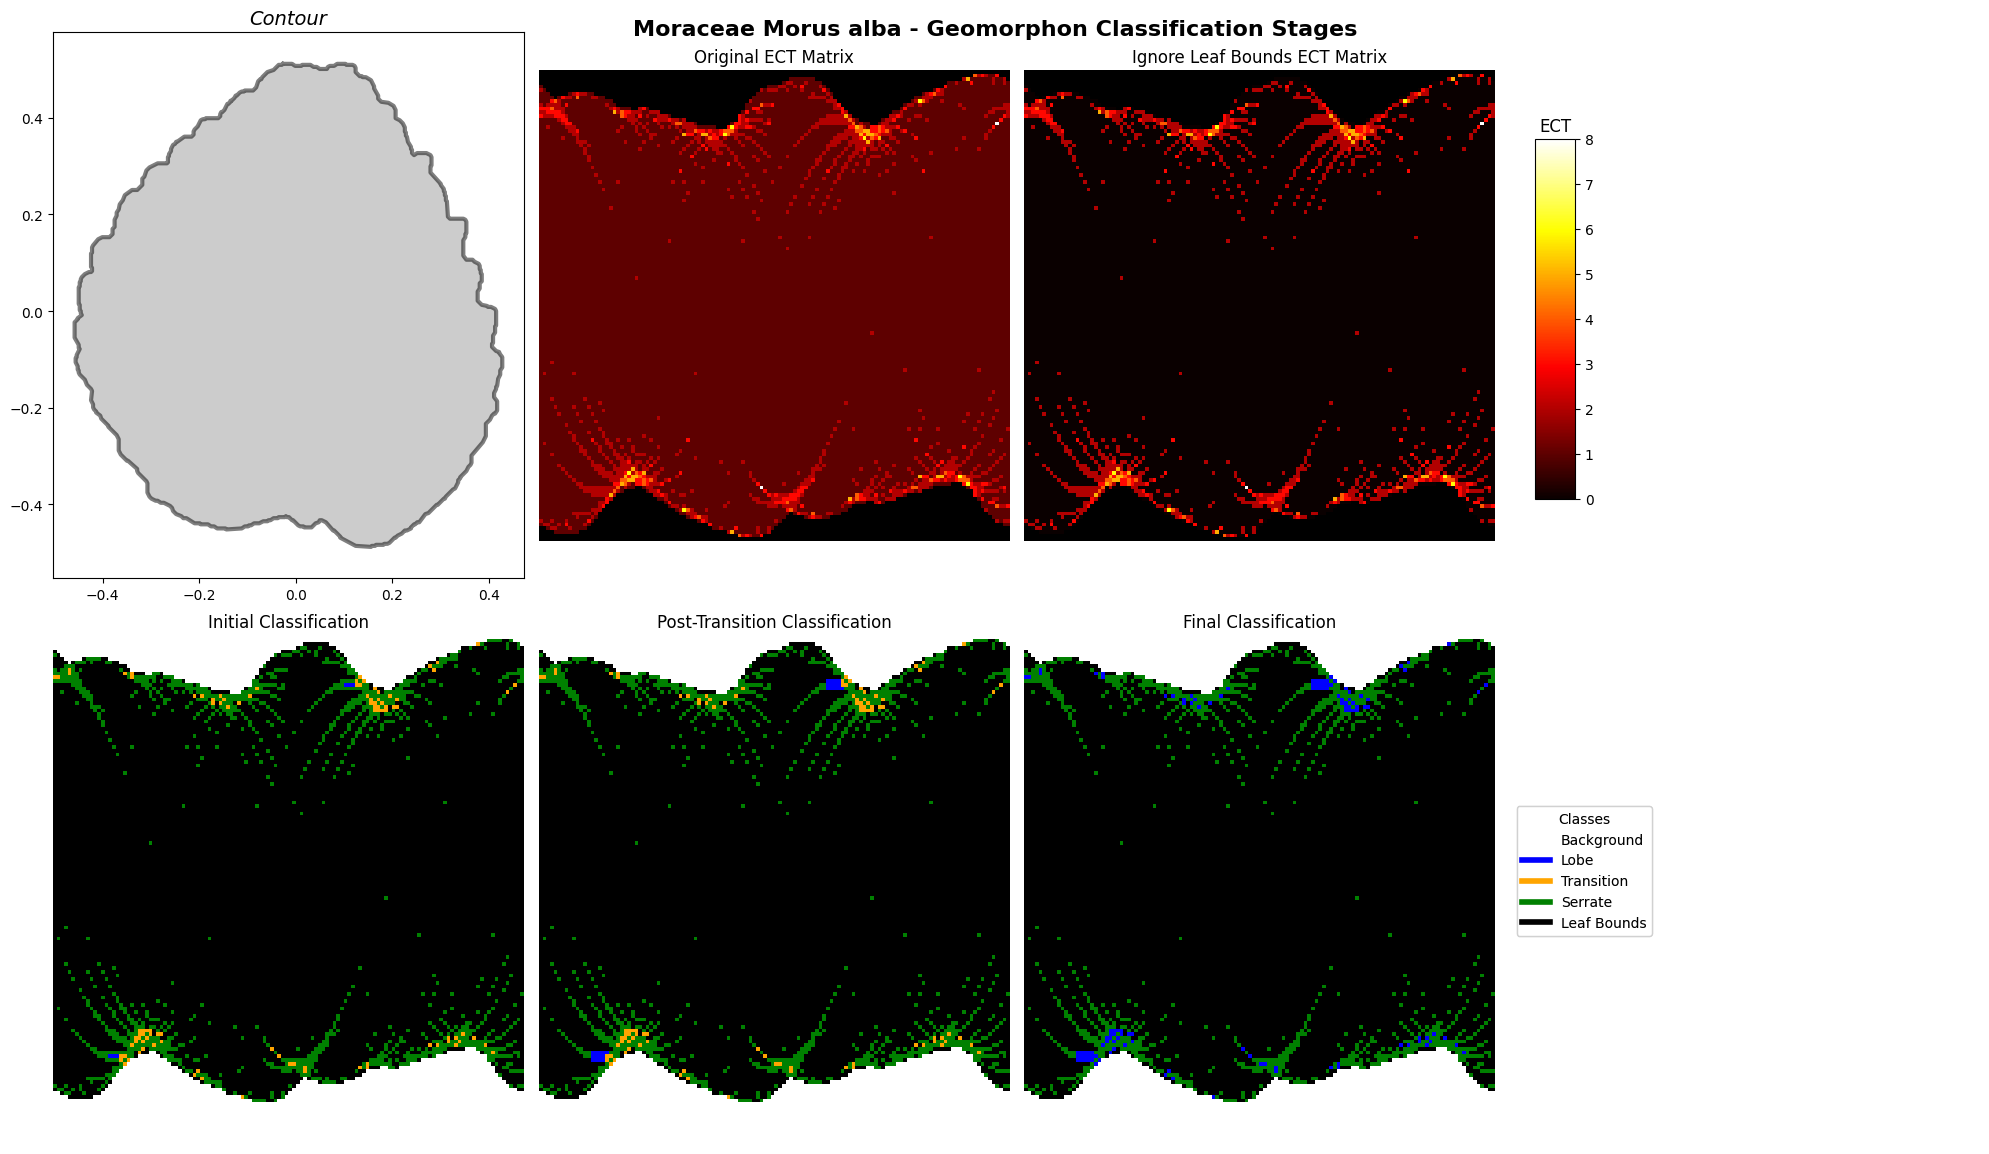

{'background': 15212, 'lobe': 122, 'transition': 0, 'teeth': 1050, 'n_cells': 16384, 'n_cells_leaf': 14342, 'n_cells_bg': 2042, 'fraction_teeth': 0.07321154650676336, 'fraction_lobe': 0.008506484451262028, 'fraction_flat': 0.9182819690419746, 'thresholded_matrix': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 2., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'initial_classes': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'post_transition_classes': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'final_classes': array([[0, 0, 0, .

/home/brlab/Dropbox/LeafMachine2/venv_LM2_38/lib/python3.10/site-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)
/home/brlab/Dropbox/LeafMachine2/leafmachine2/ect_methods/utils_metrics.py:1194: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


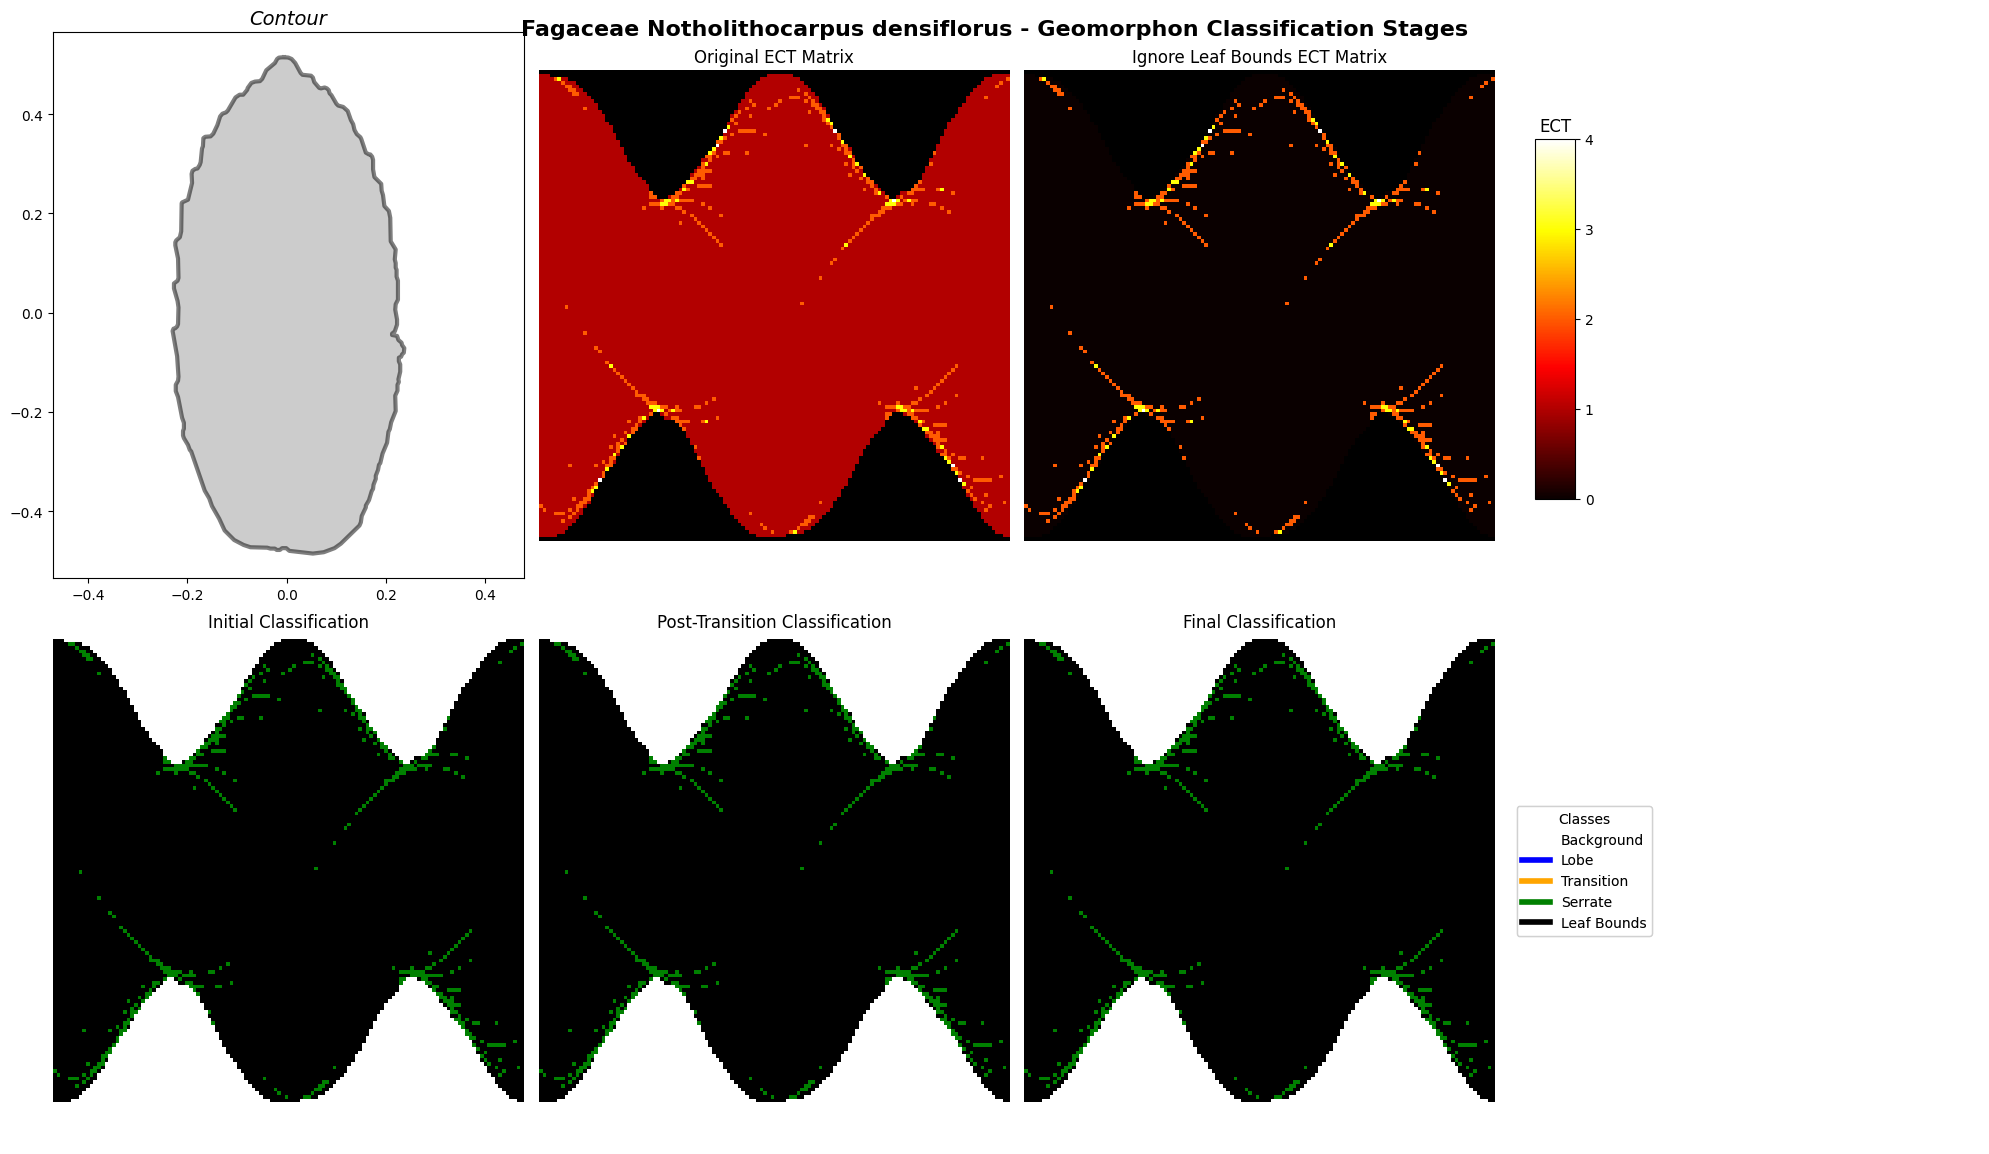

{'background': 15950, 'lobe': 0, 'transition': 0, 'teeth': 434, 'n_cells': 16384, 'n_cells_leaf': 12320, 'n_cells_bg': 4064, 'fraction_teeth': 0.035227272727272725, 'fraction_lobe': 0.0, 'fraction_flat': 0.9647727272727272, 'thresholded_matrix': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 2.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'initial_classes': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 3],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'post_transition_classes': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 3],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'final_classes': array([[0, 0, 0, ..., 0, 0, 0],
     

/home/brlab/Dropbox/LeafMachine2/venv_LM2_38/lib/python3.10/site-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)
/home/brlab/Dropbox/LeafMachine2/leafmachine2/ect_methods/utils_metrics.py:1194: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


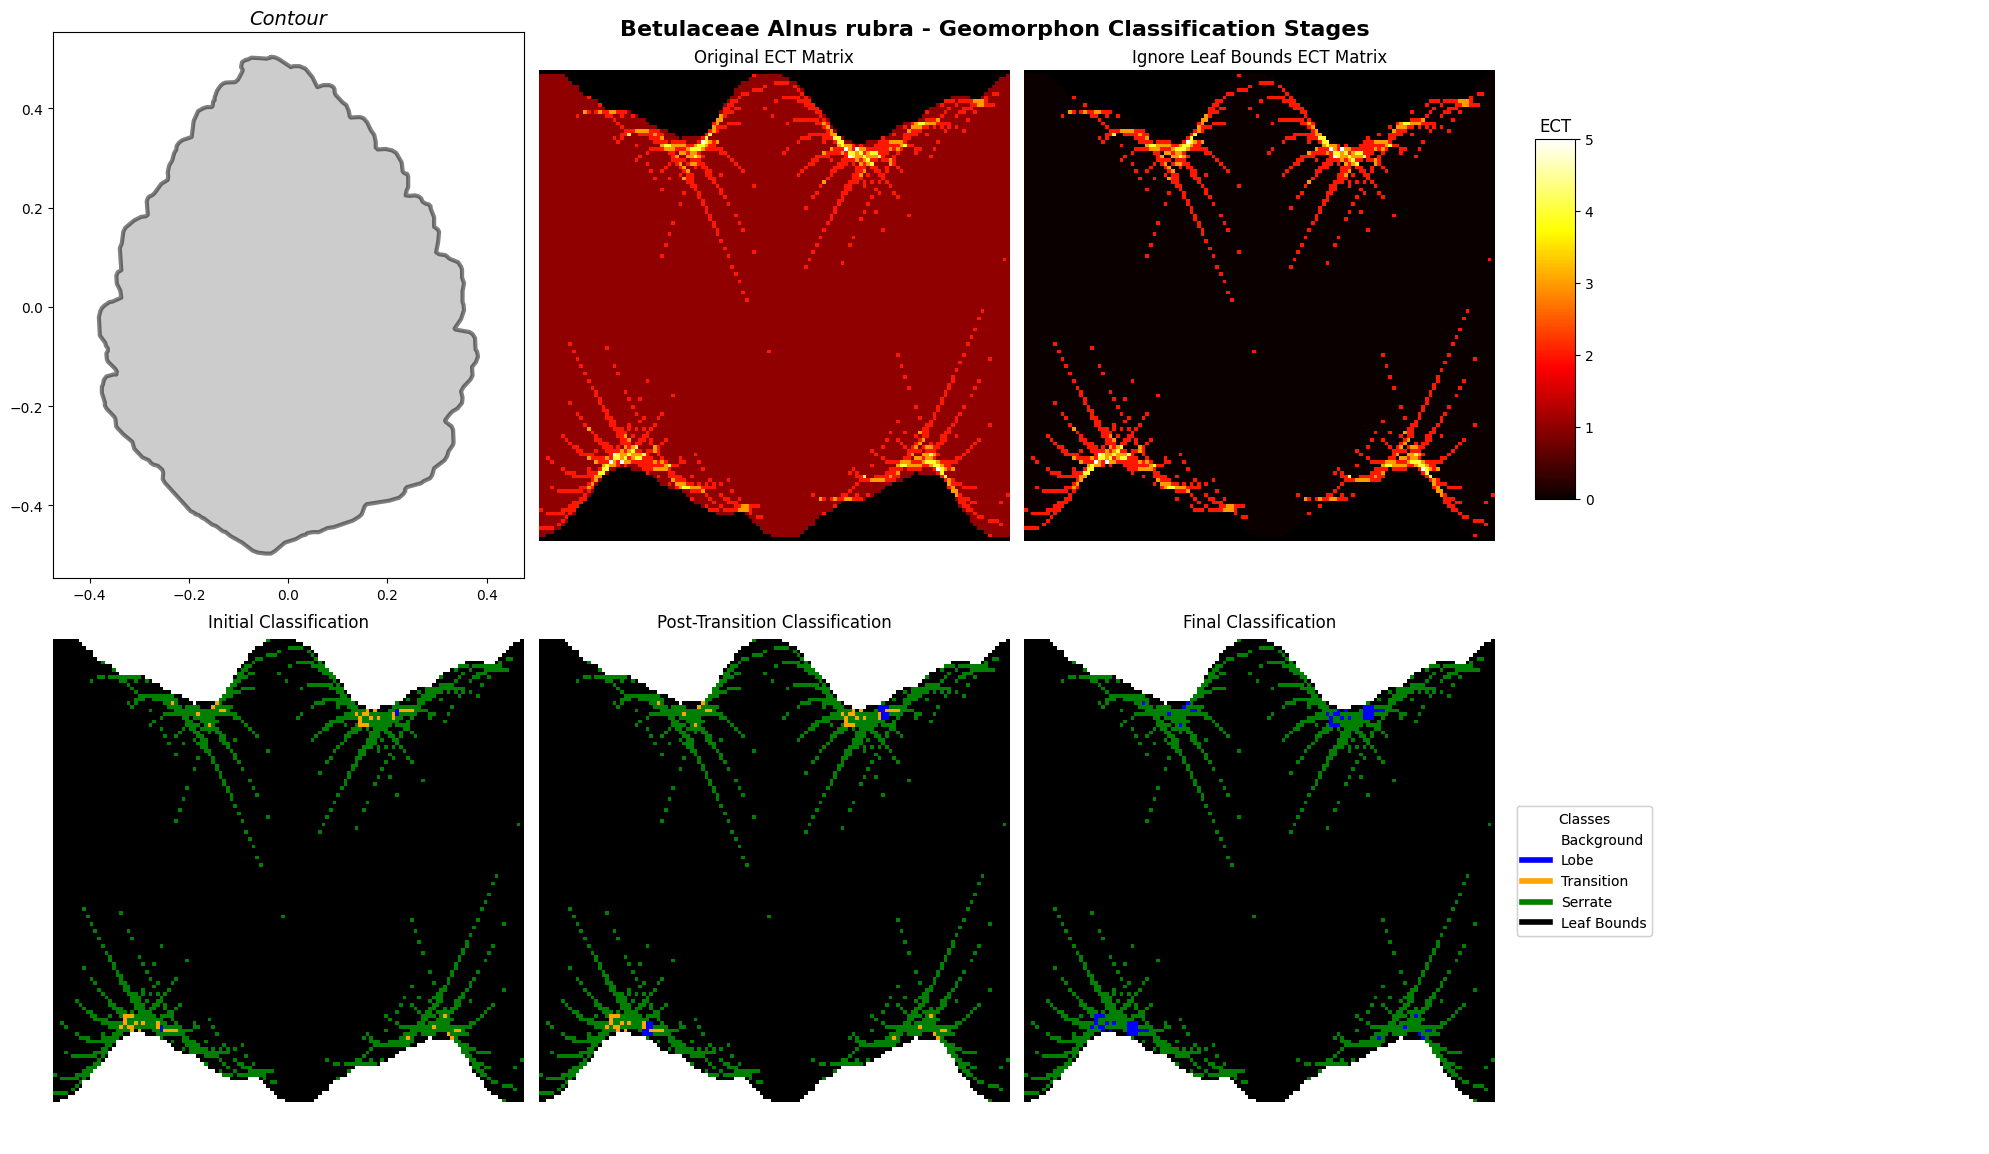

{'background': 15204, 'lobe': 68, 'transition': 0, 'teeth': 1112, 'n_cells': 16384, 'n_cells_leaf': 13832, 'n_cells_bg': 2552, 'fraction_teeth': 0.0803932909196067, 'fraction_lobe': 0.004916136495083863, 'fraction_flat': 0.9146905725853094, 'thresholded_matrix': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'initial_classes': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'post_transition_classes': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'final_classes': array([[0, 0, 0, ...

/home/brlab/Dropbox/LeafMachine2/leafmachine2/ect_methods/utils_metrics.py:1194: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


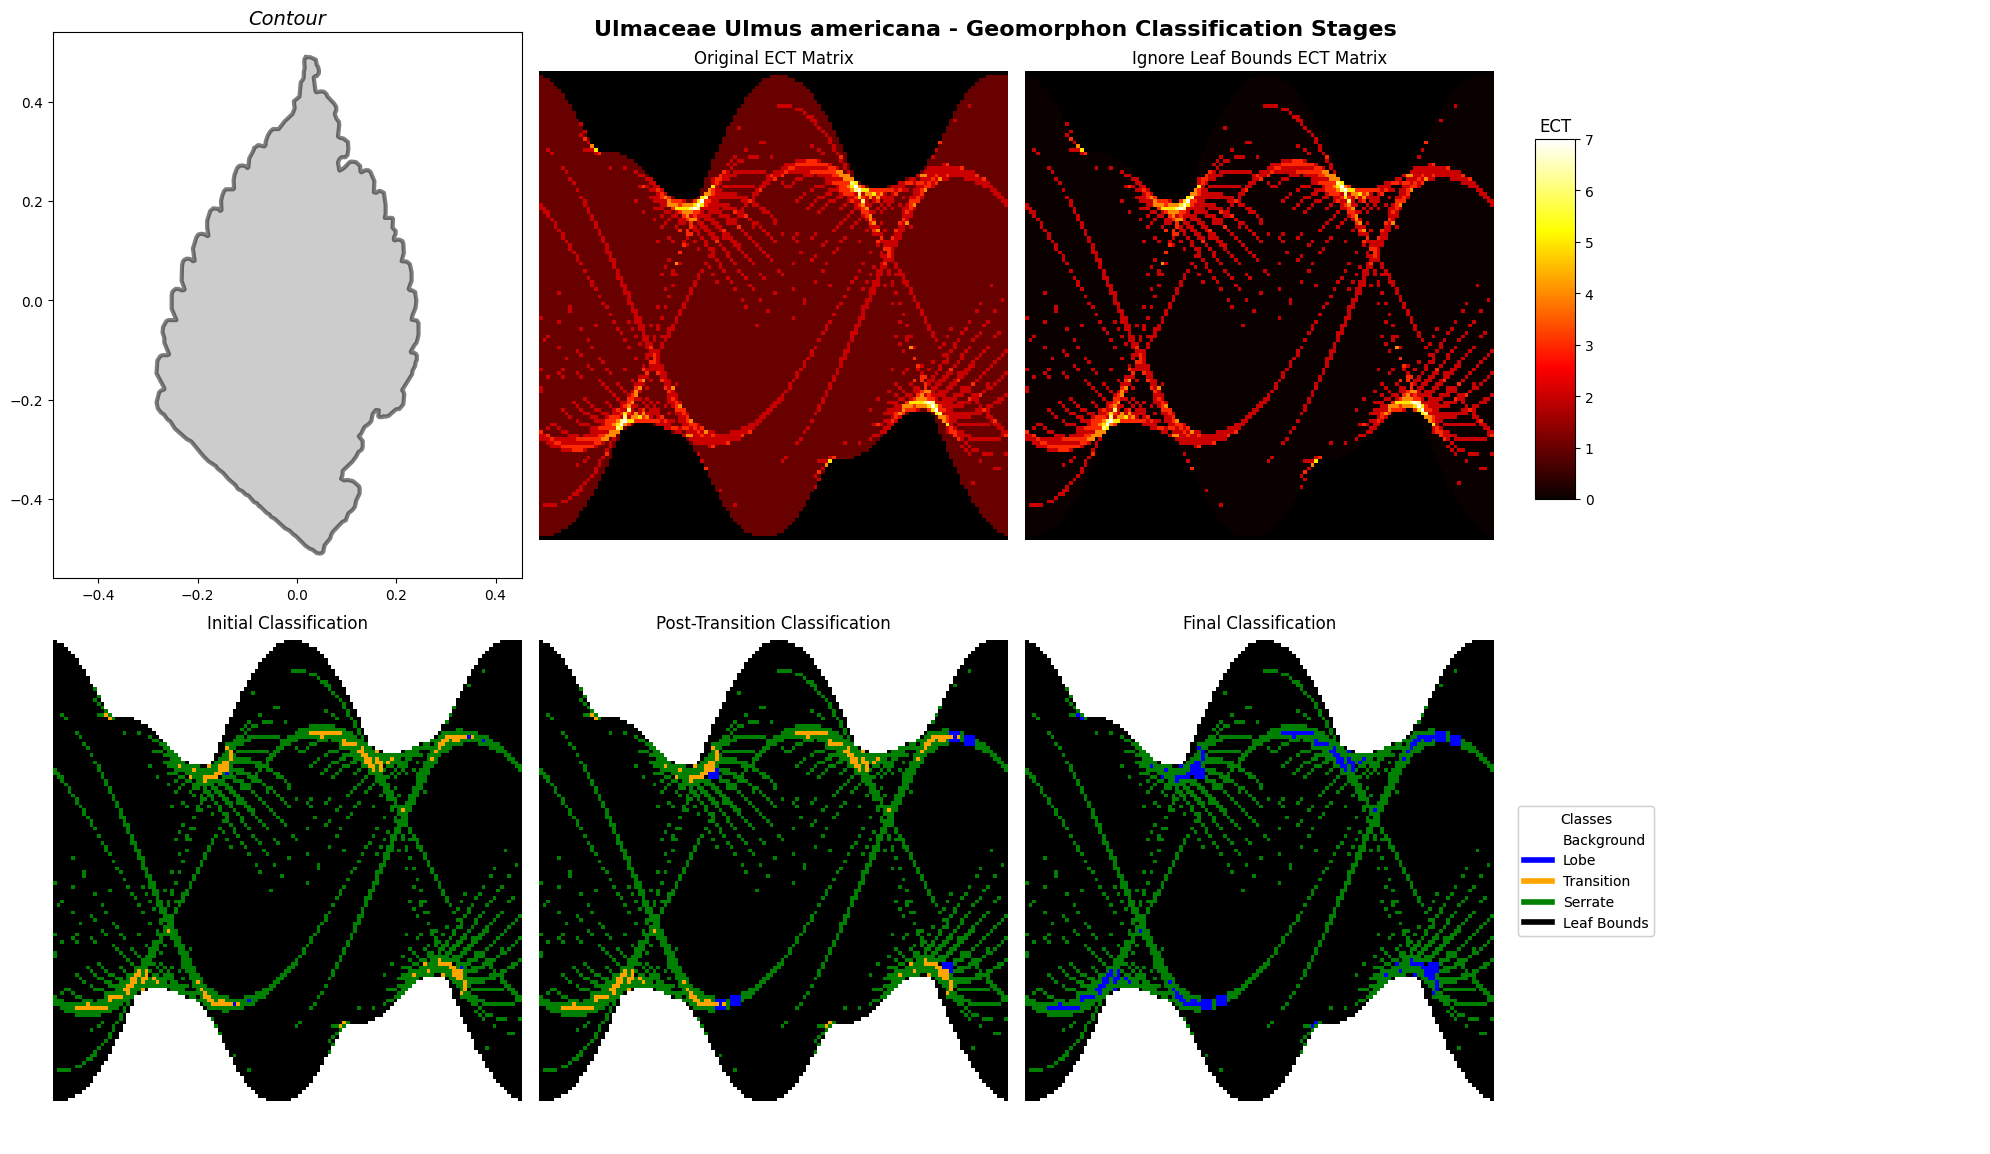

{'background': 14448, 'lobe': 200, 'transition': 0, 'teeth': 1736, 'n_cells': 16384, 'n_cells_leaf': 11952, 'n_cells_bg': 4432, 'fraction_teeth': 0.14524765729585007, 'fraction_lobe': 0.01673360107095047, 'fraction_flat': 0.8380187416331994, 'thresholded_matrix': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'initial_classes': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'post_transition_classes': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'final_classes': array([[0, 0, 0, ..

/home/brlab/Dropbox/LeafMachine2/venv_LM2_38/lib/python3.10/site-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)
/home/brlab/Dropbox/LeafMachine2/leafmachine2/ect_methods/utils_metrics.py:1194: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


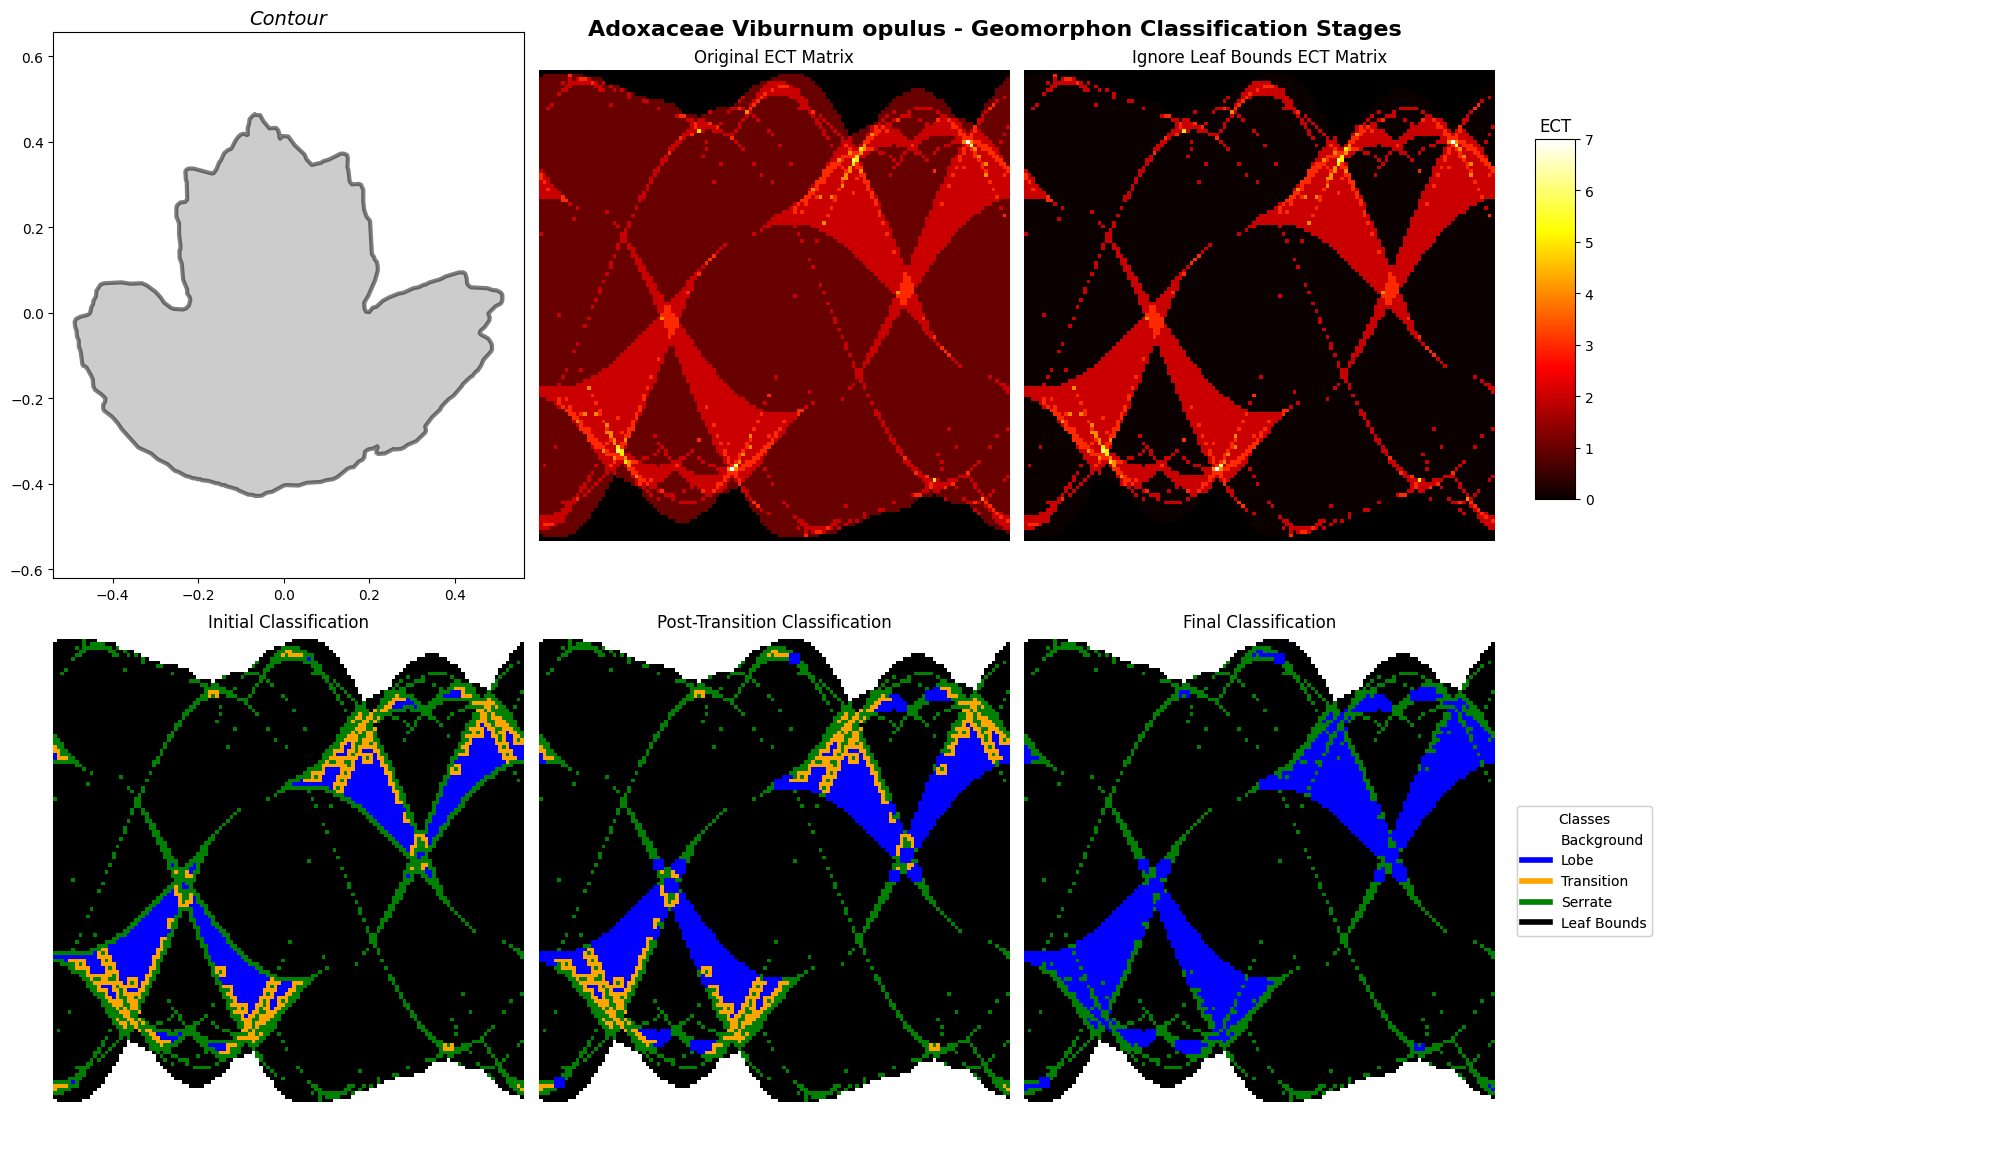

{'background': 13094, 'lobe': 2010, 'transition': 0, 'teeth': 1280, 'n_cells': 16384, 'n_cells_leaf': 14546, 'n_cells_bg': 1838, 'fraction_teeth': 0.08799670012374536, 'fraction_lobe': 0.1381823181630689, 'fraction_flat': 0.7738209817131858, 'thresholded_matrix': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'initial_classes': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'post_transition_classes': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'final_classes': array([[0, 0, 0, ..

/home/brlab/Dropbox/LeafMachine2/leafmachine2/ect_methods/utils_metrics.py:1194: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


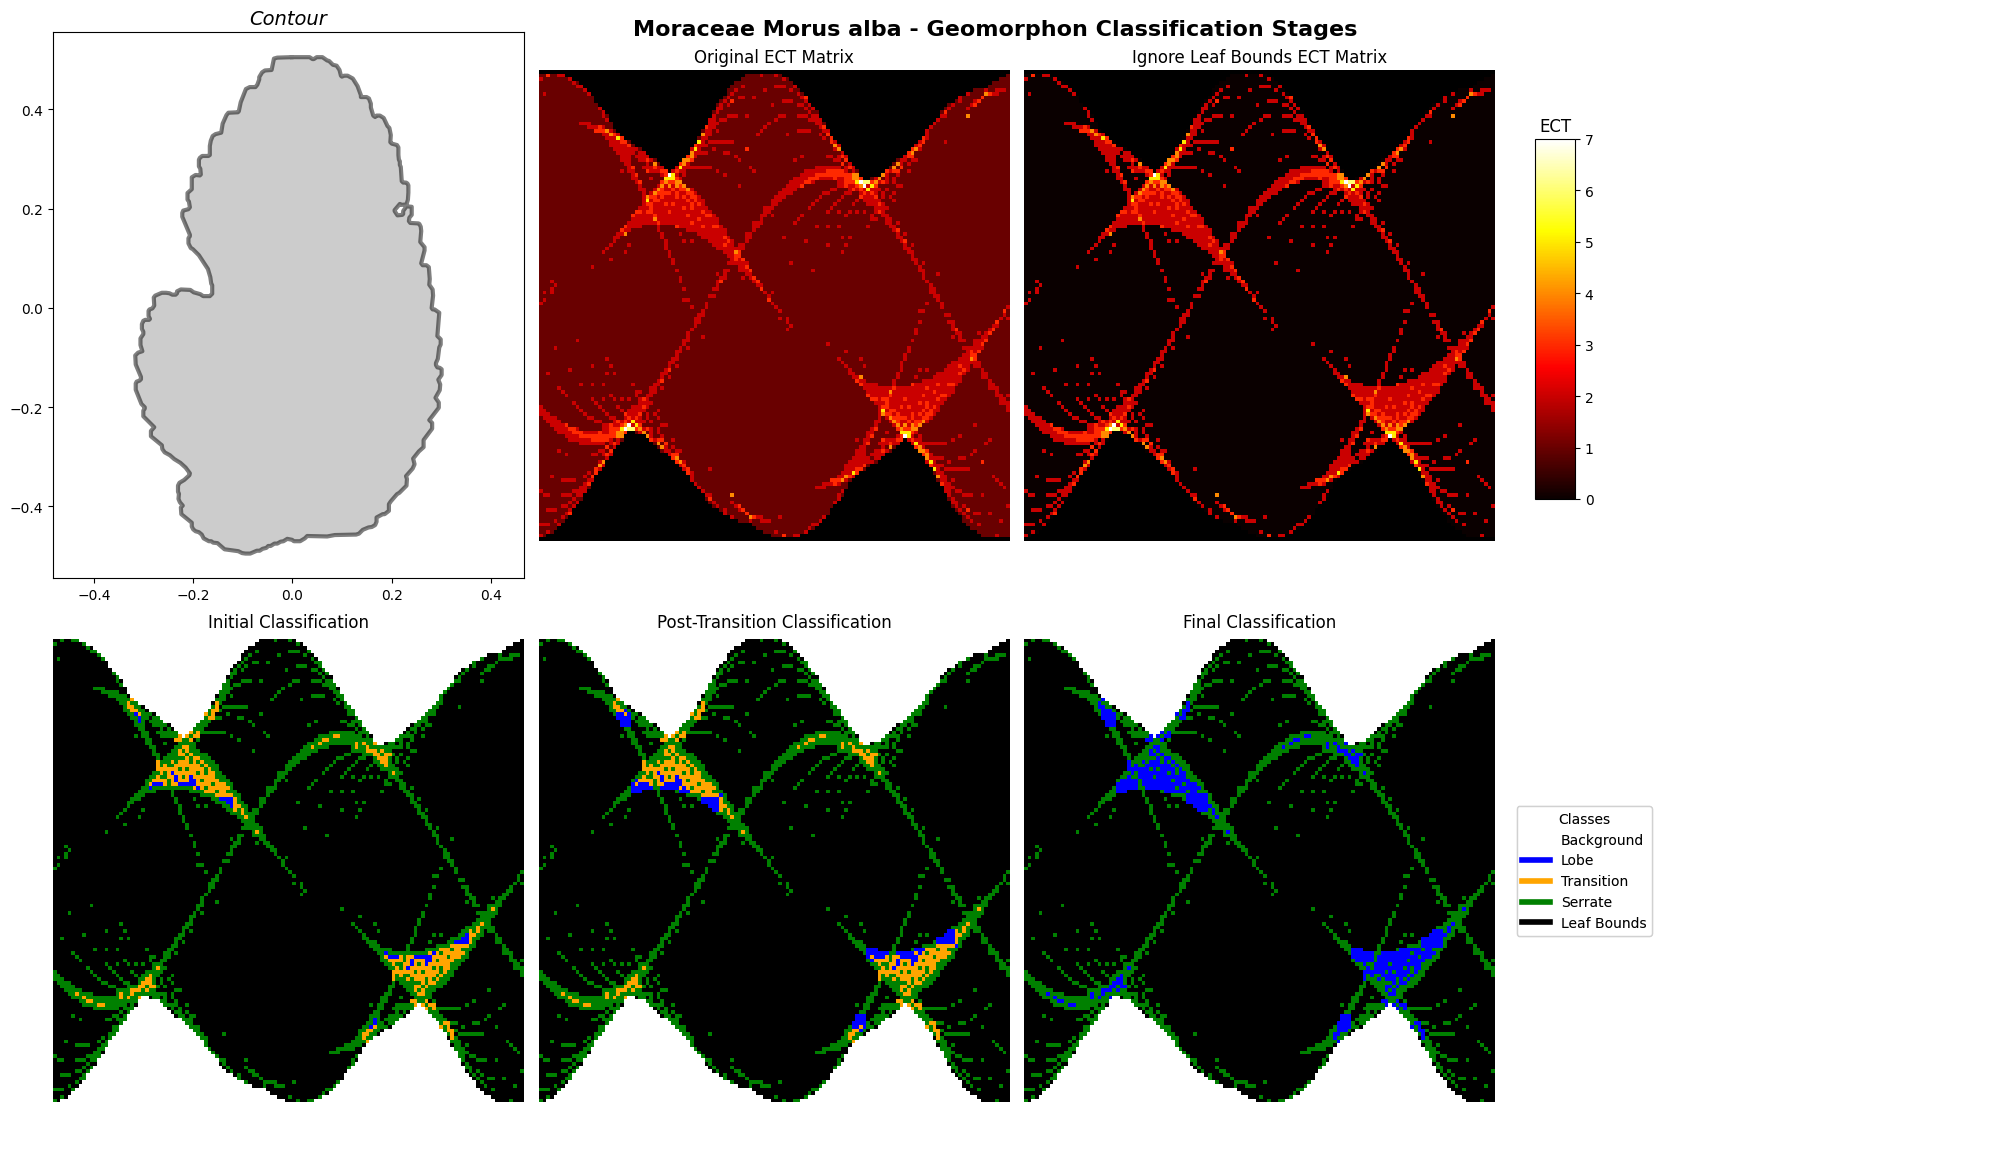

{'background': 14430, 'lobe': 452, 'transition': 0, 'teeth': 1502, 'n_cells': 16384, 'n_cells_leaf': 13112, 'n_cells_bg': 3272, 'fraction_teeth': 0.1145515558267236, 'fraction_lobe': 0.034472239170225745, 'fraction_flat': 0.8509762050030506, 'thresholded_matrix': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 3., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 2., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'initial_classes': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 3, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 3, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'post_transition_classes': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 3, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 3, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'final_classes': array([[0, 0, 0, ..

/home/brlab/Dropbox/LeafMachine2/leafmachine2/ect_methods/utils_metrics.py:1194: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


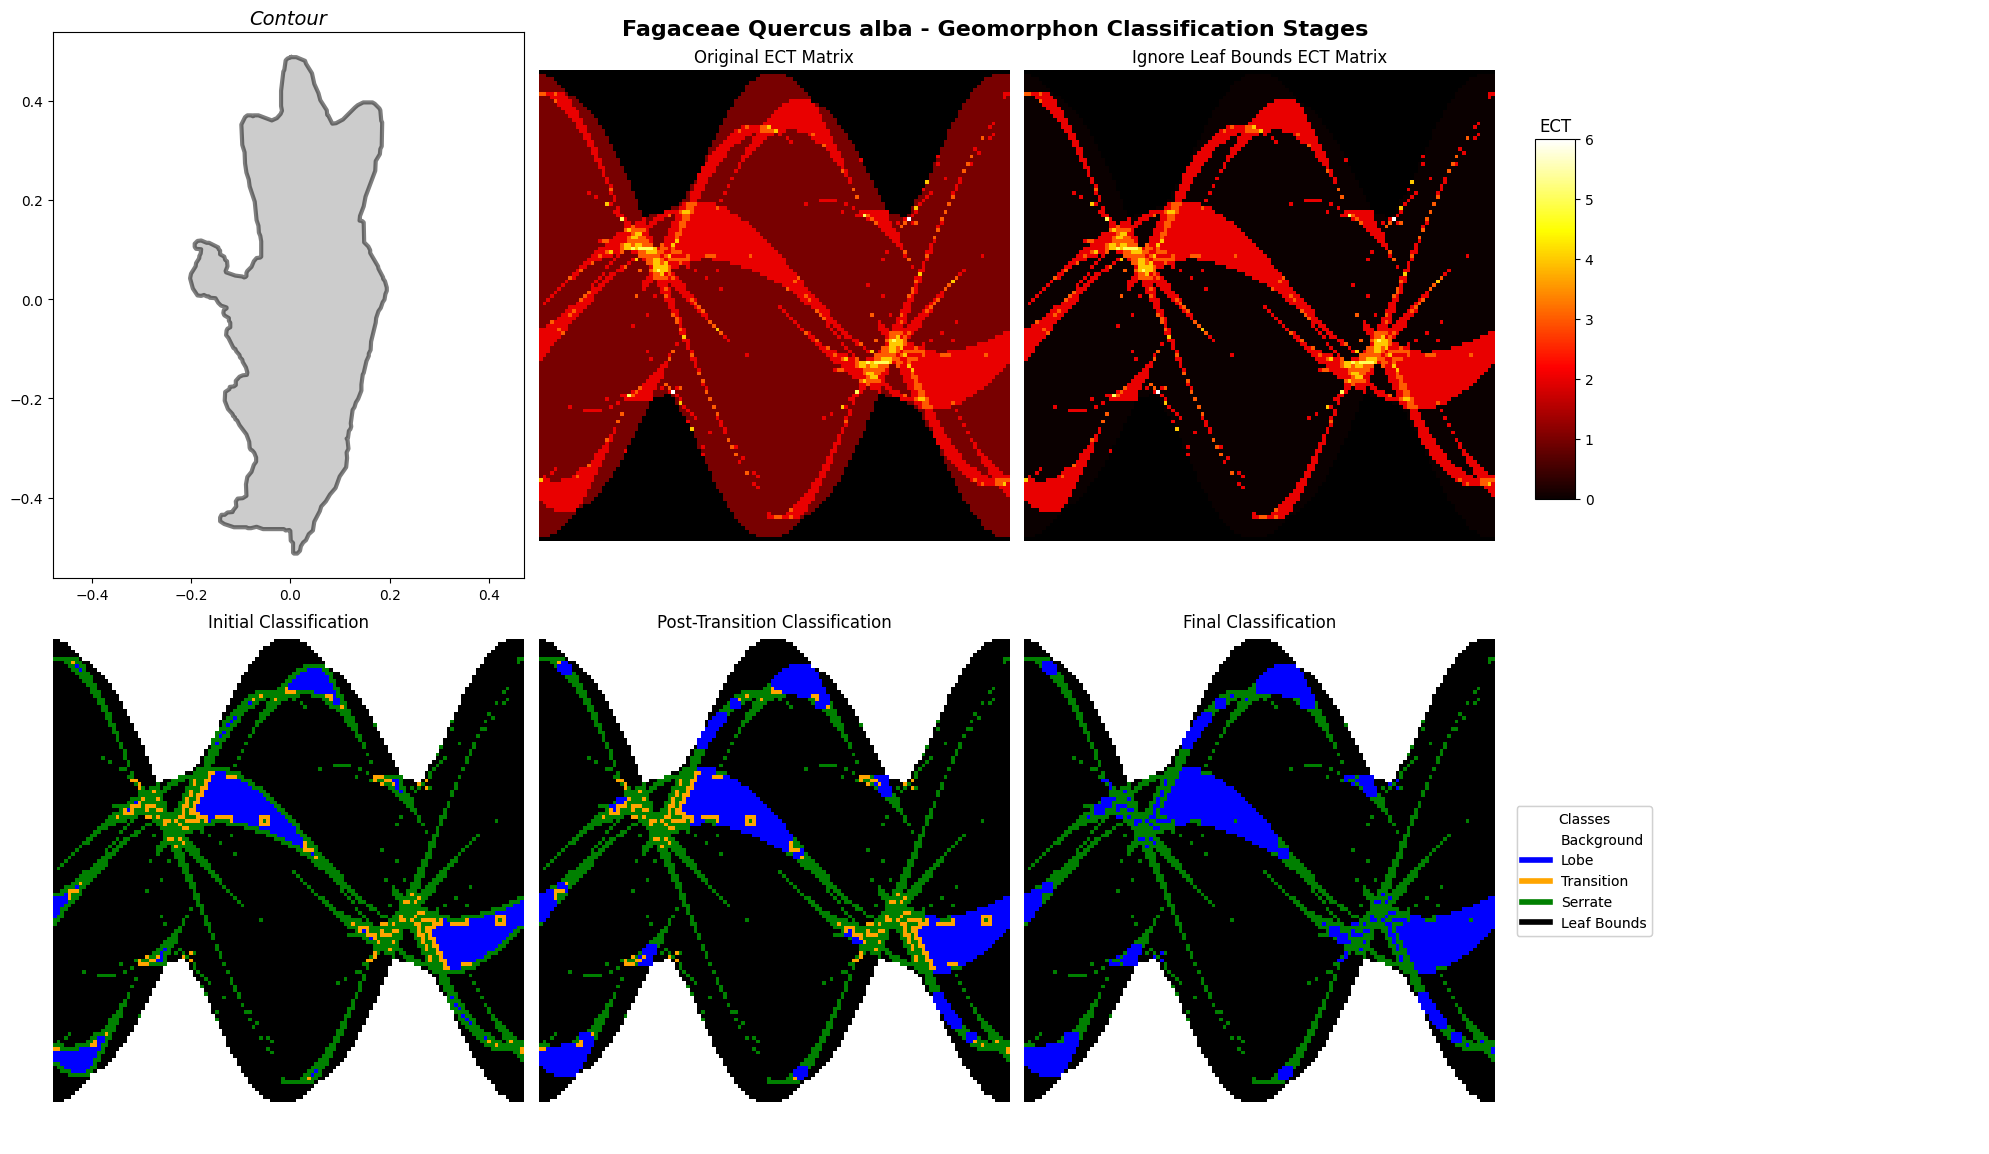

{'background': 13832, 'lobe': 1275, 'transition': 0, 'teeth': 1277, 'n_cells': 16384, 'n_cells_leaf': 11868, 'n_cells_bg': 4516, 'fraction_teeth': 0.10760026963262555, 'fraction_lobe': 0.10743174924165824, 'fraction_flat': 0.7849679811257162, 'thresholded_matrix': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'initial_classes': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'post_transition_classes': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'final_classes': array([[0, 0, 0, .

/home/brlab/Dropbox/LeafMachine2/leafmachine2/ect_methods/utils_metrics.py:1194: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


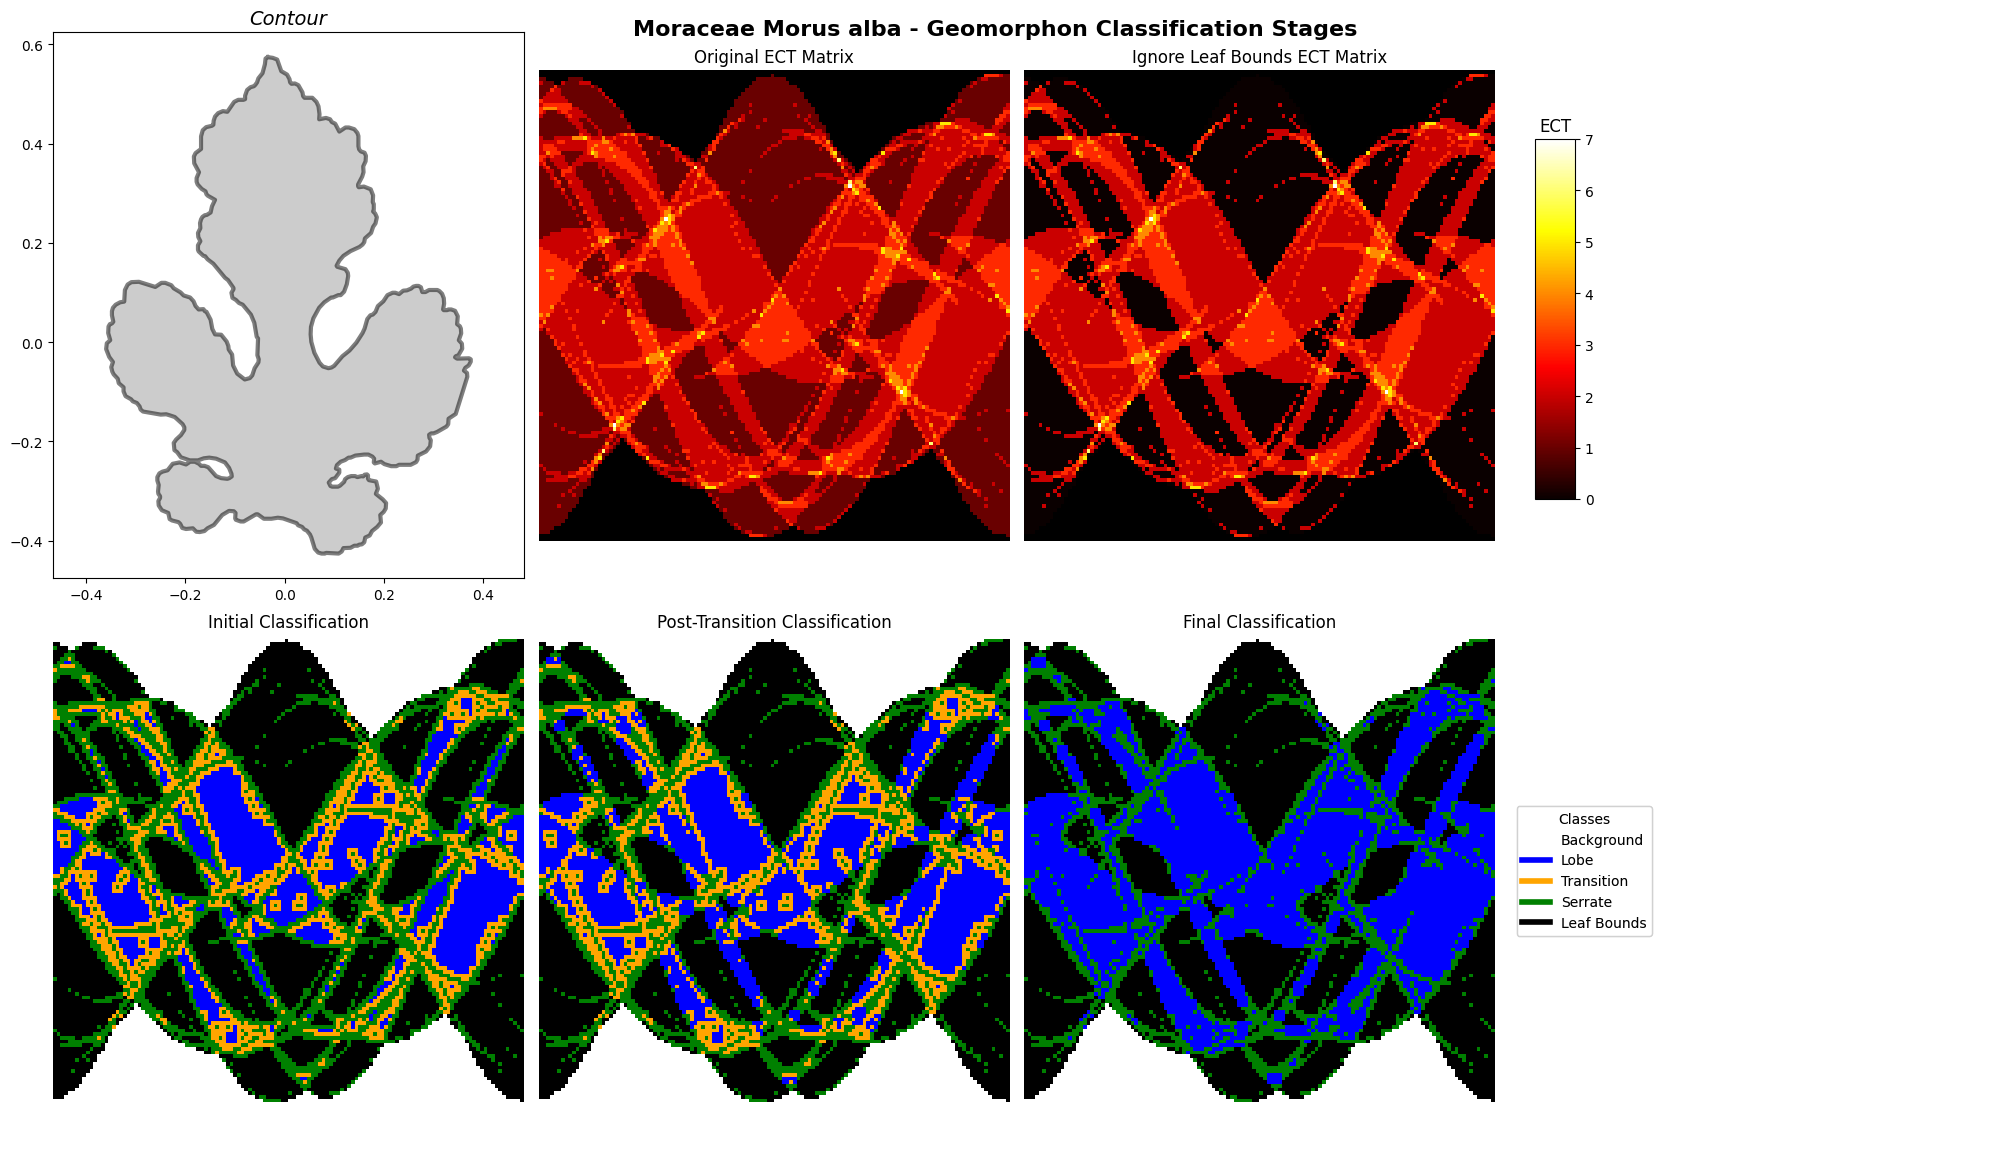

{'background': 8716, 'lobe': 5063, 'transition': 0, 'teeth': 2605, 'n_cells': 16384, 'n_cells_leaf': 13394, 'n_cells_bg': 2990, 'fraction_teeth': 0.1944900701806779, 'fraction_lobe': 0.37800507690010454, 'fraction_flat': 0.4275048529192176, 'thresholded_matrix': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 2., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'initial_classes': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 3, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'post_transition_classes': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 3, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'final_classes': array([[0, 0, 0, ...

In [216]:
importlib.reload(utils_metrics)
from utils_metrics import calculate_ddr, exponential_decay, calculate_max_steps_to_zero, calculate_transition_stat, visualize_geomorphon_stages, analyze_connected_components, plot_connected_components, define_leaf_bounds, visualize_wavelet, visualize_geomorphon, classify_geomorphon, analyze_wavelet, visualize_spectral_analysis, analyze_terrain_spectral, calculate_ripleys_g, calculate_global_morans_i_filtered, calculate_global_morans_i, calculate_terrain_ruggedness_index, visualize_region, calculate_flow_accumulation, calculate_watershed, calculate_slope
importlib.reload(utils_metrics)
importlib.reload(matplotlib)
%matplotlib inline

def add_to_track(category, name, spectral_summary, serrate_percent, lobe_percent, flat_percent, transition_stat, 
                 
                 n_cells, n_cells_leaf):
    """
    Add a metric result to the track dictionary under the specified category.

    Args:
        category (str): The category name.
        name (str): The name of the metric.
        spectral_summary (float): The computed spectral summary.
    """
    if category not in track:
        track[category] = []
    track[category].append((name, spectral_summary, serrate_percent, lobe_percent, flat_percent, transition_stat, n_cells, n_cells_leaf))



k=8

k_lobes = 24
threshold_lobes=2

k_serration = 8
threshold_serration=2

threshold_g=2
threshold_terrain=0

def run_metric_test(name):
    print(f"\n{name}")
    name_parts = name.split("__")
    name_parts = name_parts[0]
    name_use = " ".join(name_parts.split("_")[2:5])
    print(f"\n{name_use}")

    

    ECT_matrix, simplified_contour = leaf_ect.compute_ect_for_contour(name, is_DP='DP')

    # plot_leaf_data(leaf_data=simplified_contour, ect_matrix=ECT_matrix, title='')
    morans_i = calculate_global_morans_i(ECT_matrix, k)
    morans_ifl = calculate_global_morans_i_filtered(ECT_matrix, k_lobes, threshold_lobes)
    morans_ifs = calculate_global_morans_i_filtered(ECT_matrix, k_serration, threshold_serration)
    distance_range = np.linspace(1, 3, 3)
    ripleys_g = calculate_ripleys_g(ECT_matrix, distance_range, threshold=threshold_g, num_simulations=99)
    spectral = analyze_terrain_spectral(ECT_matrix, threshold=threshold_terrain)
    # visualize_spectral_analysis(ECT_matrix, spectral["magnitude_spectrum"], threshold=threshold_terrain)

    large_features, small_features = analyze_wavelet(ECT_matrix, large_scale=8, small_scale=2, threshold=2)
    # visualize_wavelet(ECT_matrix, large_features, small_features, threshold=2)

    geom_classes, geom_classes_summary = classify_geomorphon(ECT_matrix, search_distance=1, flatness_threshold=1, threshold=2, do_visualize=True)
    visualize_geomorphon_stages(ECT_matrix, geom_classes_summary, do_visualize=True, path_geomorphon=None, name=name_use, leaf_data=simplified_contour, dpi=600)
    
    print(geom_classes_summary)
    serrate_percent = geom_classes_summary["fraction_teeth"]
    lobe_percent = geom_classes_summary["fraction_lobe"]
    flat_percent = geom_classes_summary["fraction_flat"]

    components_info = analyze_connected_components(ECT_matrix, threshold=2)
    # plot_connected_components(components_info)
    

    ECT_Density = np.sum(ECT_matrix) / (n_cells)
    ECT_Density_thresh2 = np.sum(np.where(ECT_matrix >= 2, ECT_matrix, 0)) / (n_cells)
    ECT_Density_thresh2leaf = np.sum(np.where(ECT_matrix >= 2, ECT_matrix, 0)) / (n_cells_leaf)

    print("\nECT_Density:", ECT_Density)
    print("ECT_Density_thresh2:", ECT_Density_thresh2)
    print("ECT_Density_thresh2:", ECT_Density_thresh2leaf)


    # transition_stat = calculate_transition_stat(ECT_matrix, threshold=2)
    # print("\ntransition_stat:", transition_stat)

    transition_stat = calculate_max_steps_to_zero(ECT_matrix, threshold=3)
    print("\ntransition_stat:", transition_stat)


    
    # print("Large Scale Features:", large_features)
    # print("Small Scale Features:", small_features)
    # print("geom_classes:", geom_classes)
    # print("\ngeom_classes_summary:", geom_classes_summary)
    print("morans_i", morans_i)
    print("morans_ifl", morans_ifl)
    print("morans_ifs", morans_ifs)
    print("ripleys_g", ripleys_g)
    print(f"spectral {spectral['spectral_summary']}")
    # print("CELLS",n_cells, n_cells_leaf, n_cells_bg)
    # print("CELLS GEO",geom_classes_summary[2], geom_classes_summary[3], geom_classes_summary[1])

    print("flat_percent:", flat_percent)
    print("serrate_percent:", serrate_percent)
    print("lobe_percent:", lobe_percent)
    return name, spectral["spectral_summary"], serrate_percent, lobe_percent, flat_percent, transition_stat, n_cells, n_cells_leaf

track = {}
CATEGORY = "OVATE"
print(f"\n\n{CATEGORY}")
name, spectral_summary, serrate_percent, lobe_percent, flat_percent, transition_stat, n_cells, n_cells_leaf = run_metric_test("ANHC_3435788770_Rosaceae_Prunus_serotina__L__220-1826-887-2379")
add_to_track(CATEGORY, name, spectral_summary, serrate_percent, lobe_percent, flat_percent, transition_stat, n_cells, n_cells_leaf)
name, spectral_summary, serrate_percent, lobe_percent, flat_percent, transition_stat, n_cells, n_cells_leaf = run_metric_test("CM_2859338197_Ericaceae_Rhododendron_maximum__L__1420-2315-2071-3539")
add_to_track(CATEGORY, name, spectral_summary, serrate_percent, lobe_percent, flat_percent, transition_stat, n_cells, n_cells_leaf)
name, spectral_summary, serrate_percent, lobe_percent, flat_percent, transition_stat, n_cells, n_cells_leaf = run_metric_test("Herbarium-of-Andalas-University_2609488125_Cannabaceae_Trema_cannabina__L__1226-1948-1927-2910")
add_to_track(CATEGORY, name, spectral_summary, serrate_percent, lobe_percent, flat_percent, transition_stat, n_cells, n_cells_leaf)
name, spectral_summary, serrate_percent, lobe_percent, flat_percent, transition_stat, n_cells, n_cells_leaf = run_metric_test("CHSC_2418057513_Rosaceae_Prunus_virginiana__L__1101-1570-1884-2532")
add_to_track(CATEGORY, name, spectral_summary, serrate_percent, lobe_percent, flat_percent, transition_stat, n_cells, n_cells_leaf)

CATEGORY = "LOBED"
print(f"\n\n{CATEGORY}")
name, spectral_summary, serrate_percent, lobe_percent, flat_percent, transition_stat, n_cells, n_cells_leaf = run_metric_test("ANHC_3435785516_Altingiaceae_Liquidambar_styraciflua__L__58-860-1139-2069")
add_to_track(CATEGORY, name, spectral_summary, serrate_percent, lobe_percent, flat_percent, transition_stat, n_cells, n_cells_leaf)
name, spectral_summary, serrate_percent, lobe_percent, flat_percent, transition_stat, n_cells, n_cells_leaf = run_metric_test("ASC_3091235085_Fagaceae_Quercus_gambelii__L__2742-2856-3541-3374")
add_to_track(CATEGORY, name, spectral_summary, serrate_percent, lobe_percent, flat_percent, transition_stat, n_cells, n_cells_leaf)
name, spectral_summary, serrate_percent, lobe_percent, flat_percent, transition_stat, n_cells, n_cells_leaf = run_metric_test("MIN_2265384220_Fagaceae_Quercus_macrocarpa__L__1782-2910-2943-3748")
add_to_track(CATEGORY, name, spectral_summary, serrate_percent, lobe_percent, flat_percent, transition_stat, n_cells, n_cells_leaf)


CATEGORY = "SERRATE"
print(f"\n\n{CATEGORY}")
name, spectral_summary, serrate_percent, lobe_percent, flat_percent, transition_stat, n_cells, n_cells_leaf = run_metric_test("NY_1928237093_Moraceae_Morus_alba__L__764-373-1194-1050")
add_to_track(CATEGORY, name, spectral_summary, serrate_percent, lobe_percent, flat_percent, transition_stat, n_cells, n_cells_leaf)
name, spectral_summary, serrate_percent, lobe_percent, flat_percent, transition_stat, n_cells, n_cells_leaf = run_metric_test("UCSC_2459171158_Fagaceae_Notholithocarpus_densiflorus__L__678-3779-1606-4658")
add_to_track(CATEGORY, name, spectral_summary, serrate_percent, lobe_percent, flat_percent, transition_stat, n_cells, n_cells_leaf)
name, spectral_summary, serrate_percent, lobe_percent, flat_percent, transition_stat, n_cells, n_cells_leaf = run_metric_test("SBBG_3395971310_Betulaceae_Alnus_rubra__L__2730-3847-3703-4699")
add_to_track(CATEGORY, name, spectral_summary, serrate_percent, lobe_percent, flat_percent, transition_stat, n_cells, n_cells_leaf)
name, spectral_summary, serrate_percent, lobe_percent, flat_percent, transition_stat, n_cells, n_cells_leaf = run_metric_test("CM_2859401646_Ulmaceae_Ulmus_americana__L__858-3448-1985-4204")
add_to_track(CATEGORY, name, spectral_summary, serrate_percent, lobe_percent, flat_percent, transition_stat, n_cells, n_cells_leaf)

CATEGORY = "SERRATE and LOBED"
print(f"\n\n{CATEGORY}")
name, spectral_summary, serrate_percent, lobe_percent, flat_percent, transition_stat, n_cells, n_cells_leaf = run_metric_test("O_1701925902_Adoxaceae_Viburnum_opulus__L__1708-2702-2521-3622")
add_to_track(CATEGORY, name, spectral_summary, serrate_percent, lobe_percent, flat_percent, transition_stat, n_cells, n_cells_leaf)
name, spectral_summary, serrate_percent, lobe_percent, flat_percent, transition_stat, n_cells, n_cells_leaf = run_metric_test("VT_2573110269_Moraceae_Morus_alba__L__1454-314-2139-1755")
add_to_track(CATEGORY, name, spectral_summary, serrate_percent, lobe_percent, flat_percent, transition_stat, n_cells, n_cells_leaf)
name, spectral_summary, serrate_percent, lobe_percent, flat_percent, transition_stat, n_cells, n_cells_leaf = run_metric_test("NY_1931133270_Fagaceae_Quercus_alba__L__1305-2024-1879-3167")
add_to_track(CATEGORY, name, spectral_summary, serrate_percent, lobe_percent, flat_percent, transition_stat, n_cells, n_cells_leaf)
name, spectral_summary, serrate_percent, lobe_percent, flat_percent, transition_stat, n_cells, n_cells_leaf = run_metric_test("ASC_3091283531_Moraceae_Morus_alba__L__468-2185-1576-4140")
add_to_track(CATEGORY, name, spectral_summary, serrate_percent, lobe_percent, flat_percent, transition_stat, n_cells, n_cells_leaf)


# Calculate TRI
# tri = calculate_terrain_ruggedness_index(ECT_matrix)
# print(f"TRI: {tri}")

# # Visualize the region
# visualize_region(ECT_matrix)

# # Calculate Slope
# slope = calculate_slope(ECT_matrix)
# print(f"slope: {slope}")

# # Calculate Flow Accumulation
# flow_accum = calculate_flow_accumulation(ECT_matrix)
# print(f"slope: {flow_accum}")

# # Calculate Watershed
# watershed = calculate_watershed(ECT_matrix)
# print(f"watershed: {watershed}")

# # Example visualization of results
# visualize_region(tri)

/tmp/ipykernel_9822/188637497.py:39: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


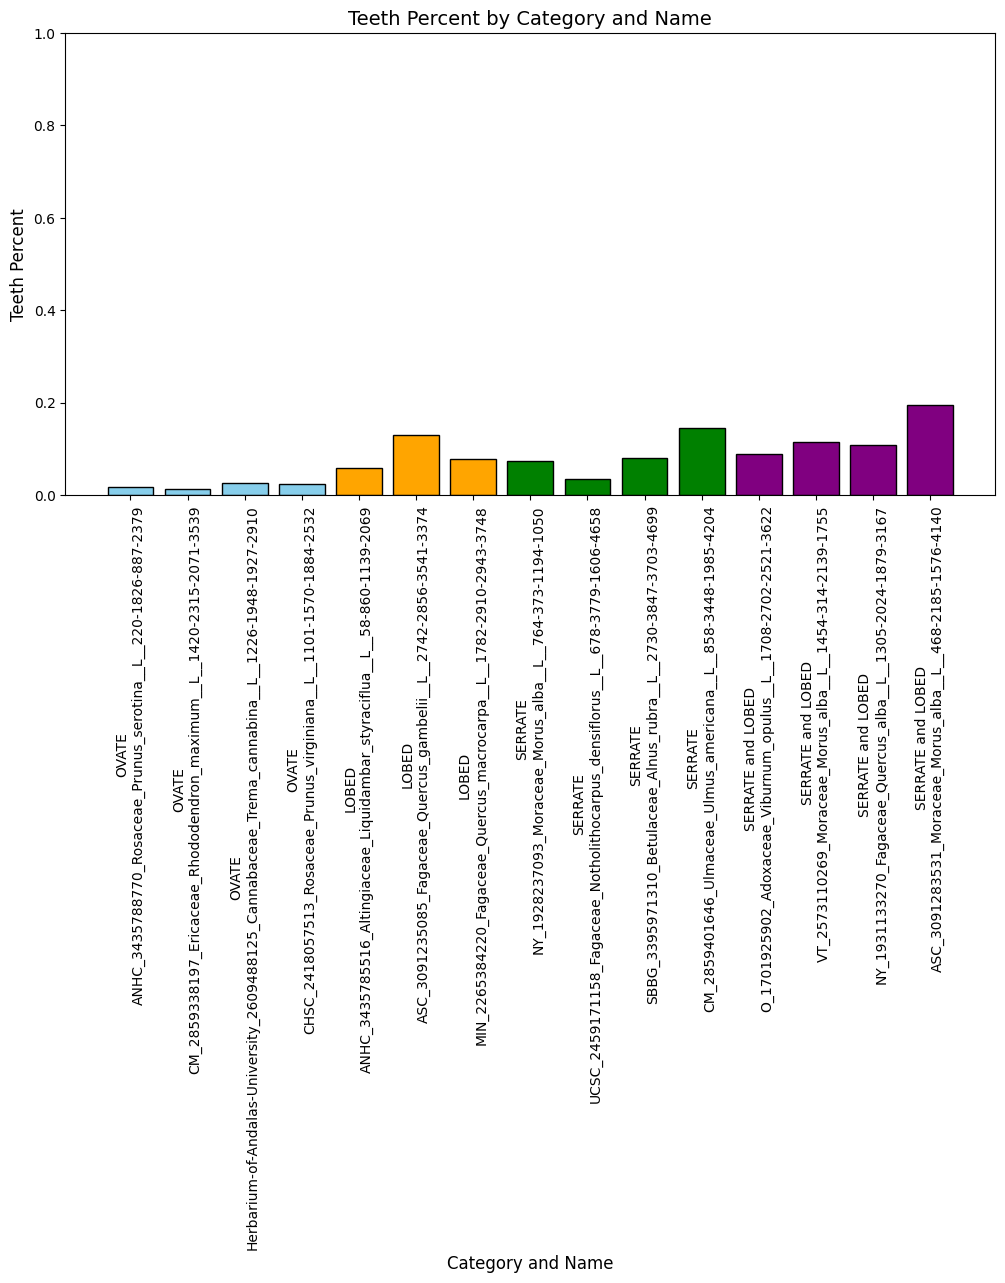

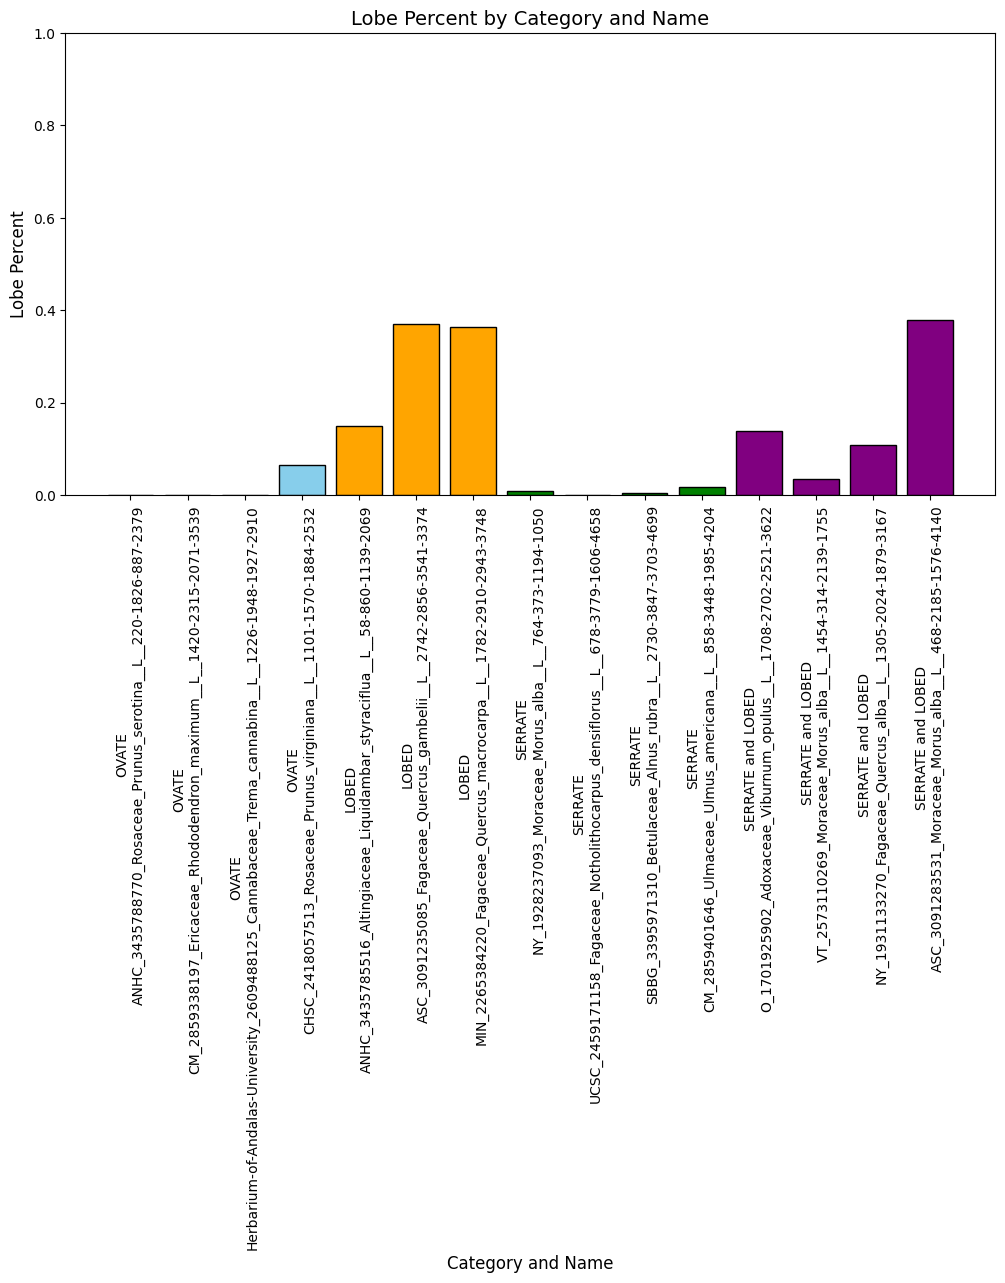

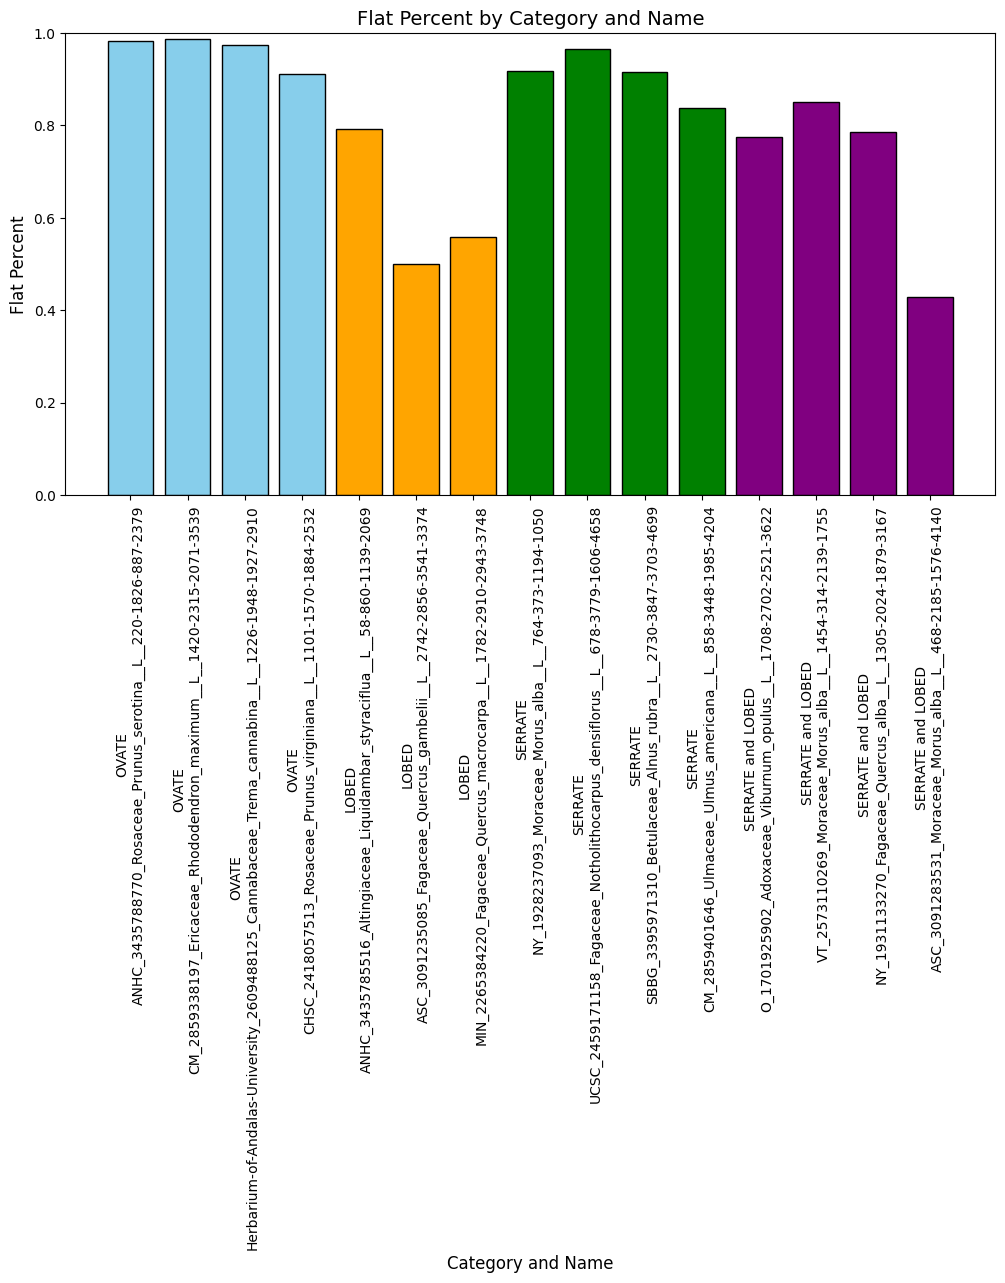

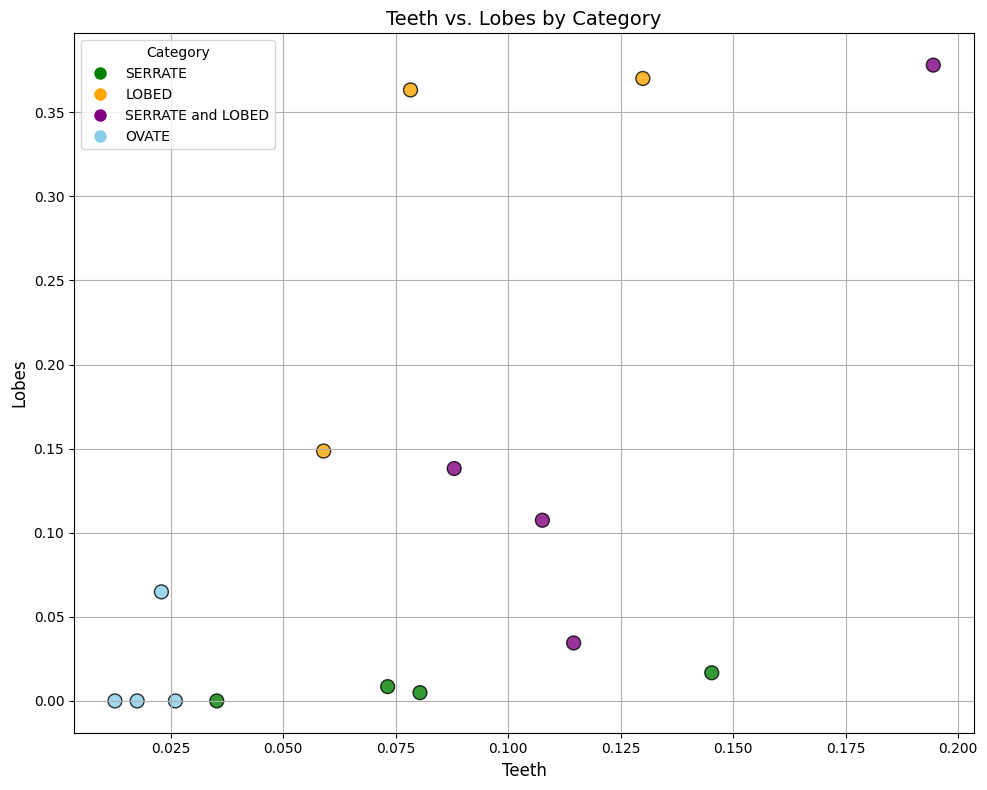

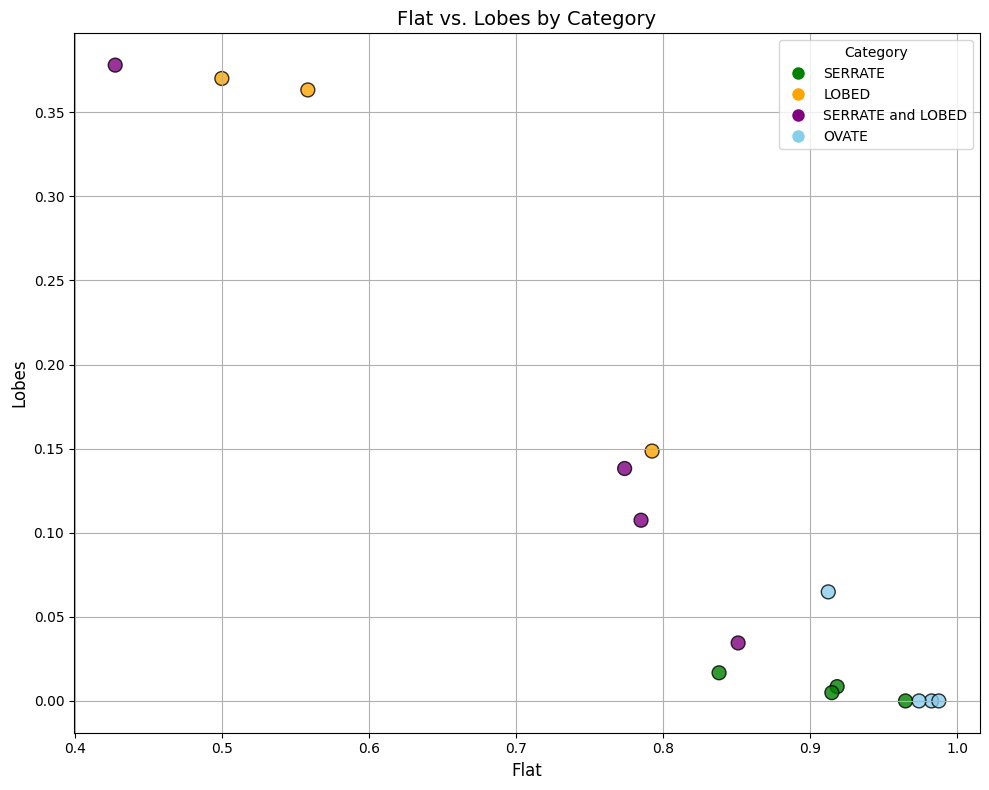

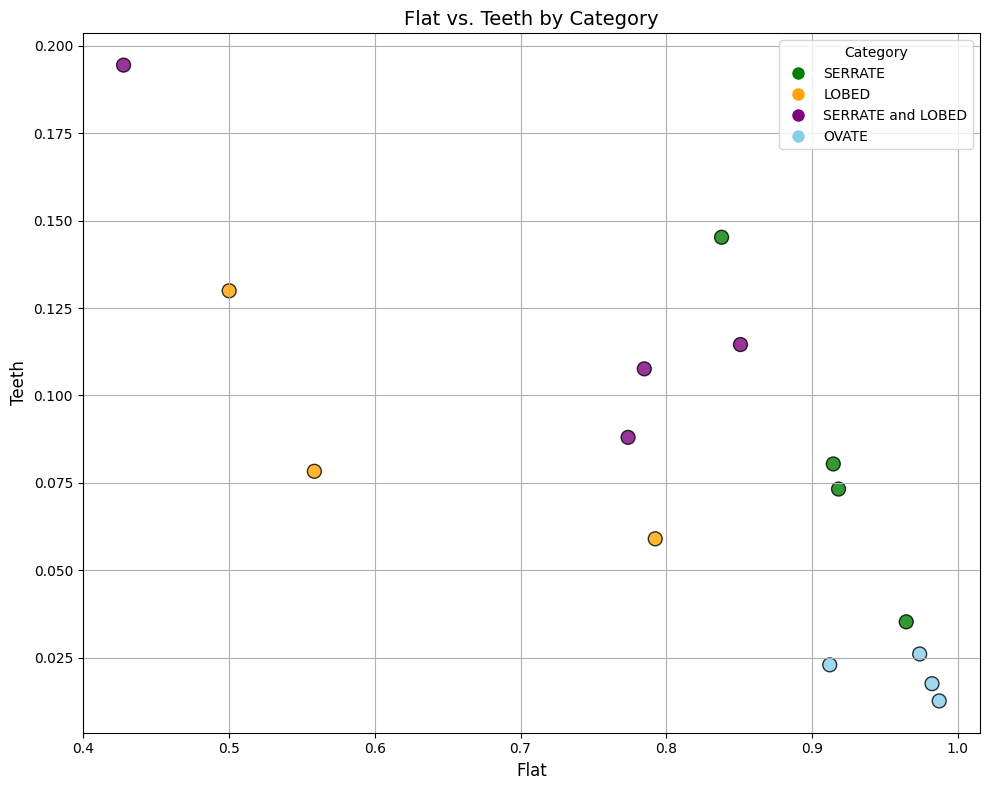

In [212]:
def plot_variable_summary(track, variable_index, y_label, title, ylim=None):
    """
    Create a bar plot summarizing a specific variable grouped by category and name.

    Args:
        track (dict): Dictionary where keys are categories, and values are lists of tuples.
        variable_index (int): Index of the variable in the tuples to plot.
        y_label (str): Label for the y-axis.
        title (str): Title of the plot.
        ylim (tuple, optional): Y-axis limits.
    """
    labels = []
    values = []
    colors = []

    # Define a color palette for categories
    category_colors = {
        "OVATE": "skyblue",
        "LOBED": "orange",
        "SERRATE": "green",
        "SERRATE and LOBED": "purple"
    }

    for category, metrics in track.items():
        for metric in metrics:
            labels.append(f"{category}\n{metric[0]}")  # Combine category and name for x-axis labels
            values.append(metric[variable_index])
            colors.append(category_colors.get(category, "gray"))  # Use gray for unknown categories

    # Create the bar plot
    plt.figure(figsize=(12, 6))
    plt.bar(labels, values, color=colors, edgecolor='black')
    if ylim:
        plt.ylim(ylim)  # Set y-axis limits if provided
    plt.xlabel("Category and Name", fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(title, fontsize=14)
    plt.xticks(rotation=90, fontsize=10, ha='center')  # Rotate labels for better readability
    plt.tight_layout()
    plt.show()


# Generate plots for each variable
# plot_variable_summary(track, 1, "Spectral Summary", "Spectral Summary by Category and Name", ylim=(0.4, 0.5))
plot_variable_summary(track, 2, "Teeth Percent", "Teeth Percent by Category and Name", ylim=[0,1])
plot_variable_summary(track, 3, "Lobe Percent", "Lobe Percent by Category and Name", ylim=[0,1])
plot_variable_summary(track, 4, "Flat Percent", "Flat Percent by Category and Name", ylim=[0,1])
# plot_variable_summary(track, 5, "Transition Stat", "Transition Stat by Category and Name")
# plot_variable_summary(track, 6, "Number of Cells", "Number of Cells by Category and Name")
# plot_variable_summary(track, 7, "Number of Leaf Cells", "Number of Leaf Cells by Category and Name")


def plot_x_vs_y(track, A, B, x_title, y_title):
    """
    Create an x,y scatter plot color-coded by category.

    Args:
        track (dict): Dictionary where keys are categories, and values are lists of tuples.
    """
    x = []  # Serrate Percent
    y = []  # Lobe Percent
    colors = []
    labels = []

    # Define a color palette for categories
    category_colors = {
        "OVATE": "skyblue",
        "LOBED": "orange",
        "SERRATE": "green",
        "SERRATE and LOBED": "purple"
    }

    for category, metrics in track.items():
        for metric in metrics:
            serrate_percent = metric[A]  # Serrate Percent (index 2)
            lobe_percent = metric[B]    # Lobe Percent (index 3)
            x.append(serrate_percent)
            y.append(lobe_percent)
            colors.append(category_colors.get(category, "gray"))  # Use gray for unknown categories
            labels.append(category)

    # Create scatter plot
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(x, y, c=colors, edgecolor='black', s=100, alpha=0.8)

    # Add labels and title
    plt.xlabel(x_title, fontsize=12)
    plt.ylabel(y_title, fontsize=12)
    plt.title(f"{x_title} vs. {y_title} by Category", fontsize=14)
    plt.grid(True)

    # Add legend
    legend_categories = list(set(labels))
    legend_colors = [category_colors.get(cat, "gray") for cat in legend_categories]
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) 
                      for color in legend_colors]
    plt.legend(legend_handles, legend_categories, title="Category", loc="best", fontsize=10)

    plt.tight_layout()
    plt.show()

plot_x_vs_y(track, 2, 3, "Teeth", "Lobes")
plot_x_vs_y(track, 4, 3, "Flat", "Lobes")
plot_x_vs_y(track, 4, 2, "Flat", "Teeth")




In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from utils_metrics import calculate_ddr, exponential_decay
from utils_PHATE import load_from_hdf5

def test_ddr(directory):

    """
    Process all HDF5 files in a given directory and print the file name
    followed by the decay rate score calculated using the first ECT matrix.

    Parameters:
        directory (str): Path to the directory containing HDF5 files.
    """
    for filename in os.listdir(directory):
        if filename.endswith('.h5'):
            file_path = os.path.join(directory, filename)
            try:
                # Load data using the provided function
                ect_data, group_labels, shapes, component_names = load_from_hdf5(file_path)
                # Use the first ECT matrix to calculate the decay rate
                ddr_score = calculate_ddr(ect_data[0])
                # Print the result
                if ddr_score > 0:
                    ddr_score = calculate_ddr(ect_data[0])
                    print(f"{filename}: {ddr_score}")
            except Exception as e:
                print(f"Error processing {filename}: {e}")




def plot_multiple_ddr(directory):
    """
    Process all HDF5 files in a given directory, calculate DDR, and plot
    the fitted curves for positive DDR values and a subset of negative DDR values.
    Parameters:
        directory (str): Path to the directory containing HDF5 files.
    """
    plt.figure(figsize=(12, 8))
    negative_ddr_count = 0
    max_negative_curves = 10

    for filename in os.listdir(directory):
        if filename.endswith('.h5'):
            file_path = os.path.join(directory, filename)
            try:
                # Load data using the provided function
                ect_data, group_labels, shapes, component_names = load_from_hdf5(file_path)

                # Use the first ECT matrix to calculate the decay rate
                ddr_score = calculate_ddr(ect_data[0])

                # Only plot if DDR is valid
                if not np.isnan(ddr_score):
                    # Prepare data for plotting
                    unique_values = np.unique(ect_data[0][ect_data[0] > 0])[::-1]  # Descending order
                    densities = [np.sum(ect_data[0] == value) / ect_data[0].size for value in unique_values]
                    levels = np.arange(len(densities))
                    fitted_curve = exponential_decay(levels, 1, ddr_score)

                    # Plot positive DDR values or up to 10 negative DDR values
                    if ddr_score > 0 or (ddr_score < 0 and negative_ddr_count < max_negative_curves):
                        plt.scatter(levels, densities, label=f"Observed ({filename})", alpha=0.6)
                        plt.plot(levels, fitted_curve, label=f"Fitted (b={ddr_score:.2f}, {filename})", alpha=0.8)
                        
                        if ddr_score < 0:
                            negative_ddr_count += 1

            except Exception as e:
                print(f"Error processing {filename}: {e}")

    # Finalize the plot
    if negative_ddr_count > 0:
        plt.xlabel("Levels")
        plt.ylabel("Density")
        plt.title("Fitted Exponential Decay Curves: Positive and Selected Negative DDR Values")
        plt.legend(loc="best", fontsize="small")
        plt.grid(True)
        plt.show()
    else:
        print("No valid matrices to plot.")

directory_path = '/media/nas/GBIF_Downloads/Magnoliales/Eupomatiaceae/LM2/Data/Measurements/ECT'
plot_multiple_ddr(directory_path)

/tmp/ipykernel_75098/320100938.py:81: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [2]:
# Compute ECTs
input_dirs = ['C:/Users/Will/Downloads/GBIF_DetailedSample_50Spp/LM2_2024_09_18__07-52-47']

In [ ]:
store_ect_data(input_dirs, num_dirs=128, num_thresh=128)

# This is testing the simple metrics that we can run on the whole dataset, matrix mean/shape description

### Load the ECTs first

In [3]:
ECT_dim = 128
dir_path = input_dirs[0] # Instead of loop


family_name = os.path.basename(os.path.dirname(dir_path))
family_ECT_path = os.path.join(dir_path, 'Data', 'Measurements', f'{family_name}_combined_ECT.h5')

if "LM2_" in family_name:
    family_name = os.path.basename(os.path.dirname(os.path.dirname(dir_path)))
    family_1 = os.path.join(os.path.dirname(os.path.dirname(dir_path)), 'LM2_1', 'LM2')  # Store all data in LM2_1
    family_ECT_path = os.path.join(family_1, 'Data', 'Measurements', f'{family_name}_combined_ECT.h5')


# run_PHATE_on_everything_h5(family_ECT_path,
#                     bin_by_class="fullname")
# run_PHATE_on_everything_h5(dir_path,family_ECT_path,
#         bin_by_class="genus")
do_compute_UMAP = True
do_compute_PHATE = False

# Extract the parent directory of the h5 file path
save_path = os.path.join(os.path.dirname(family_ECT_path), 'PHATE')

save_path_PHATE_scores_2D = os.path.join(save_path, 'PHATE_scores_2D.npz')
save_path_PHATE_scores_3D = os.path.join(save_path, 'PHATE_scores_3D.npz')
save_path_PHATE_3D_heatmaps = os.path.join(save_path, 'PHATE_3D_heatmaps')

save_path_UMAP_scores_2D = os.path.join(save_path, "UMAP_2D.npz")
save_path_UMAP_scores_3D = os.path.join(save_path, "UMAP_3D.npz")
save_path_UMAP_3D_heatmaps = os.path.join(save_path, 'UMAP_3D_heatmaps')

os.makedirs(save_path, exist_ok=True)
os.makedirs(save_path_PHATE_3D_heatmaps, exist_ok=True)
os.makedirs(save_path_UMAP_3D_heatmaps, exist_ok=True)

ect_data, group_labels, shapes, component_names = load_direct(dir_path)

labels_fullname = [ast.literal_eval(g)['fullname'] for g in group_labels]
labels_genus = [ast.literal_eval(g)['genus'] for g in group_labels]
labels_family = [ast.literal_eval(g)['family'] for g in group_labels]

overall_family = ast.literal_eval(group_labels[0])['family']

matrix_means = [np.sum(matrix) / (ECT_dim * ECT_dim) for matrix in ect_data]


Processing HDF5 files in C:/Users/Will/Downloads/GBIF_DetailedSample_50Spp/LM2_2024_09_18__07-52-47\Data\Measurements\ECT: 100%|██████████| 25564/25564 [03:12<00:00, 133.02it/s]


In [82]:
import plotly.graph_objects as go
import numpy as np
from urllib.request import urlopen
import json
from shapely.geometry import shape, Point, LineString

x_dim = 50
y_dim = 50
# Get the county boundary GeoJSON from a public source
geojson_url = "https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json"
with urlopen(geojson_url) as response:
    counties = json.load(response)

# Washtenaw County FIPS code
washtenaw_fips = '26161'

# Extract Washtenaw County's geometry from the GeoJSON
washtenaw_geometry = [
    feature["geometry"] for feature in counties["features"] if feature["id"] == washtenaw_fips
][0]
washtenaw_polygon = shape(washtenaw_geometry)

# Identify neighboring counties
neighboring_counties = []
for feature in counties["features"]:
    county_fips = feature["id"]
    if county_fips == washtenaw_fips:
        continue
    county_geometry = shape(feature["geometry"])
    if washtenaw_polygon.touches(county_geometry):
        neighboring_counties.append((county_fips, county_geometry))

# Generate fractal meandering river paths
def generate_river_path(start_point, end_point, iterations=5, variation_scale=0.01):
    points = [np.array(start_point), np.array(end_point)]
    for _ in range(iterations):
        new_points = []
        for i in range(len(points) - 1):
            new_points.append(points[i])
            midpoint = (points[i] + points[i + 1]) / 2
            displacement = np.array([
                np.random.uniform(-variation_scale, variation_scale),
                np.random.uniform(-variation_scale, variation_scale)
            ])
            new_points.append(midpoint + displacement)
        new_points.append(points[-1])
        points = new_points
    return points

# Define start and end points for the main river
# start_point = (washtenaw_polygon.bounds[0], (washtenaw_polygon.bounds[1] + washtenaw_polygon.bounds[3]) / 2)
start_point = (washtenaw_polygon.bounds[0], washtenaw_polygon.bounds[3])
end_point = (washtenaw_polygon.bounds[2], (washtenaw_polygon.bounds[1] + washtenaw_polygon.bounds[3]) / 2)

# Generate the main river path
main_river_path = generate_river_path(start_point, end_point, iterations=6, variation_scale=0.05)
main_river_line = LineString(main_river_path)

# Generate tributaries
tributaries = []
num_tributaries = 1
for _ in range(num_tributaries):
    connection_idx = np.random.randint(1, len(main_river_path) - 1)
    connection_point = main_river_path[connection_idx]
    tributary_start = (
        connection_point[0] - np.random.uniform(0.1, 0.8),
        connection_point[1] + np.random.uniform(0.1, 0.8)
    )
    tributary_path = generate_river_path(tributary_start, connection_point, iterations=4, variation_scale=0.03)
    tributary_line = LineString(tributary_path)
    if not tributary_line.intersects(main_river_line):
        tributaries.append(tributary_path)

# Combine all river paths into a single LineString for distance calculations
all_river_paths = [main_river_path] + tributaries
all_river_lines = LineString([pt for path in all_river_paths for pt in path])

# Create a grid for the heatmap
grid_x, grid_y = np.meshgrid(
    np.linspace(washtenaw_polygon.bounds[0], washtenaw_polygon.bounds[2], x_dim),
    np.linspace(washtenaw_polygon.bounds[1], washtenaw_polygon.bounds[3], y_dim),
)
grid_points = np.array([Point(x, y) for x, y in zip(grid_x.flatten(), grid_y.flatten())])

# Calculate heatmap intensity based on proximity to the river
distances = np.array([all_river_lines.distance(pt) for pt in grid_points])
intensity = 1 / (distances + 0.01)  # Higher intensity for closer distances
intensity = intensity.reshape(grid_x.shape)

# Add random jitter (30%)
jitter = np.random.uniform(0.9, 2, size=intensity.shape)
intensity = intensity * jitter

# Mask points outside Washtenaw County
mask = np.array([washtenaw_polygon.contains(pt) for pt in grid_points])
intensity = np.where(mask.reshape(grid_x.shape), intensity, np.nan)

# Normalize intensity to [0, 1]
intensity = (intensity - np.nanmin(intensity)) / (np.nanmax(intensity) - np.nanmin(intensity))

# Create the figure
fig = go.Figure()

# Add heatmap
fig.add_trace(
    go.Heatmap(
        z=intensity,
        x=np.linspace(washtenaw_polygon.bounds[0], washtenaw_polygon.bounds[2], x_dim),
        y=np.linspace(washtenaw_polygon.bounds[1], washtenaw_polygon.bounds[3], y_dim),
        colorscale='Greens',
        colorbar=dict(title="Proximity Intensity"),
        opacity=0.8
    )
)

# Add Washtenaw County outline
fig.add_trace(
    go.Scatter(
        x=[pt[0] for pt in washtenaw_polygon.exterior.coords],
        y=[pt[1] for pt in washtenaw_polygon.exterior.coords],
        mode='lines',
        line=dict(color='black', width=2),
        name='Washtenaw County Outline'
    )
)

# Add neighboring county outlines
for fips, neighbor_polygon in neighboring_counties:
    fig.add_trace(
        go.Scatter(
            x=[pt[0] for pt in neighbor_polygon.exterior.coords],
            y=[pt[1] for pt in neighbor_polygon.exterior.coords],
            mode='lines',
            line=dict(color='gray', width=1),
            name=f'Neighbor County {fips}'
        )
    )
longitude_min = washtenaw_polygon.bounds[0] + 0.05  # Slightly east of the western boundary
longitude_max = washtenaw_polygon.bounds[2] - 0.05  # Slightly west of the eastern boundary
print(longitude_min, longitude_max)
# Update layout
fig.update_layout(
    title="Heatmap Based on Proximity to Rivers in Washtenaw County with Neighboring County Outlines",
    xaxis=dict(
        range=[longitude_min, longitude_max],  # Force longitude range
        scaleanchor="y",  # Maintain aspect ratio
        showgrid=False
    ),
    yaxis=dict(showgrid=False),  # Keep latitude configuration unchanged
    showlegend=True
)

# Show the plot
fig.show()


-84.081963 -83.589396


In [ ]:
import plotly.graph_objects as go
import numpy as np
from urllib.request import urlopen
import json
from shapely.geometry import shape, Point, LineString

x_dim = 50
y_dim = 50
# Get the county boundary GeoJSON from a public source
geojson_url = "https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json"
with urlopen(geojson_url) as response:
    counties = json.load(response)

# Washtenaw County FIPS code
washtenaw_fips = '26161'

# Extract Washtenaw County's geometry from the GeoJSON
washtenaw_geometry = [
    feature["geometry"] for feature in counties["features"] if feature["id"] == washtenaw_fips
][0]
washtenaw_polygon = shape(washtenaw_geometry)

# Identify neighboring counties
neighboring_counties = []
for feature in counties["features"]:
    county_fips = feature["id"]
    if county_fips == washtenaw_fips:
        continue
    county_geometry = shape(feature["geometry"])
    if washtenaw_polygon.touches(county_geometry):
        neighboring_counties.append((county_fips, county_geometry))

# Generate fractal meandering river paths
def generate_river_path(start_point, end_point, iterations=5, variation_scale=0.01):
    points = [np.array(start_point), np.array(end_point)]
    for _ in range(iterations):
        new_points = []
        for i in range(len(points) - 1):
            new_points.append(points[i])
            midpoint = (points[i] + points[i + 1]) / 2
            displacement = np.array([
                np.random.uniform(-variation_scale, variation_scale),
                np.random.uniform(-variation_scale, variation_scale)
            ])
            new_points.append(midpoint + displacement)
        new_points.append(points[-1])
        points = new_points
    return points

# Define start and end points for the main river
# start_point = (washtenaw_polygon.bounds[0], (washtenaw_polygon.bounds[1] + washtenaw_polygon.bounds[3]) / 2)
start_point = (washtenaw_polygon.bounds[0], washtenaw_polygon.bounds[3])
end_point = (washtenaw_polygon.bounds[2], (washtenaw_polygon.bounds[1] + washtenaw_polygon.bounds[3]) / 2)

# Generate the main river path
main_river_path = generate_river_path(start_point, end_point, iterations=6, variation_scale=0.05)
main_river_line = LineString(main_river_path)

# Generate tributaries
tributaries = []
num_tributaries = 1
for _ in range(num_tributaries):
    connection_idx = np.random.randint(1, len(main_river_path) - 1)
    connection_point = main_river_path[connection_idx]
    tributary_start = (
        connection_point[0] - np.random.uniform(0.1, 0.8),
        connection_point[1] + np.random.uniform(0.1, 0.8)
    )
    tributary_path = generate_river_path(tributary_start, connection_point, iterations=4, variation_scale=0.03)
    tributary_line = LineString(tributary_path)
    if not tributary_line.intersects(main_river_line):
        tributaries.append(tributary_path)

# Combine all river paths into a single LineString for distance calculations
all_river_paths = [main_river_path] + tributaries
all_river_lines = LineString([pt for path in all_river_paths for pt in path])

# Create a grid for the heatmap
grid_x, grid_y = np.meshgrid(
    np.linspace(washtenaw_polygon.bounds[0], washtenaw_polygon.bounds[2], x_dim),
    np.linspace(washtenaw_polygon.bounds[1], washtenaw_polygon.bounds[3], y_dim),
)
grid_points = np.array([Point(x, y) for x, y in zip(grid_x.flatten(), grid_y.flatten())])

# Calculate heatmap intensity based on proximity to the river
distances = np.array([all_river_lines.distance(pt) for pt in grid_points])
intensity = 1 / (distances + 0.01)  # Higher intensity for closer distances
intensity = intensity.reshape(grid_x.shape)

# Add random jitter (30%)
jitter = np.random.uniform(0.9, 2, size=intensity.shape)
intensity = intensity * jitter

# Mask points outside Washtenaw County
mask = np.array([washtenaw_polygon.contains(pt) for pt in grid_points])
intensity = np.where(mask.reshape(grid_x.shape), intensity, np.nan)

# Normalize intensity to [0, 1]
intensity = (intensity - np.nanmin(intensity)) / (np.nanmax(intensity) - np.nanmin(intensity))

# Create the figure
fig = go.Figure()

# Add heatmap
fig.add_trace(
    go.Heatmap(
        z=intensity,
        x=np.linspace(washtenaw_polygon.bounds[0], washtenaw_polygon.bounds[2], x_dim),
        y=np.linspace(washtenaw_polygon.bounds[1], washtenaw_polygon.bounds[3], y_dim),
        colorscale='Greens',
        colorbar=dict(title="Proximity Intensity"),
        opacity=0.8
    )
)

# Add Washtenaw County outline
fig.add_trace(
    go.Scatter(
        x=[pt[0] for pt in washtenaw_polygon.exterior.coords],
        y=[pt[1] for pt in washtenaw_polygon.exterior.coords],
        mode='lines',
        line=dict(color='black', width=2),
        name='Washtenaw County Outline'
    )
)

# Add neighboring county outlines
for fips, neighbor_polygon in neighboring_counties:
    fig.add_trace(
        go.Scatter(
            x=[pt[0] for pt in neighbor_polygon.exterior.coords],
            y=[pt[1] for pt in neighbor_polygon.exterior.coords],
            mode='lines',
            line=dict(color='gray', width=1),
            name=f'Neighbor County {fips}'
        )
    )

# Update layout
fig.update_layout(
    title="Heatmap Based on Proximity to Rivers in Washtenaw County with Neighboring County Outlines",
    xaxis_title="Longitude",
    yaxis_title="Latitude",
    # xaxis=dict(scaleanchor="y", showgrid=False),
    yaxis=dict(showgrid=False),
    showlegend=True
)

# Show the plot
fig.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np
from urllib.request import urlopen
import json
from shapely.geometry import shape, Point, LineString

x_dim = 50
y_dim = 50
# Get the county boundary GeoJSON from a public source
geojson_url = "https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json"
with urlopen(geojson_url) as response:
    counties = json.load(response)

# Washtenaw County FIPS code
washtenaw_fips = '26161'

# Extract Washtenaw County's geometry from the GeoJSON
washtenaw_geometry = [
    feature["geometry"] for feature in counties["features"] if feature["id"] == washtenaw_fips
][0]
washtenaw_polygon = shape(washtenaw_geometry)

# Identify neighboring counties
neighboring_counties = []
for feature in counties["features"]:
    county_fips = feature["id"]
    if county_fips == washtenaw_fips:
        continue
    county_geometry = shape(feature["geometry"])
    if washtenaw_polygon.touches(county_geometry):
        neighboring_counties.append((county_fips, county_geometry))

# Generate fractal meandering river paths
def generate_river_path(start_point, end_point, iterations=5, variation_scale=0.01):
    points = [np.array(start_point), np.array(end_point)]
    for _ in range(iterations):
        new_points = []
        for i in range(len(points) - 1):
            new_points.append(points[i])
            midpoint = (points[i] + points[i + 1]) / 2
            displacement = np.array([
                np.random.uniform(-variation_scale, variation_scale),
                np.random.uniform(-variation_scale, variation_scale)
            ])
            new_points.append(midpoint + displacement)
        new_points.append(points[-1])
        points = new_points
    return points

# Define start and end points for the main river
# start_point = (washtenaw_polygon.bounds[0], (washtenaw_polygon.bounds[1] + washtenaw_polygon.bounds[3]) / 2)
end_point = (washtenaw_polygon.bounds[2], (washtenaw_polygon.bounds[1] + washtenaw_polygon.bounds[3]) / 2)

# Generate the main river path
main_river_path = generate_river_path(start_point, end_point, iterations=6, variation_scale=0.05)
main_river_line = LineString(main_river_path)

# Generate tributaries
tributaries = []
num_tributaries = 1
for _ in range(num_tributaries):
    connection_idx = np.random.randint(1, len(main_river_path) - 1)
    connection_point = main_river_path[connection_idx]
    tributary_start = (
        connection_point[0] - np.random.uniform(0.1, 0.8),
        connection_point[1] + np.random.uniform(0.1, 0.8)
    )
    tributary_path = generate_river_path(tributary_start, connection_point, iterations=4, variation_scale=0.03)
    tributary_line = LineString(tributary_path)
    if not tributary_line.intersects(main_river_line):
        tributaries.append(tributary_path)

# Combine all river paths into a single LineString for distance calculations
all_river_paths = [main_river_path] + tributaries
all_river_lines = LineString([pt for path in all_river_paths for pt in path])

# Create a grid for the heatmap
grid_x, grid_y = np.meshgrid(
    np.linspace(washtenaw_polygon.bounds[0], washtenaw_polygon.bounds[2], x_dim),
    np.linspace(washtenaw_polygon.bounds[1], washtenaw_polygon.bounds[3], y_dim),
)
grid_points = np.array([Point(x, y) for x, y in zip(grid_x.flatten(), grid_y.flatten())])

# Calculate heatmap intensity based on proximity to the river
distances = np.array([all_river_lines.distance(pt) for pt in grid_points])
intensity = 1 / (distances + 0.01)  # Higher intensity for closer distances
intensity = intensity.reshape(grid_x.shape)

# Add random jitter (30%)
jitter = np.random.uniform(0.9, 2, size=intensity.shape)
intensity = intensity * jitter

# Mask points outside Washtenaw County
mask = np.array([washtenaw_polygon.contains(pt) for pt in grid_points])
intensity = np.where(mask.reshape(grid_x.shape), intensity, np.nan)

# Normalize intensity to [0, 1]
intensity = (intensity - np.nanmin(intensity)) / (np.nanmax(intensity) - np.nanmin(intensity))

# Create the figure
fig = go.Figure()

# Add heatmap
fig.add_trace(
    go.Heatmap(
        z=intensity,
        x=np.linspace(washtenaw_polygon.bounds[0], washtenaw_polygon.bounds[2], x_dim),
        y=np.linspace(washtenaw_polygon.bounds[1], washtenaw_polygon.bounds[3], y_dim),
        colorscale='Greens',
        colorbar=dict(title="Proximity Intensity"),
        opacity=0.8
    )
)

# Add Washtenaw County outline
fig.add_trace(
    go.Scatter(
        x=[pt[0] for pt in washtenaw_polygon.exterior.coords],
        y=[pt[1] for pt in washtenaw_polygon.exterior.coords],
        mode='lines',
        line=dict(color='black', width=2),
        name='Washtenaw County Outline'
    )
)

# Add neighboring county outlines
for fips, neighbor_polygon in neighboring_counties:
    fig.add_trace(
        go.Scatter(
            x=[pt[0] for pt in neighbor_polygon.exterior.coords],
            y=[pt[1] for pt in neighbor_polygon.exterior.coords],
            mode='lines',
            line=dict(color='gray', width=1),
            name=f'Neighbor County {fips}'
        )
    )

# Update layout
fig.update_layout(
    title="Heatmap Based on Proximity to Rivers in Washtenaw County with Neighboring County Outlines",
    xaxis_title="Longitude",
    yaxis_title="Latitude",
    xaxis=dict(scaleanchor="y", showgrid=False),
    yaxis=dict(showgrid=False),
    showlegend=True
)

# Show the plot
fig.show()


### Now process them

In [4]:
print("Computing ECT Means...")
ect_matrix_means_fullname = compute_ect_means(save_path, matrix_means, shapes, labels_fullname, taxa_type='fullname', do_print=True)
ect_matrix_means_genus = compute_ect_means(save_path, matrix_means, shapes, labels_genus, taxa_type='genus', do_print=True)
ect_matrix_means_family = compute_ect_means(save_path, matrix_means, shapes, labels_family, taxa_type='family', do_print=True)

Computing ECT Means...
Altingiaceae_Liquidambar_styraciflua: Mean = 1.0655928831049466, SD = 0.1330144006271055, Max = 1.5560302734375, Min = 0.712890625
Rosaceae_Prunus_serotina: Mean = 0.7762651957105168, SD = 0.04530996989774528, Max = 0.9803466796875, Min = 0.6766357421875
Fagaceae_Quercus_velutina: Mean = 1.2070744607300885, SD = 0.25782686119373655, Max = 2.176025390625, Min = 0.7554931640625
Annonaceae_Asimina_triloba: Mean = 0.7338962554931641, SD = 0.039102330194855005, Max = 0.847412109375, Min = 0.668701171875
Rubiaceae_Cephalanthus_occidentalis: Mean = 0.7967534341102789, SD = 0.09619688144848766, Max = 1.1943359375, Min = 0.6622314453125
Ulmaceae_Ulmus_americana: Mean = 0.9044394121912425, SD = 0.08263010855336272, Max = 1.2637939453125, Min = 0.7431640625
Ginkgoaceae_Ginkgo_biloba: Mean = 0.872366495640674, SD = 0.08927406401226856, Max = 1.400390625, Min = 0.67333984375
Betulaceae_Alnus_rubra: Mean = 0.8843279027227146, SD = 0.08495729517663275, Max = 1.2862548828125, Mi

In [13]:
print("Computing ECT Summary Metrics...")
import importlib
import leafmachine2.ect_methods.utils_metrics  
importlib.reload(leafmachine2.ect_methods.utils_metrics)
from leafmachine2.ect_methods.utils_metrics import compute_ect_summary_metrics

all_metrics = compute_ect_summary_metrics(save_path, 
                                        ect_data, 
                                        labels_fullname, 
                                        labels_genus, 
                                        labels_family, 
                                        do_print=True)
metrics_summary_species, metrics_summary_genus, metrics_summary_family, class_stats_species, class_stats_genus, class_stats_family = all_metrics 


Computing ECT Summary Metrics...


Computing shape metrics:   0%|          | 0/25564 [00:00<?, ?it/s]

Altingiaceae_Liquidambar_styraciflua (Liquidambar - Altingiaceae): DDR = -2.1116966299892836, CDI = 1.0428466796875, HSI = 84.7091840340037, Weighted Average Density = 0.03724452427455357
Altingiaceae_Liquidambar_styraciflua (Liquidambar - Altingiaceae): DDR = -1.5113299081566898, CDI = 1.0413818359375, HSI = 73.69936206284103, Weighted Average Density = 0.04958961123511905
Altingiaceae_Liquidambar_styraciflua (Liquidambar - Altingiaceae): DDR = -2.523045666251407, CDI = 0.9468994140625, HSI = 69.09201467917298, Weighted Average Density = 0.033817836216517856
Altingiaceae_Liquidambar_styraciflua (Liquidambar - Altingiaceae): DDR = -2.2052931932161726, CDI = 0.9766845703125, HSI = 50.01374350790181, Weighted Average Density = 0.0217041015625
Altingiaceae_Liquidambar_styraciflua (Liquidambar - Altingiaceae): DDR = -1.8477009195065575, CDI = 1.0233154296875, HSI = 117.90765063146044, Weighted Average Density = 0.04872930617559524
Altingiaceae_Liquidambar_styraciflua (Liquidambar - Altingi

In [ ]:
# print("Evaluating ECT Summary Metrics...")
# import importlib
# import leafmachine2.ect_methods.utils_metrics  
# importlib.reload(leafmachine2.ect_methods.utils_metrics)
# from leafmachine2.ect_methods.utils_metrics import metric_evaluation

# best_metric, clustering_scores = metric_evaluation(metrics_summary, labels_fullname)
# print(f"Best clustering metric: {best_metric}")
# print("Clustering scores for each metric:")
# print(pd.DataFrame(clustering_scores))

In [22]:
import importlib
import leafmachine2.ect_methods.utils_metrics  
importlib.reload(leafmachine2.ect_methods.utils_metrics)
from leafmachine2.ect_methods.utils_metrics import  (plot_ddr_hsi_scatter_with_sd, 
                                                    plot_ddr_ect_mean_scatter_with_sd,
                                                    plot_ddr_Weighted_Avg_Density_mean_ect_3d_to_gif,
                                                    plot_ddr_Weighted_Avg_Density_mean_scatter_with_sd,
                                                    plot_ddr_hsi_ect_3d_to_gif,
                                                    )
%matplotlib inline

plot_ddr_ect_mean_scatter_with_sd(save_path, class_stats_species, ect_matrix_means_fullname, matrix_means, labels_fullname, shapes, filename='plot_ddr_ectMean_SPECIES.png') # KMeans
plot_ddr_hsi_scatter_with_sd(save_path, class_stats_species, matrix_means, labels_fullname, shapes, filename="plot_ddr_hsi_SPECIES.png") # KMedoids
plot_ddr_Weighted_Avg_Density_mean_scatter_with_sd(save_path, class_stats_species, matrix_means, labels_fullname, shapes, filename="plot_ddr_Weighted_Avg_Density_mean_SPECIES.png") # KMeans 
plot_ddr_hsi_ect_3d_to_gif(save_path, class_stats_species, ect_matrix_means_fullname, matrix_means, labels_fullname, shapes, filename="plot_ddr_hsi_ectMean_3d_SPECIES.gif")
plot_ddr_Weighted_Avg_Density_mean_ect_3d_to_gif(save_path, class_stats_species, ect_matrix_means_fullname, matrix_means, labels_fullname, shapes, filename="plot_ddr_Weighted_Avg_Density_mean_SPECIES.gif")

plot_ddr_ect_mean_scatter_with_sd(save_path, class_stats_genus, ect_matrix_means_genus, matrix_means, labels_genus, shapes, filename='plot_ddr_ectMean_GENUS.png') # KMeans
plot_ddr_hsi_scatter_with_sd(save_path, class_stats_genus, matrix_means, labels_genus, shapes, filename="plot_ddr_hsi_GENUS.png") # KMedoids
plot_ddr_Weighted_Avg_Density_mean_scatter_with_sd(save_path, class_stats_genus, matrix_means, labels_genus, shapes, filename="plot_ddr_Weighted_Avg_Density_mean_GENUS.png") # KMeans 
plot_ddr_hsi_ect_3d_to_gif(save_path, class_stats_genus, ect_matrix_means_genus, matrix_means, labels_genus, shapes, filename="plot_ddr_hsi_ectMean_3d_GENUS.gif")
plot_ddr_Weighted_Avg_Density_mean_ect_3d_to_gif(save_path, class_stats_genus, ect_matrix_means_genus, matrix_means, labels_genus, shapes, filename="plot_ddr_Weighted_Avg_Density_mean_GENUS.gif")

plot_ddr_ect_mean_scatter_with_sd(save_path, class_stats_family, ect_matrix_means_family, matrix_means, labels_family, shapes, filename='plot_ddr_ectMean_FAMILY.png') # KMeans
plot_ddr_hsi_scatter_with_sd(save_path, class_stats_family, matrix_means, labels_family, shapes, filename="plot_ddr_hsi_FAMILY.png") # KMedoids
plot_ddr_Weighted_Avg_Density_mean_scatter_with_sd(save_path, class_stats_family, matrix_means, labels_family, shapes, filename="plot_ddr_Weighted_Avg_Density_mean_FAMILY.png") # KMeans 
plot_ddr_hsi_ect_3d_to_gif(save_path, class_stats_family, ect_matrix_means_family, matrix_means, labels_family, shapes, filename="plot_ddr_hsi_ectMean_3d_FAMILY.gif")
plot_ddr_Weighted_Avg_Density_mean_ect_3d_to_gif(save_path, class_stats_family, ect_matrix_means_family, matrix_means, labels_family, shapes, filename="plot_ddr_Weighted_Avg_Density_mean_FAMILY.gif")


Plot saved as C:/Users/Will/Downloads/GBIF_DetailedSample_50Spp/LM2_2024_09_18__07-52-47\Data\Measurements\PHATE\plot_ddr_ectMean_SPECIES.png
Plot saved as C:/Users/Will/Downloads/GBIF_DetailedSample_50Spp/LM2_2024_09_18__07-52-47\Data\Measurements\PHATE\plot_ddr_hsi_SPECIES.png
Plot saved as C:/Users/Will/Downloads/GBIF_DetailedSample_50Spp/LM2_2024_09_18__07-52-47\Data\Measurements\PHATE\plot_ddr_Weighted_Avg_Density_mean_SPECIES.png
Animation saved as C:/Users/Will/Downloads/GBIF_DetailedSample_50Spp/LM2_2024_09_18__07-52-47\Data\Measurements\PHATE\plot_ddr_hsi_ectMean_3d_SPECIES.gif
Legend saved as C:/Users/Will/Downloads/GBIF_DetailedSample_50Spp/LM2_2024_09_18__07-52-47\Data\Measurements\PHATE\plot_ddr_hsi_ectMean_3d_SPECIES_legend.png
(-4.770551438622669, -0.5994344875561337) (0.0036941685055031474, 0.09919502041761796) (0.7078283934574203, 1.2170744607300885)
Animation saved as C:/Users/Will/Downloads/GBIF_DetailedSample_50Spp/LM2_2024_09_18__07-52-47\Data\Measurements\PHATE\pl

In [6]:
# Process and compute the ECC for a specific contour, say the first one
leaf_ect = LeafECT(cleaned_df, outline_path, num_dirs=200, num_thresh=200, max_pts=100)
component_name = cleaned_df['component_name'].iloc[0]

ecc_curve = leaf_ect.process_one_direction(component_name, -np.pi/2)
print(ecc_curve)

ecc_curve = leaf_ect.process_one_direction(component_name, np.pi/2)
print(ecc_curve)

ecc_curve = leaf_ect.process_one_direction(component_name, -np.pi)
print(ecc_curve)

ecc_curve = leaf_ect.process_one_direction(component_name, -np.pi/4)
print(ecc_curve)


/media/data/Dropbox/LeafMachine2/leafmachine2/ect_methods/leaf_ect.py:217: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [7]:
# Use the function with the cleaned_df
unique_data = parse_availability(cleaned_df)

# Display the dictionary of unique values
print(json.dumps(unique_data, indent=4))

{
    "family": [
        "Eupomatiaceae"
    ],
    "genus": [
        "Eupomatia"
    ],
    "genus_species": [
        "Eupomatia_laurina",
        "Eupomatia_bennettii"
    ],
    "fullname": [
        "Eupomatiaceae_Eupomatia_bennettii",
        "Eupomatiaceae_Eupomatia_laurina"
    ]
}


In [24]:
run_simplify = False
if run_simplify:
    # Initialize the LeafECT object
    # Find all rows matching the genus_species and retrieve the first component_name

    # taxa_simplify_test = ['Populus_deltoides','Morus_alba','Quercus_velutina','Quercus_macrocarpa']
    # taxa_simplify_test_leaf = [10,10,21,10]
    # for i, taxa in enumerate(taxa_simplify_test):
    #     i_use = taxa_simplify_test_leaf[i]
    #     component_name = cleaned_df[cleaned_df['genus_species'] == taxa].iloc[i_use]['component_name']
    #     #       OR
    #     # component_name = cleaned_df['component_name'].iloc[888]

    #     leaf_ect = LeafECT(cleaned_df, outline_path, num_dirs=50, num_thresh=50, max_pts=1000)

    #     # Provide a list of tolerances, plot each, and return the contour for the first tolerance
    #     simplified_points = leaf_ect.simplify_contour(component_name=component_name, tolerances=[0.001, 0.0025, 0.005], cutoff=300, plot=True, report_stats=True)


    # Initialize the LeafECT object
    leaf_ect = LeafECT(df=cleaned_df, outline_path=outline_path, num_dirs=50, num_thresh=50, max_pts=1000)

    # List of component names for demo mode
    taxa_simplify_test = ['Populus_deltoides', 'Morus_alba', 'Quercus_velutina', 'Quercus_macrocarpa']
    taxa_simplify_test_leaf = [10, 10, 21, 10]
    component_names = [
        cleaned_df[cleaned_df['genus_species'] == taxa].iloc[i_use]['component_name']
        for taxa, i_use in zip(taxa_simplify_test, taxa_simplify_test_leaf)
    ]

    # Demo mode: Simplify multiple contours and plot them in a stacked figure
    simplified_points = leaf_ect.simplify_contour(
        component_name=component_names, 
        tolerances=[0.001, 0.0025, 0.005], 
        plot=True, 
        report_stats=True
    )

# Experiment with Parameter Sweep

In [7]:
run_exp_1 = False
if run_exp_1:
    run_experiment_parameter_sweep(cleaned_df, outline_path, 
                               dir_experiments='D:/Dropbox/LeafMachine2/leafmachine2/ect_methods/experiments', 
                               bounding_fcn='convex_hull', plot_mean_shape=True, use_DP=True)

Now we'll replicate the Matisse example with my 25 species 2500 image set

In [ ]:

# Step 3: Initialize LeafECT class (as already defined in your script)
# Step 4: Compute ECT for each genus subset
num_dirs = 8  # Number of directions for ECT
num_thresh = 200  # Number of thresholds for ECT
max_pts = 'DP'  
num_samples = -1  # Number of samples per species for processing
# genus_list = cleaned_df['genus'].unique()  # 25 genera
# included_genera = [
#     "Quercus_alba",
#     "Quercus_macrocarpa",
#     "Quercus_gambelii",
#     "Quercus_velutina"
# ]
# included_genera = [
#     "Quercus_alba",
#     "Annona_montana",
# ]

included_taxa = [
    "Trema_cannabina",
    "Ginkgo_biloba",
    "Rhododendron_maximum",
    "Quercus_alba",
    "Prunus_serotina",
    "Vaccinium_angustifolium",
    "Parthenocissus_quinquefolia",
    "Morus_alba",
    "Alnus_incana",
    "Annona_montana",
    "Quercus_macrocarpa",
    "Gymnocladus_dioicus",
    "Gleditsia_triacanthos",
    "Prunus_virginiana",
    "Ulmus_americana",
    "Vitis_riparia",
    "Byrsonima_intermedia",
    "Lonicera_maackii",
    "Viburnum_acerifolium",
    "Lecythis_pisonis",
    "Alnus_rubra",
    "Rhamnus_cathartica",
    "Acer_saccharum",
    "Acer_rubrum",
    "Notholithocarpus_densiflorus",
    "Quercus_velutina",
    "Couroupita_guianensis",
    "Tetrapterys_mucronata",
    "Celtis_occidentalis",
    "Dianthus_armeria",
    "Robinia_pseudoacacia",
    "Raphanus_raphanistrum",
    "Cephalanthus_occidentalis",
    "Nicotiana_tabacum",
    "Liquidambar_styraciflua",
    "Asimina_triloba",
    "Quercus_gambelii",
    "Lonicera_periclymenum",
    "Vaccinium_oxycoccos",
    "Rosa_multiflora",
    "Rubus_occidentalis",
    "Tiarella_cordifolia",
    "Brassica_rapa",
    "Lindera_benzoin",
    "Viburnum_opulus",
    "Populus_deltoides",
    "Hieracium_umbellatum",
    "Frangula_alnus",
    "Populus_tremuloides",
    "Gaultheria_procumbens",
    "Cannabis_sativa",
]

taxa_list = [genus for genus in cleaned_df['genus_species'].unique() if genus in included_taxa]


# Define a function to process a single component_name
def process_contour(task):
    cleaned_df, outline_path, num_dirs, num_thresh, max_pts, taxa, component_name = task
    leaf_ect = LeafECT(cleaned_df, outline_path, num_dirs=num_dirs, num_thresh=num_thresh, max_pts=max_pts)
    ECT_matrix, points = leaf_ect.compute_ect_for_contour(component_name, is_DP='DP')
    return ECT_matrix, points, taxa

# Worker function that pulls tasks from the queue and updates progress
def worker(queue, ect_data, group_labels, shapes, progress_queue):
    while True:
        task = queue.get()

        if task is None:  # Sentinel value to stop worker
            queue.task_done()
            break

        try:
            ECT_matrix, points, taxa = process_contour(task)
            if ECT_matrix is not None:
                ect_data.append(ECT_matrix)  # Append ECT matrix to the data
                group_labels.append(taxa)  # Track the genus_species for this contour
                shapes.append(points)  # Append the contour points (shape)
        except Exception as exc:
            print(f"Generated an exception: {exc}")
        finally:
            queue.task_done()  # Mark task as done
            progress_queue.put(1)  # Notify the main process of progress

# Encapsulate the multiprocessing logic in a main function
def main():
    num_workers = 8  # Number of workers to run in parallel
    
    # Step 5: Initialize to store ECT data and shapes
    manager = Manager()
    ect_data = manager.list()  # Shared list to store ECT matrices
    group_labels = manager.list()  # Shared list to store species labels
    shapes = manager.list()  # Shared list to store contour points (shapes)

    # Initialize a JoinableQueue for tasks and a Queue for progress updates
    task_queue = JoinableQueue()
    progress_queue = JoinableQueue()

    # Add tasks to the task queue
    total_tasks = 0
    for taxa in taxa_list:
        species_df = cleaned_df[cleaned_df['genus_species'] == taxa]  # Subset by genus_species
        if num_samples == -1:
            component_names = species_df['component_name'].tolist()  # Use all contours
        else:
            component_names = species_df['component_name'].sample(num_samples, random_state=42).tolist()  # Sample contours

        for component_name in component_names:
            task = (cleaned_df, outline_path, num_dirs, num_thresh, max_pts, taxa, component_name)
            task_queue.put(task)  # Push task into queue
            total_tasks += 1

    # Add sentinel values (one for each worker) to signal workers to stop when all tasks are done
    for _ in range(num_workers):
        task_queue.put(None)  # Sentinel value to stop workers

    # Create and start worker processes
    workers = []
    for _ in range(num_workers):
        p = Process(target=worker, args=(task_queue, ect_data, group_labels, shapes, progress_queue))
        p.start()
        workers.append(p)

    # Monitor progress using tqdm based on the number of tasks
    with tqdm(total=total_tasks, desc="Processing Contours") as pbar:
        completed_tasks = 0
        while completed_tasks < total_tasks:
            progress_queue.get()  # Wait for a task to be marked as done
            pbar.update(1)  # Update progress bar
            completed_tasks += 1

    # Wait for all worker processes to finish
    for p in workers:
        p.join()

    # Convert shared lists back to regular lists
    return list(ect_data), list(group_labels), list(shapes)

# If running in a script, but also safe for Jupyter notebooks
if __name__ == "__main__":
    ect_data, group_labels, shapes = main()

In [ ]:
from matplotlib.patches import Ellipse
from tqdm import tqdm
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS 

# Convert to numpy array for easier manipulation
num_samples = len(ect_data)
if num_samples == 0:
    raise RuntimeError("No valid ECT data found.")

ect_arr = np.array(ect_data)

# Step 6: Flatten the ECT matrices for each contour to compute pairwise distances
flattened_ect = ect_arr.reshape(num_samples, num_dirs * num_thresh)

sorted_indices = np.argsort(group_labels)  # Get indices that sort group_labels by genus
sorted_group_labels = np.array(group_labels)[sorted_indices]  # Sort group_labels by genus
sorted_flattened_ect = flattened_ect[sorted_indices]  # Sort ECT data by genus

sorted_flattened_ect_gpu = torch.tensor(sorted_flattened_ect, dtype=torch.float32, device='cuda')


# Step 7: Compute the pairwise distance matrix between all ECTs
# D = distance_matrix(flattened_ect, flattened_ect)
# D = distance_matrix(sorted_flattened_ect, sorted_flattened_ect)
D_sorted_gpu = torch_distance_matrix(sorted_flattened_ect_gpu)
D = D_sorted_gpu.cpu().numpy() 
plt.matshow(D)

# Step 8: Perform MDS on the distance matrix to reduce dimensionality to 2D
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
mds_scores = mds.fit_transform(D)


In [ ]:

# Step 9: Prepare for visualization
shape_scale_factor = 0.5  # Reduce shape size by 50%
scale_val = 6  # Set scale value to translate shapes to MDS positions
cmap = plt.get_cmap('tab20')  # Use a colormap with 20 distinct colors

plt.figure(figsize=(10, 8))
ax = plt.gca()

# Step 10: Plot each shape translated to its MDS position, color-coded by genus
for i, genus in tqdm(enumerate(taxa_list), total=len(taxa_list), desc="Processing Genera"):
    species_idx = [idx for idx, label in enumerate(group_labels) if label == genus]
    
    for idx in species_idx:
        points = shapes[idx]  # Get the contour points from stored data

        # Center and scale the shape
        points = points - np.mean(points, axis=0)  # Zero-center the shape
        points = scale_val * points / max(np.linalg.norm(points, axis=1))  # Scale to radius 1 and then scale_val
        points *= shape_scale_factor  # Reduce shape size by 50%

        # Translate the shape to its MDS coordinates
        trans_sh = points + mds_scores[idx]

        # Plot the translated shape, color-coded by genus
        plt.fill(trans_sh[:, 0], trans_sh[:, 1], color=cmap(i % 20), lw=0, alpha=0.6)

    # Plot the confidence ellipse for this genus
    ellipse_params = plot_confidence_ellipse(mds_scores, species_idx, ax, edgecolor=cmap(i % 20), facecolor='none', lw=0.5)

# Ensure the plot is properly scaled and show it
plt.gca().set_aspect("equal", adjustable='box')
plt.title("MDS of Leaf Contours by Genus via ECT Distances with Ellipses")
plt.show()

In [ ]:
# Step 9: Prepare for visualization
shape_scale_factor = 0.5  # Reduce shape size by 50%
scale_val = 6  # Set scale value to translate shapes to MDS positions
cmap = plt.get_cmap('tab20')  # Use a colormap with 20 distinct colors

plt.figure(figsize=(16, 16))
ax = plt.gca()

# Step 10: Plot one shape per genus (the one closest to the center of the ellipse)
for i, genus in tqdm(enumerate(taxa_list), total=len(taxa_list), desc="Processing Genera"):
    species_idx = [idx for idx, label in enumerate(group_labels) if label == genus]
    
    # Plot the confidence ellipse and get its center
    # ellipse_center = plot_confidence_ellipse_mean(mds_scores, species_idx, ax, do_plot=True, edgecolor=cmap(i % 20), facecolor='none', lw=0.5)
    ellipse_center = plot_confidence_ellipse_mean(mds_scores, species_idx, ax, do_plot=False, edgecolor=cmap(i % 20), facecolor='none', lw=0.5)

    # Find the shape closest to the center of the ellipse
    genus_mds_points = mds_scores[species_idx]
    distances_to_center = np.linalg.norm(genus_mds_points - ellipse_center, axis=1)
    closest_idx_within_genus = species_idx[np.argmin(distances_to_center)]  # Index of the closest shape

    # Get the contour points for the closest shape
    points = shapes[closest_idx_within_genus]  # Get the closest shape's contour

    # Center and scale the shape
    points = points - np.mean(points, axis=0)  # Zero-center the shape
    points = scale_val * points / max(np.linalg.norm(points, axis=1))  # Scale to radius 1 and then scale_val
    points *= shape_scale_factor  # Reduce shape size by 10%

    # Translate the shape to its MDS coordinates
    trans_sh = points + mds_scores[closest_idx_within_genus]

    # Plot the translated shape, color-coded by genus
    plt.fill(trans_sh[:, 0], trans_sh[:, 1], color=cmap(i % 20), lw=0, alpha=0.6)

# Ensure the plot is properly scaled and show it
plt.gca().set_aspect("equal", adjustable='box')
plt.title("MDS of Leaf Contours by Genus via ECT Distances (One Shape per Genus)")
plt.show()

In [2]:
run_tsne_test = False
if run_tsne_test:
    import matplotlib.pyplot as plt
    import numpy as np
    from sklearn.manifold import TSNE
    import seaborn as sns

    # Ensure that the length of group_labels matches the number of ECT matrices
    if len(group_labels) != len(ect_data):
        raise ValueError("The number of group labels does not match the number of ECT matrices.")

    # Map each unique genus to a numeric value for coloring
    unique_labels = np.unique(group_labels)
    label_to_num = {label: idx for idx, label in enumerate(unique_labels)}
    numeric_labels = np.array([label_to_num[label] for label in group_labels])

    # Perform t-SNE on the ECT matrices
    tsne = TSNE(n_components=2, random_state=42)
    ect_data_flat = np.array(ect_data).reshape(len(ect_data), -1)  # Flatten ECT matrices for t-SNE
    tsne_scores = tsne.fit_transform(ect_data_flat)

    # Plot the contour shapes on the t-SNE map
    shape_scale_factor = 0.5  # Reduce shape size
    scale_val = 4  # Set scale value to translate shapes to t-SNE positions
    cmap = plt.get_cmap('tab20')

    plt.figure(figsize=(16, 16))
    ax = plt.gca()

    # Plot one shape per genus
    for i, genus in tqdm(enumerate(unique_labels), total=len(unique_labels), desc="Processing Genera"):
        species_idx = [idx for idx, label in enumerate(group_labels) if label == genus]
        
        # Get the t-SNE points for the current genus
        genus_tsne_points = tsne_scores[species_idx]

        # Find the shape closest to the centroid of the genus in t-SNE space
        tsne_center = np.mean(genus_tsne_points, axis=0)  # Compute the centroid
        distances_to_center = np.linalg.norm(genus_tsne_points - tsne_center, axis=1)
        closest_idx_within_genus = species_idx[np.argmin(distances_to_center)]  # Closest shape index

        # Get the contour points for the closest shape
        points = shapes[closest_idx_within_genus]  # Get the contour for the closest shape

        # Center and scale the shape
        points = points - np.mean(points, axis=0)  # Zero-center the shape
        points = scale_val * points / max(np.linalg.norm(points, axis=1))  # Scale shape
        points *= shape_scale_factor  # Further reduce shape size

        # Translate the shape to its t-SNE coordinates
        trans_sh = points + tsne_scores[closest_idx_within_genus]

        # Plot the translated shape, color-coded by genus
        plt.fill(trans_sh[:, 0], trans_sh[:, 1], color=cmap(i % 20), lw=0, alpha=0.6)

    # Set aspect ratio and titles
    plt.gca().set_aspect("equal", adjustable='box')
    plt.title(f"t-SNE of Leaf Contours by Taxa (num_dirs={num_dirs}, num_thresh={num_thresh}, max_pts={max_pts}, num_samples={num_samples})")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.show()


In [ ]:

try:
    from leafmachine2.ect_methods.utils_ect import preprocessing, plot_confidence_ellipse_tsne
    from leafmachine2.ect_methods.experiment_parallel import plot_tSNE, plot_tSNE_with_computed_means, save_to_parquet, load_from_parquet
    from leafmachine2.ect_methods.leaf_ect import LeafECT
except:
    from utils_ect import preprocessing, plot_confidence_ellipse_tsne
    from leafmachine2.ect_methods.experiment_parallel import plot_tSNE, plot_tSNE_with_computed_means, save_to_parquet, load_from_parquet
    from leaf_ect import LeafECT

file_path = "C:/Users/Will/Downloads/GBIF_DetailedSample_50Spp/LM2_2024_09_18__07-52-47/Data/Measurements/LM2_2024_09_18__07-52-47_MEASUREMENTS.csv"
outline_path = "C:/Users/Will/Downloads/GBIF_DetailedSample_50Spp/LM2_2024_09_18__07-52-47/Keypoints/Simple_Labels"

output_parquet_path = "D:/Dropbox/LeafMachine2/leafmachine2/ect_methods/experiments/tsne_50taxa_all_leaves_best_settings.parquet"


is_reload = True


cleaned_df = preprocessing(file_path, outline_path, show_CF_plot=False, show_first_raw_contour=False, show_df_head=False)

# Step 3: Initialize LeafECT class (as already defined in your script)
# Step 4: Compute ECT for each genus subset
num_dirs = 8  # Number of directions for ECT
num_thresh = 200  # Number of thresholds for ECT
max_pts = 'DP'  
num_samples = -1  # Number of samples per species for processing, -1 for ALL
num_workers = 8
# genus_list = cleaned_df['genus'].unique()  # 25 genera
# included_genera = [
#     "Quercus_alba",
#     "Quercus_macrocarpa",
#     "Quercus_gambelii",
#     "Quercus_velutina"
# ]
# included_genera = [
#     "Quercus_alba",
#     "Annona_montana",
# ]

included_taxa = [
    "Trema_cannabina",
    "Ginkgo_biloba",
    "Rhododendron_maximum",
    "Quercus_alba",
    "Prunus_serotina",
    "Vaccinium_angustifolium",
    "Parthenocissus_quinquefolia",
    "Morus_alba",
    "Alnus_incana",
    "Annona_montana",
    "Quercus_macrocarpa",
    "Gymnocladus_dioicus",
    "Gleditsia_triacanthos",
    "Prunus_virginiana",
    "Ulmus_americana",
    "Vitis_riparia",
    "Byrsonima_intermedia",
    "Lonicera_maackii",
    "Viburnum_acerifolium",
    "Lecythis_pisonis",
    "Alnus_rubra",
    "Rhamnus_cathartica",
    "Acer_saccharum",
    "Acer_rubrum",
    "Notholithocarpus_densiflorus",
    "Quercus_velutina",
    "Couroupita_guianensis",
    "Tetrapterys_mucronata",
    "Celtis_occidentalis",
    "Dianthus_armeria",
    "Robinia_pseudoacacia",
    "Raphanus_raphanistrum",
    "Cephalanthus_occidentalis",
    "Nicotiana_tabacum",
    "Liquidambar_styraciflua",
    "Asimina_triloba",
    "Quercus_gambelii",
    "Lonicera_periclymenum",
    "Vaccinium_oxycoccos",
    "Rosa_multiflora",
    "Rubus_occidentalis",
    "Tiarella_cordifolia",
    "Brassica_rapa",
    "Lindera_benzoin",
    "Viburnum_opulus",
    "Populus_deltoides",
    "Hieracium_umbellatum",
    "Frangula_alnus",
    "Populus_tremuloides",
    "Gaultheria_procumbens",
    "Cannabis_sativa",
]

taxa_list = [genus for genus in cleaned_df['genus_species'].unique() if genus in included_taxa]

if is_reload:
    # To reload the data later for plotting or experimentation:
    ect_data, group_labels, shapes = load_from_parquet(output_parquet_path)
else:
    ect_data, group_labels, shapes = main(file_path=file_path, outline_path=outline_path, cleaned_df=cleaned_df,
                                        num_dirs=num_dirs, num_thresh=num_thresh, max_pts=max_pts, num_samples=num_samples, 
                                        taxa_list=taxa_list, num_workers=num_workers)

    # Save the results to a Parquet file
    save_to_parquet(ect_data, group_labels, shapes, output_parquet_path)


In [ ]:
output_path_tsne = "D:/Dropbox/LeafMachine2/leafmachine2/ect_methods/experiments/tsne_50taxa_all_leaves_best_settings_tsne.png"
output_path_tsne_computed = "D:/Dropbox/LeafMachine2/leafmachine2/ect_methods/experiments/tsne_50taxa_all_leaves_best_settings_tsne_points.png"

# Define the output path for saving the plot
plot_tSNE(ect_data, group_labels, output_path_tsne)
# plot_tSNE_with_computed_means(ect_data, group_labels, output_path_tsne_computed)